# EDA

In [1]:
# prevent vertical scrolling windows
# also, this needs to be the first code cell
# or else it might not work properly

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from graphviz import Source
from IPython.display import display
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import numpy as np
import pandas as pd
import pydot
import seaborn as sns
import datetime
%matplotlib inline
sns.set()
sns.set_context('poster')
sns.set_style('dark')

In [4]:
start = datetime.datetime.time(datetime.datetime.now())

In [5]:
df = pd.read_csv('../data/merged/eda_2010_noindexcol.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 191 entries, year to murder_per_100_k
dtypes: float64(173), int64(17), object(1)
memory usage: 140.3+ KB


In [7]:
df.describe()

year  total_population  gender_male  gender_female  \
count    94.0      9.400000e+01     94.00000       94.00000   
mean   2010.0      1.938882e+06     49.01383       50.98617   
std       0.0      2.580306e+06      0.70993        0.70993   
min    2010.0      4.945270e+05     47.70000       48.30000   
25%    2010.0      6.685388e+05     48.50000       50.60000   
50%    2010.0      9.362965e+05     48.90000       51.10000   
75%    2010.0      2.118842e+06     49.40000       51.50000   
max    2010.0      1.891998e+07     51.70000       52.30000   

       age_under_5_years  age_5_to_17_years  age_18_to_24_years  \
count          94.000000          94.000000           94.000000   
mean            6.635106          17.737234            9.998936   
std             1.075105           2.025323            1.279742   
min             4.700000          13.200000            6.500000   
25%             5.925000          16.600000            9.200000   
50%             6.500000          17.300000            9.900000   
75%             7.100000          18.575000           10.700000   
max            11.300000          25.100000           15.800000   

       age_25_to_34_years  age_35_to_44_years  age_45_to_54_years  \
count           94.000000           94.000000           94.000000   
mean            13.312766           13.290426           14.494681   
std              1.582786            1.000760            1.230383   
min              9.000000           10.600000            8.400000   
25%             12.100000           12.800000           14.000000   
50%             13.400000           13.250000           14.700000   
75%             14.475000           13.800000           15.200000   
max             17.100000           16.200000           16.600000   

             ...         1_01_or_more_occupants_per_room  \
count        ...                               94.000000   
mean         ...                                3.145745   
std          ...                                2.636700   
min          ...                                0.600000   
25%          ...                                1.600000   
50%          ...                                2.250000   
75%          ...                                3.725000   
max          ...                               14.200000   

       monthly_owner_costs_as_percentage_of_household_income_less_than_30_percent  \
count                                          94.000000                            
mean                                           62.535106                            
std                                             7.357605                            
min                                            44.300000                            
25%                                            57.375000                            
50%                                            64.100000                            
75%                                            68.850000                            
max                                            74.700000                            

       monthly_owner_costs_as_percentage_of_household_income_30_percent_or_more  \
count                                          94.000000                          
mean                                           37.464894                          
std                                             7.357605                          
min                                            25.300000                          
25%                                            31.150000                          
50%                                            35.900000                          
75%                                            42.625000                          
max                                            55.700000                          

       house_median_value_(dollars)  \
count                     94.000000   
mean                  207994.680851   
std                   106569.572779   
min 

In [8]:
df.head()

year                                 MSA  total_population  gender_male  \
0  2010                           Akron, OH            702951         48.6   
1  2010         Albany-Schenectady-Troy, NY            870832         48.9   
2  2010                     Albuquerque, NM            892014         49.0   
3  2010   Allentown-Bethlehem-Easton, PA-NJ            822141         48.8   
4  2010  Atlanta-Sandy Springs-Marietta, GA           5288302         48.7   

   gender_female  age_under_5_years  age_5_to_17_years  age_18_to_24_years  \
0           51.4                5.6               16.7                10.6   
1           51.1                5.4               15.9                11.1   
2           51.0                6.8               17.6                 9.8   
3           51.2                5.7               17.1                 8.8   
4           51.3                7.2               19.3                 9.2   

   age_25_to_34_years  age_35_to_44_years        ...         \
0                11.7                12.5        ...          
1                12.1                13.1        ...          
2                13.8                12.9        ...          
3                11.2                13.4        ...          
4                14.5                15.6        ...          

   1_01_or_more_occupants_per_room  \
0                              1.0   
1                              1.5   
2                              2.8   
3                              1.2   
4                              2.8   

   monthly_owner_costs_as_percentage_of_household_income_less_than_30_percent  \
0                                               69.3                            
1                                               69.7                            
2                                               63.7                            
3                                               63.2                            
4                                               60.7                            

   monthly_owner_costs_as_percentage_of_household_income_30_percent_or_more  \
0                                               30.7                          
1                                               30.3                          
2                                               36.3                          
3                                               36.8                          
4                                               39.3                          

   house_median_value_(dollars)  \
0                        145000   
1                        199000   
2                        183300   
3                        218700   
4                        175900   

   house_median_selected_monthly_owner_costs_with_a_mortgage_(dollars)  \
0                                               1279                     
1                                               1605                     
2                                               1305                     
3                                               1653                     
4                                               1544                     

   house_median_selected_monthly_owner_costs_without_a_mortgage_(dollars)  \
0                                                450                        
1                                                558                        
2                                                358                        
3                                                555                        
4                                                448                        

   gross_rent_as_percentage_of_household_income_less_than_30_percent  \
0                                               48.0                   
1                                               49.8                   
2                                               50.9                   
3                                               44.6                   
4               

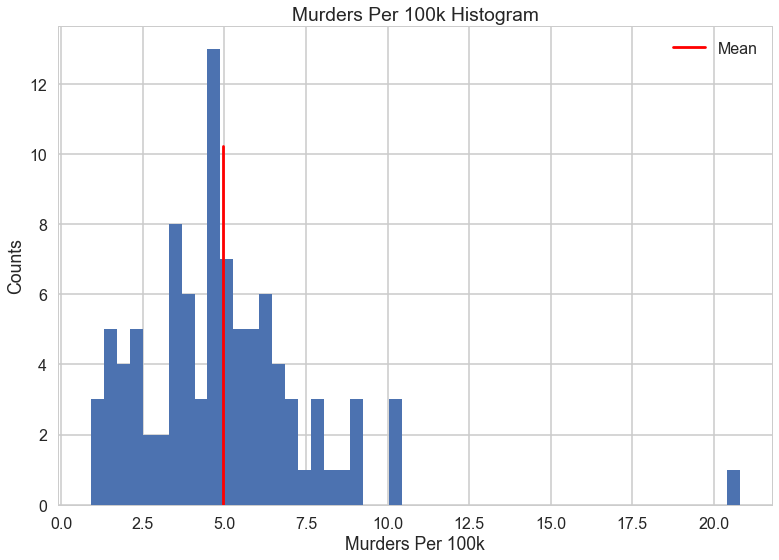

In [9]:
with sns.axes_style("whitegrid"):
    plt.hist(df.murder_per_100_k.values, bins=50)
    plt.axvline(df.murder_per_100_k.mean(), 0, 0.75, color='r', label='Mean')
    plt.xlabel("Murders Per 100k")
    plt.ylabel("Counts")
    plt.title("Murders Per 100k Histogram")
    plt.legend()

In [10]:
def plot_column(x, y, title, i):    
    params = np.polyfit(x, y, 2)
    xp = np.linspace(x.min(), x.max(), 20)
    yp = np.polyval(params, xp)
    plt.figure(i)
    plt.plot(xp, yp, 'k', alpha=0.8, linewidth=1)
    plt.plot(x, y, 'o', markersize=8, alpha=0.5)
    sig = np.std(y - np.polyval(params, x))
    plt.fill_between(xp, yp - sig, yp + sig, color='k', alpha=0.2)
    plt.title(title);

In [11]:
def plot_columns(df):
    y = df.murder_per_100_k
    for i in range(0, len(df.columns)):
        x = df.iloc[:, i]
        title = df.columns[i]
        plot_column(x, y, title, i)

In [12]:
# drop column 145 because it contains blanks
df = df.drop(['poverty_married-couple_family_with_related_children_under_5_years_only'], axis=1)

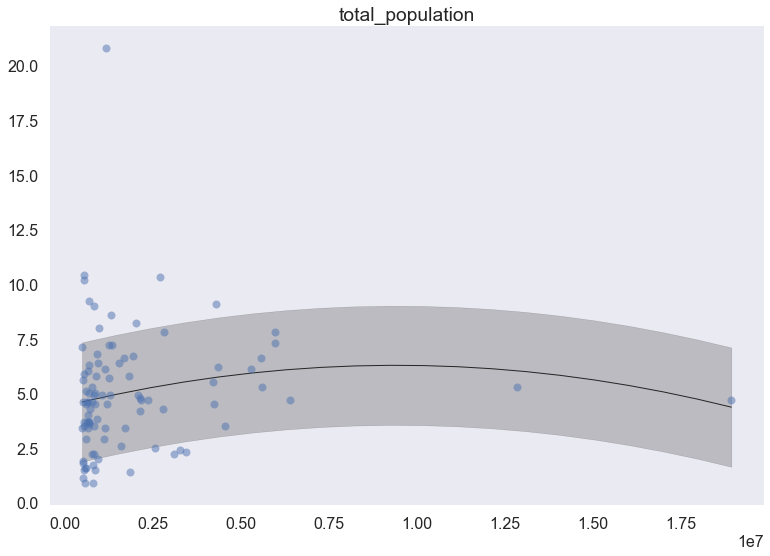

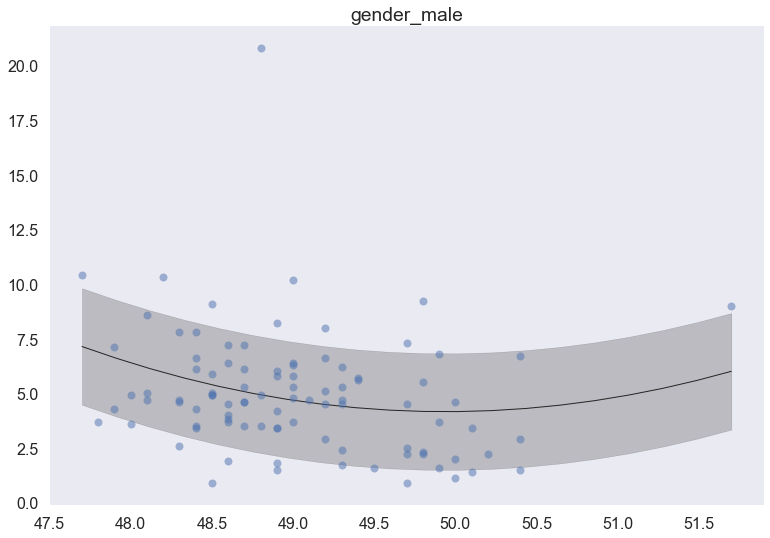

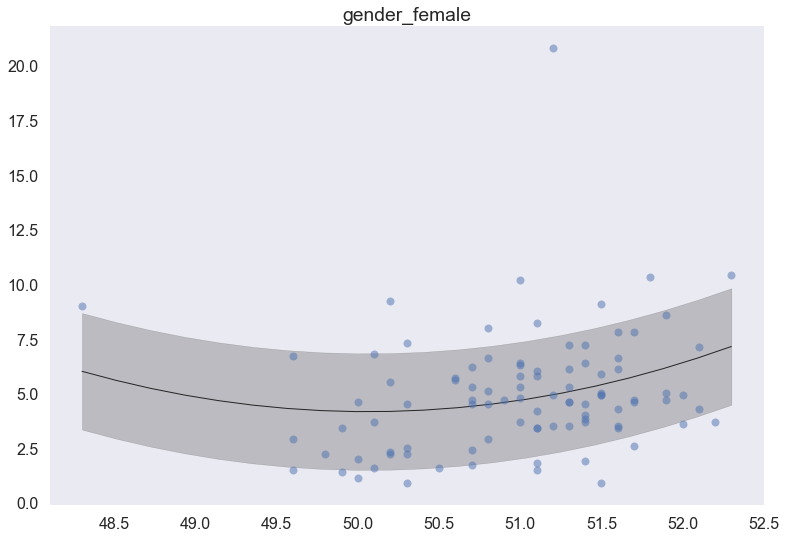

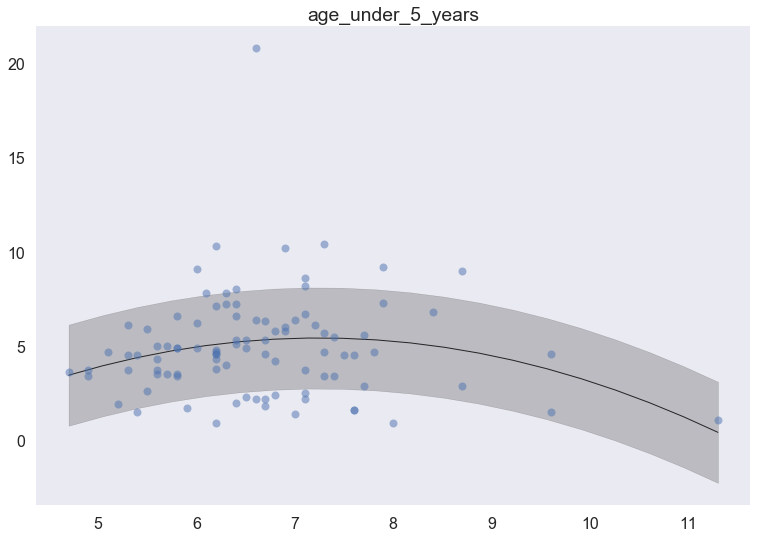

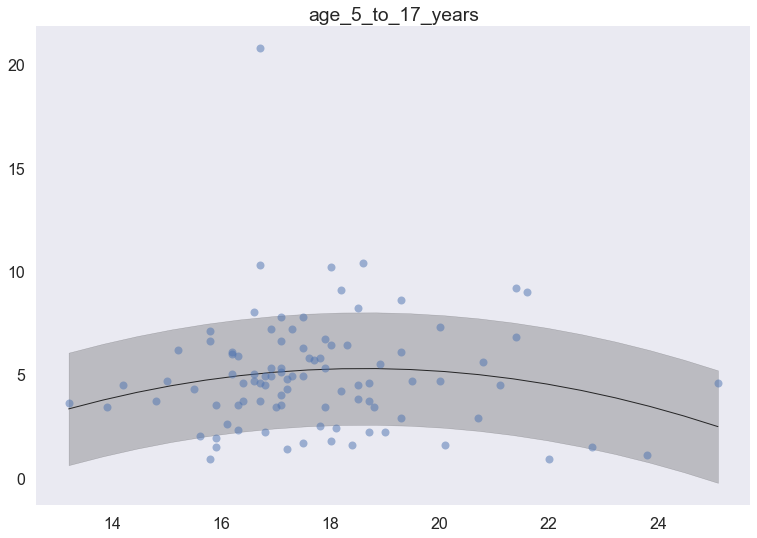

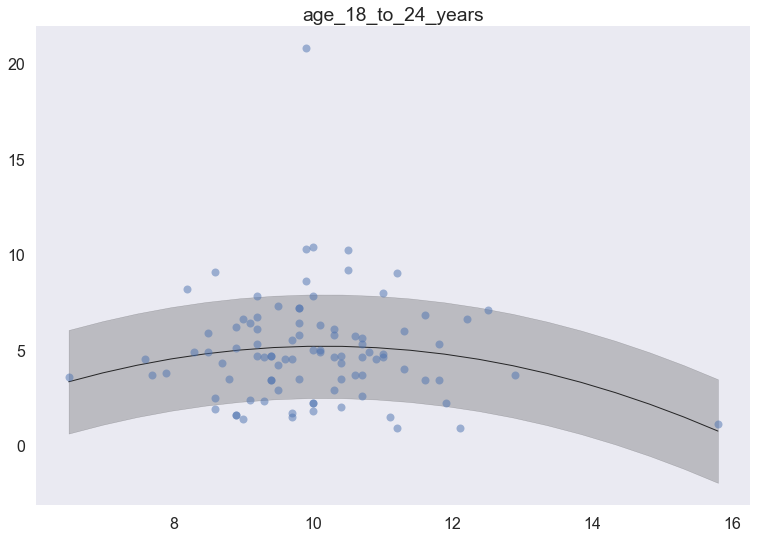

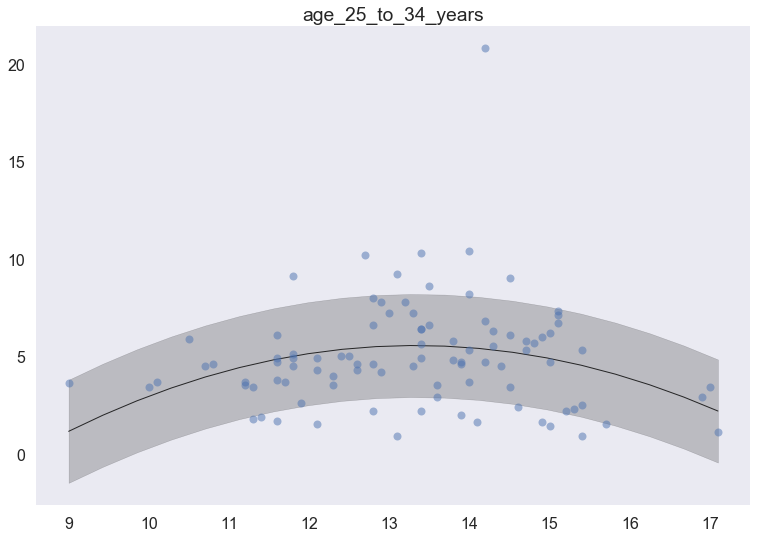

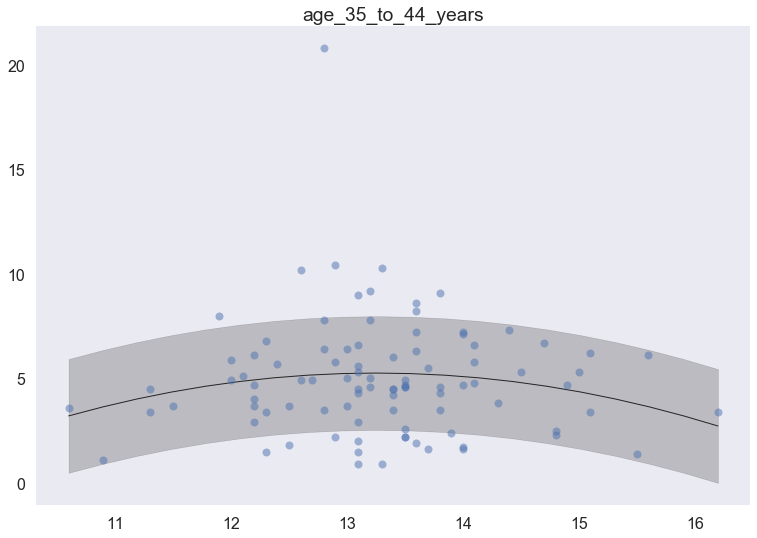

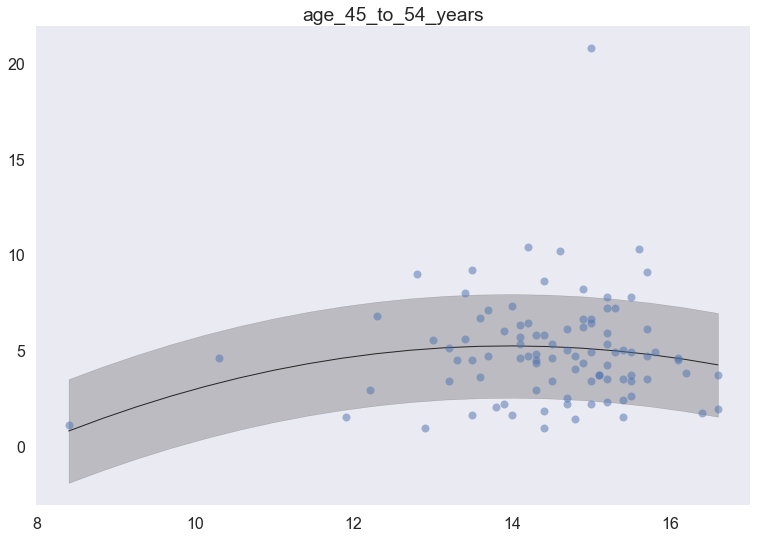

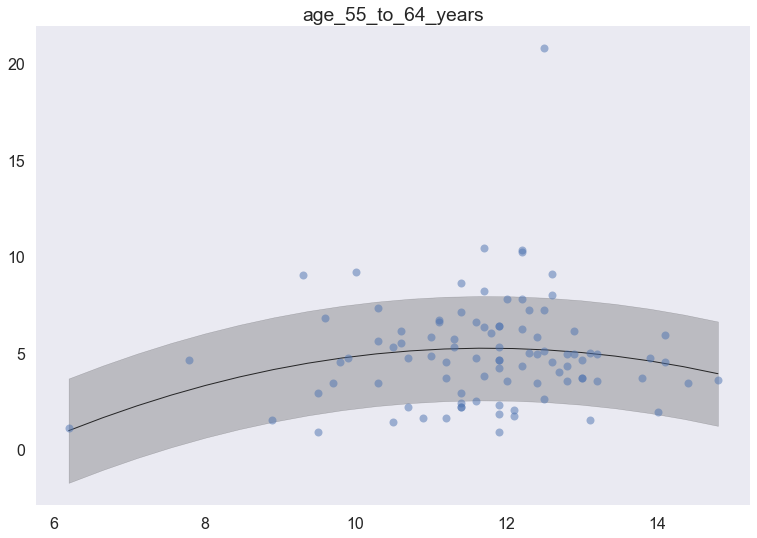

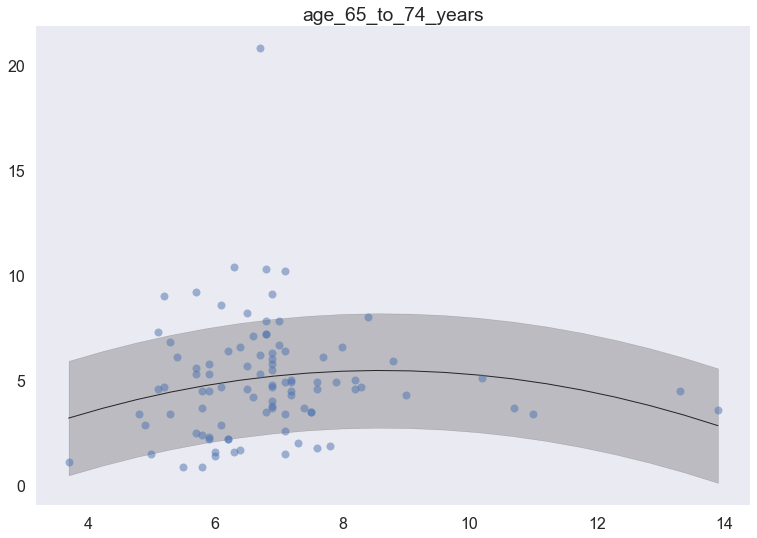

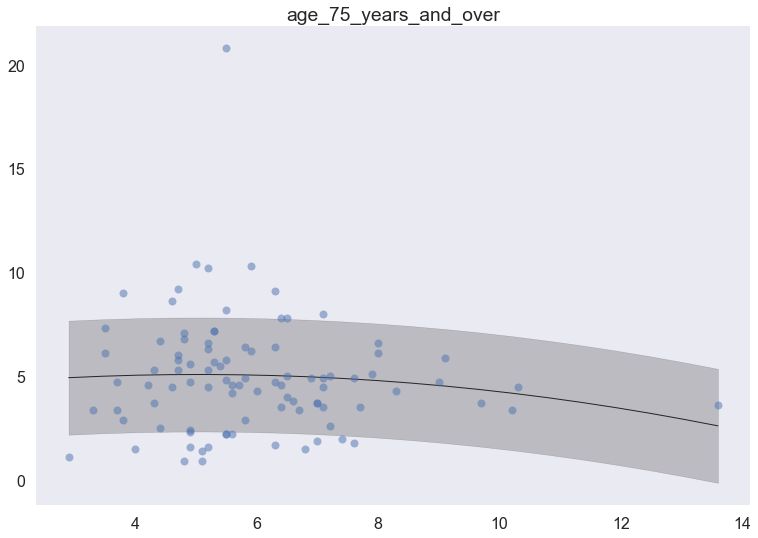

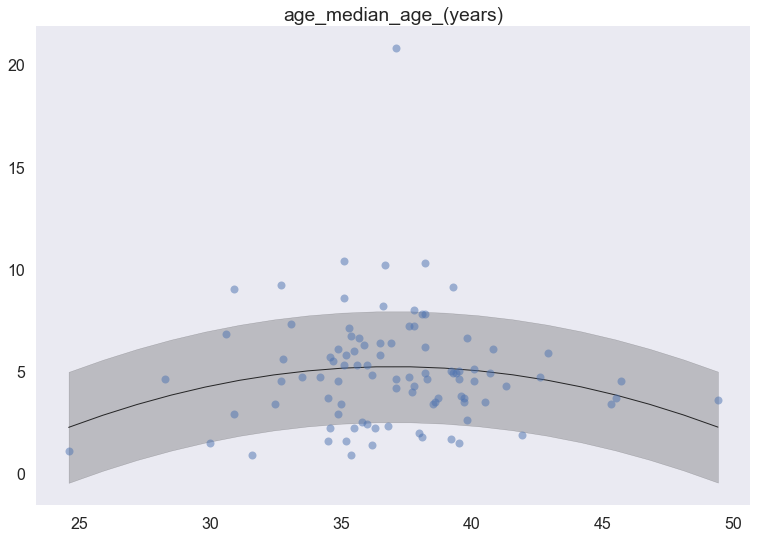

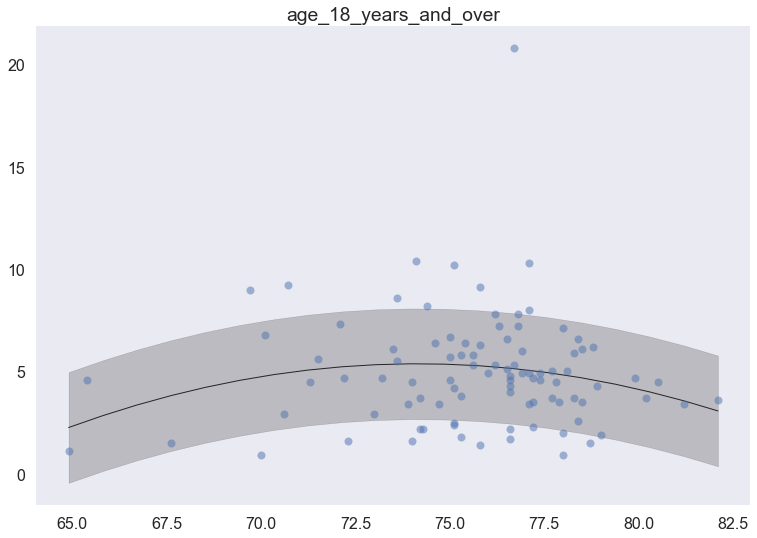

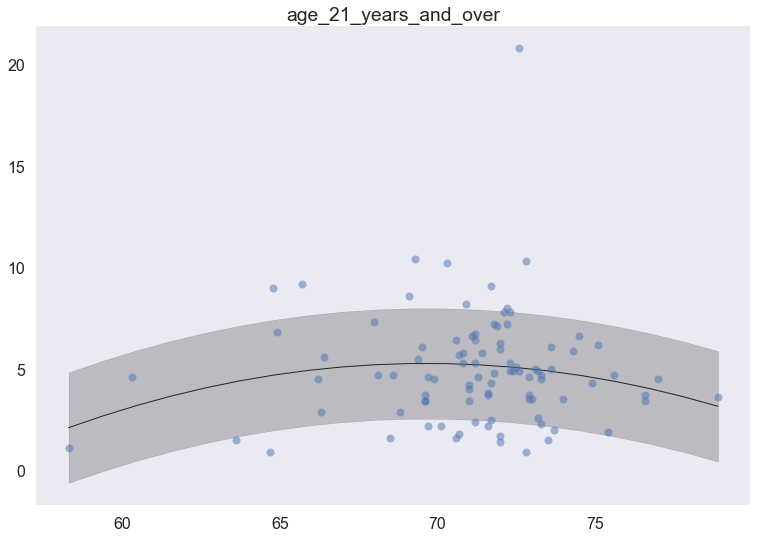

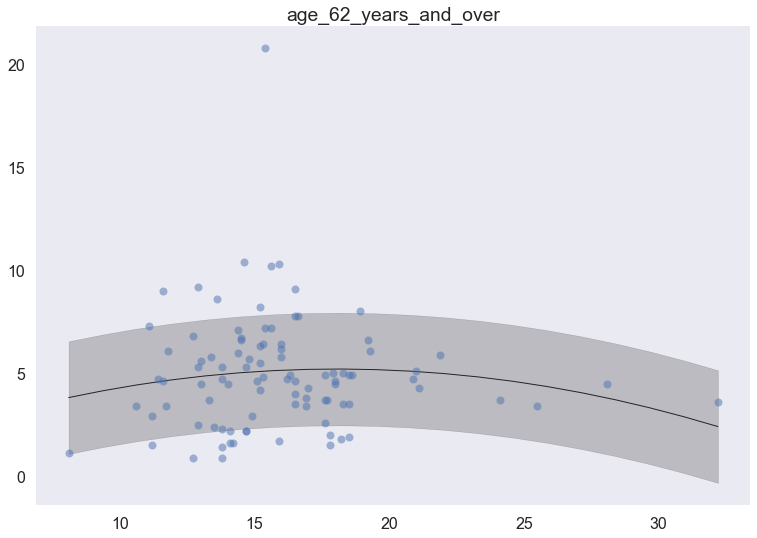

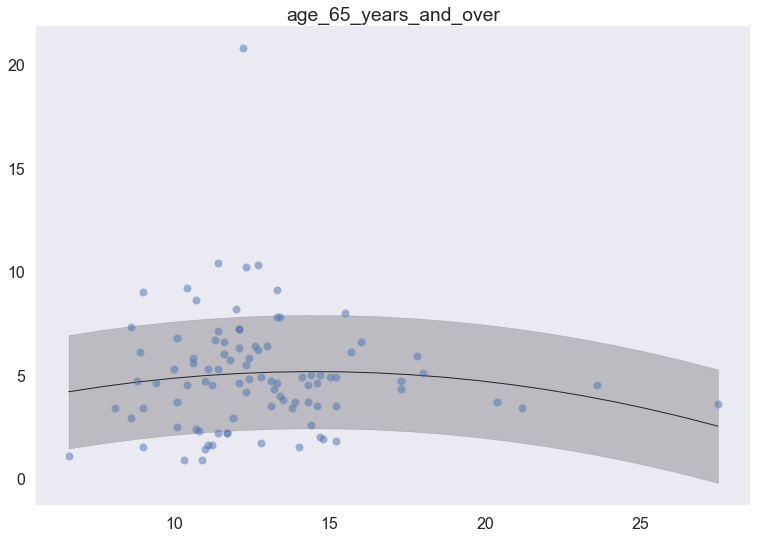

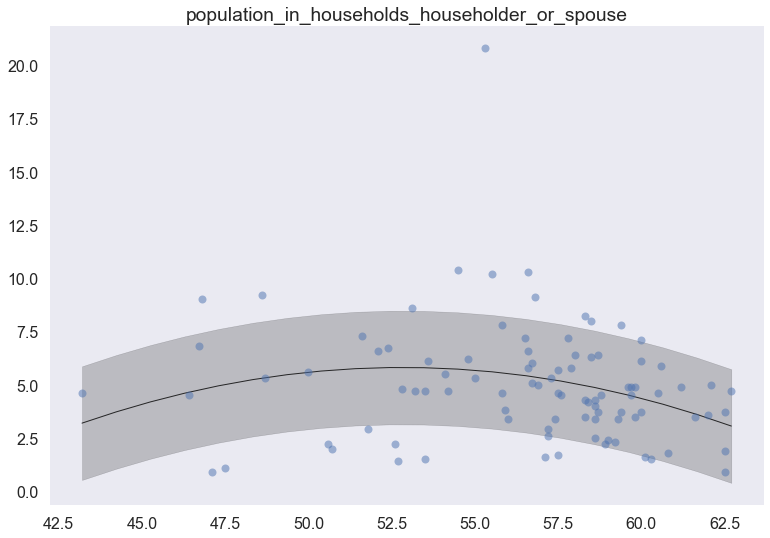

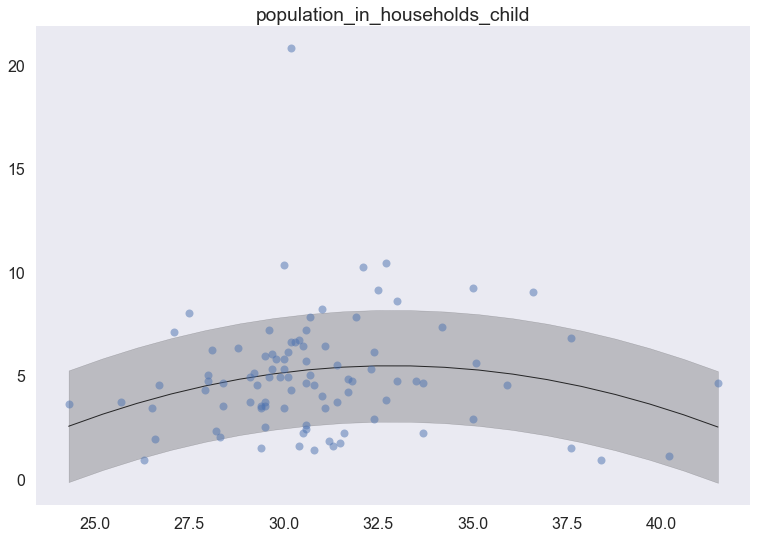

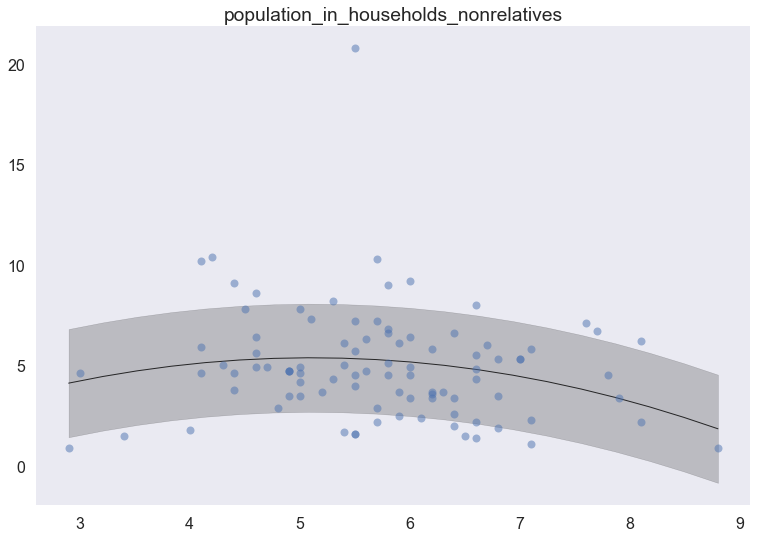

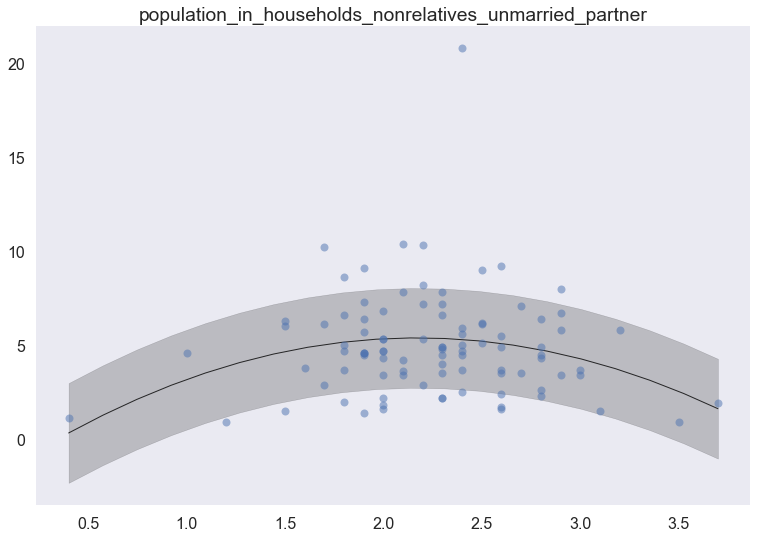

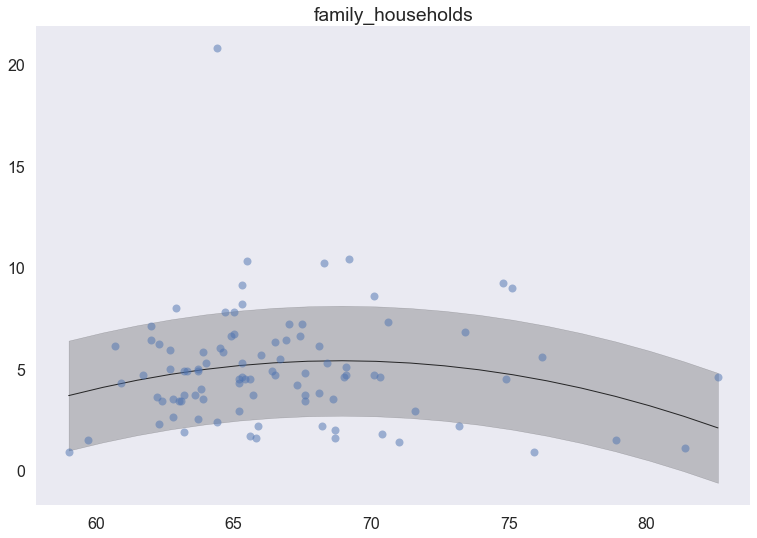

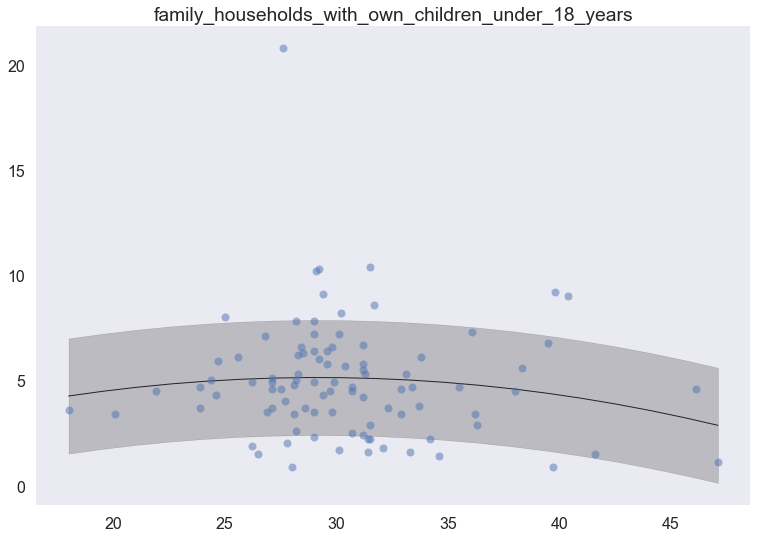

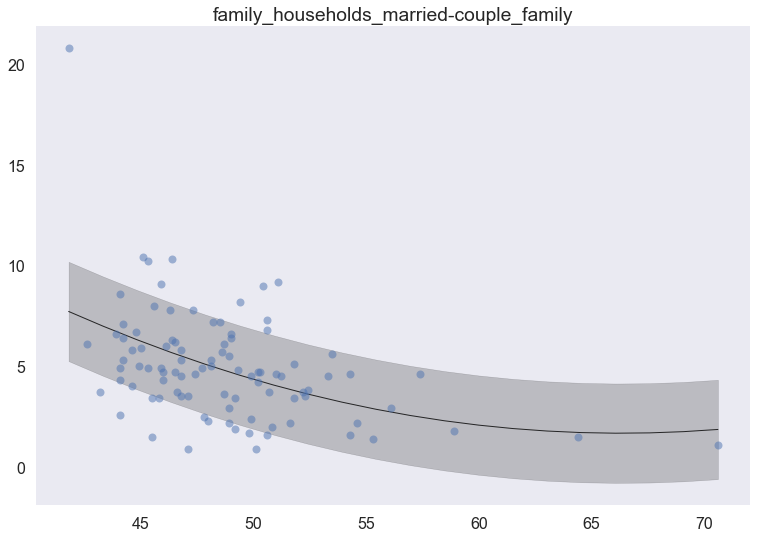

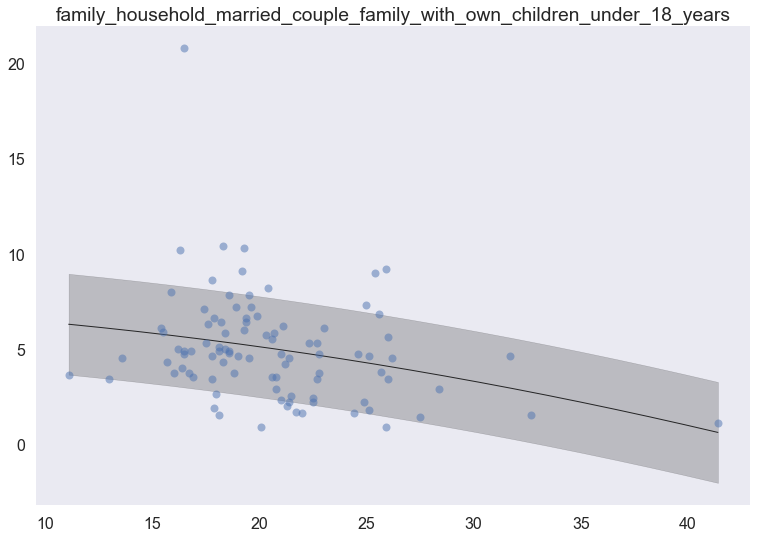

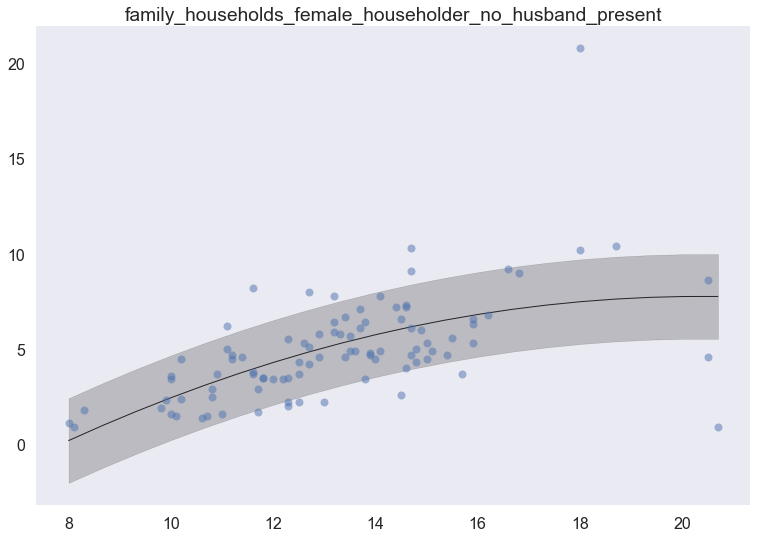

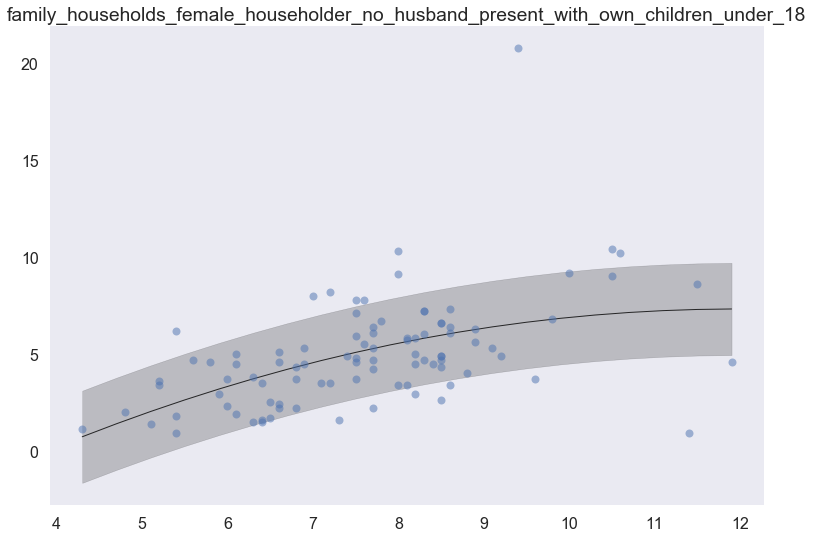

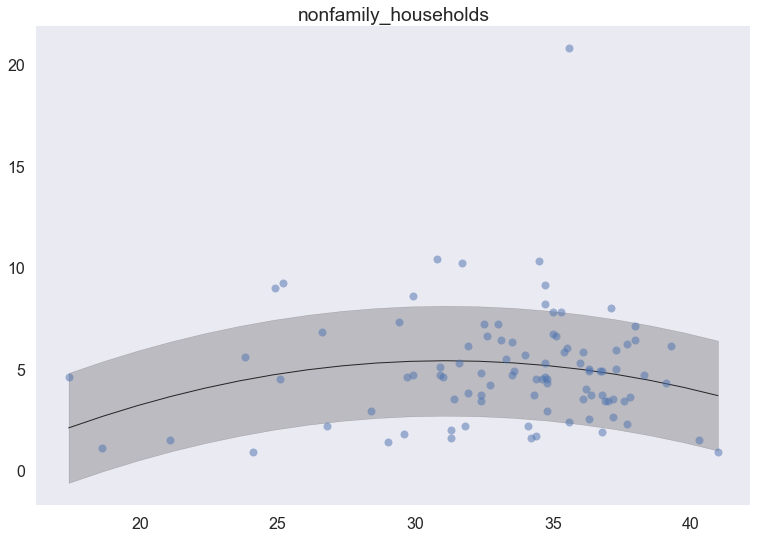

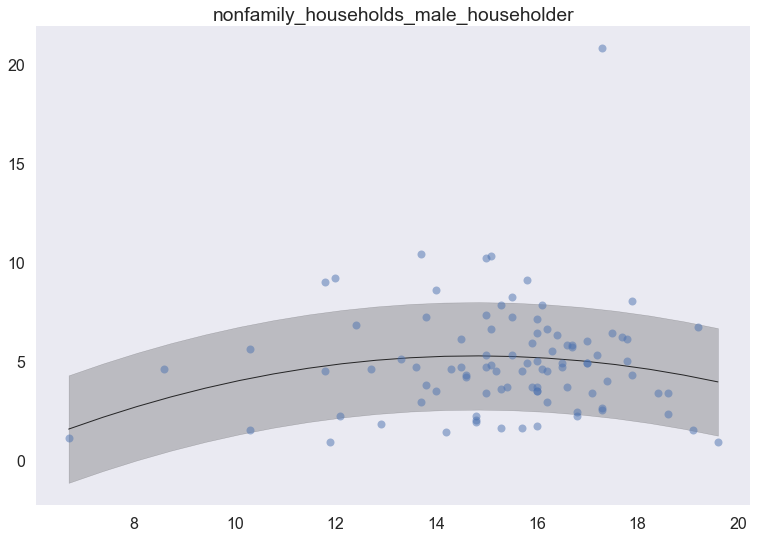

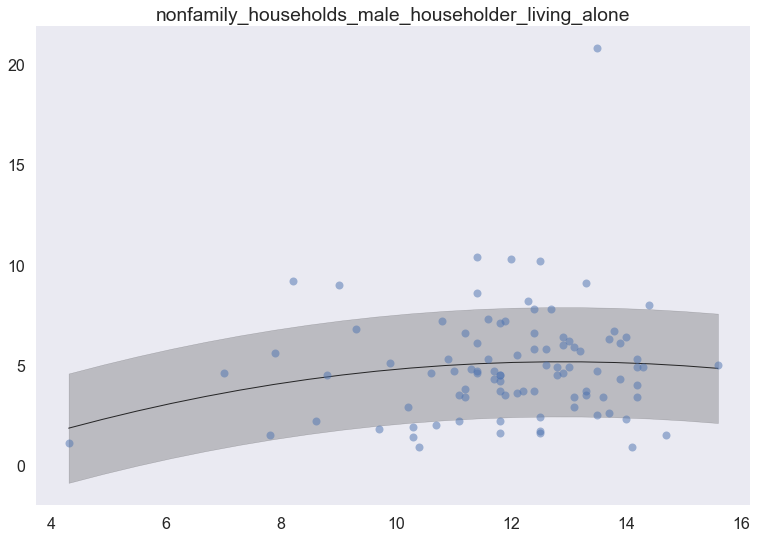

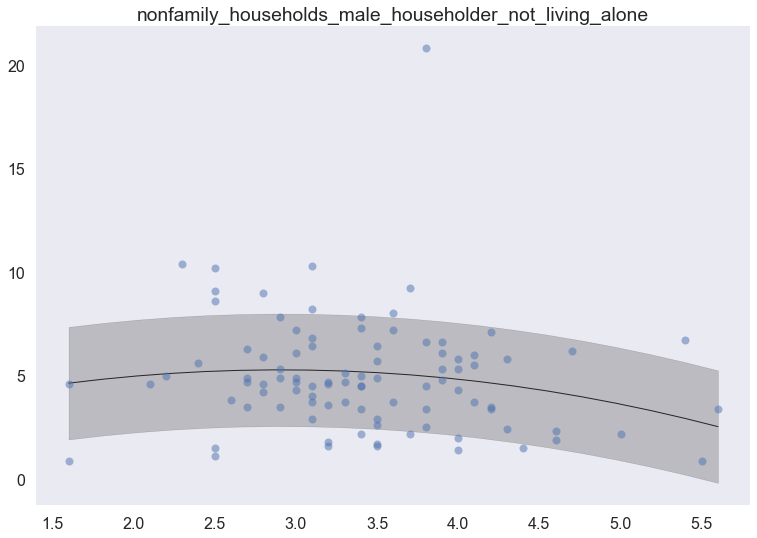

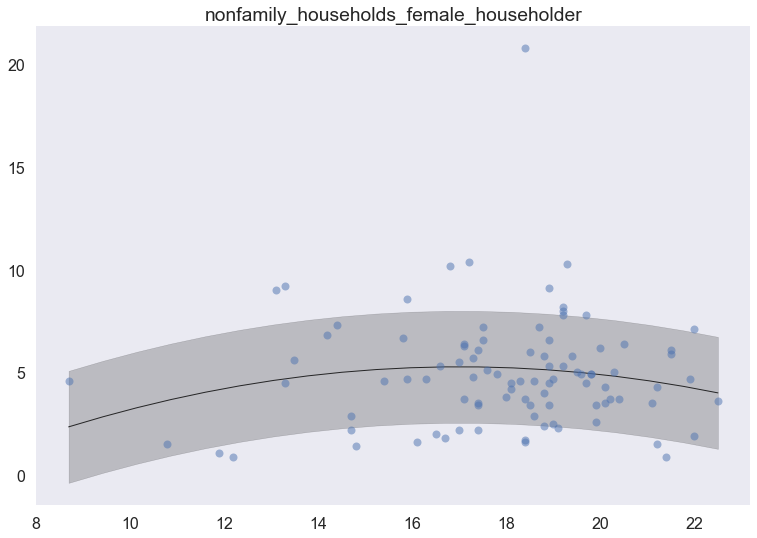

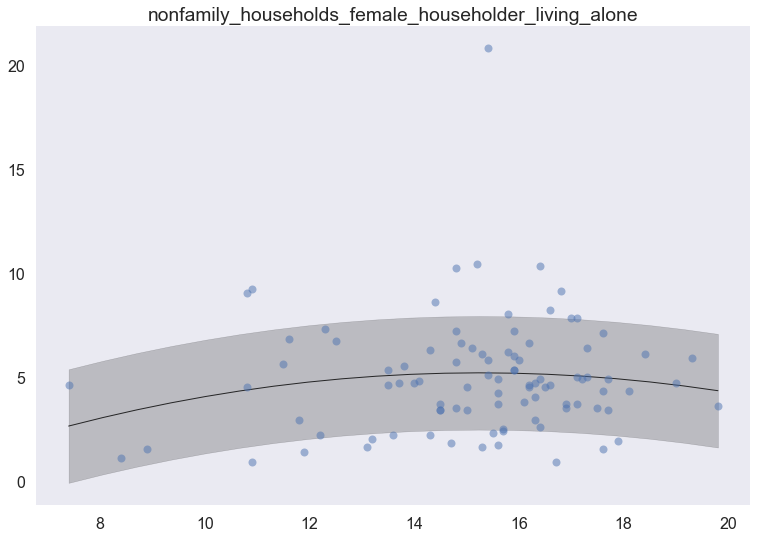

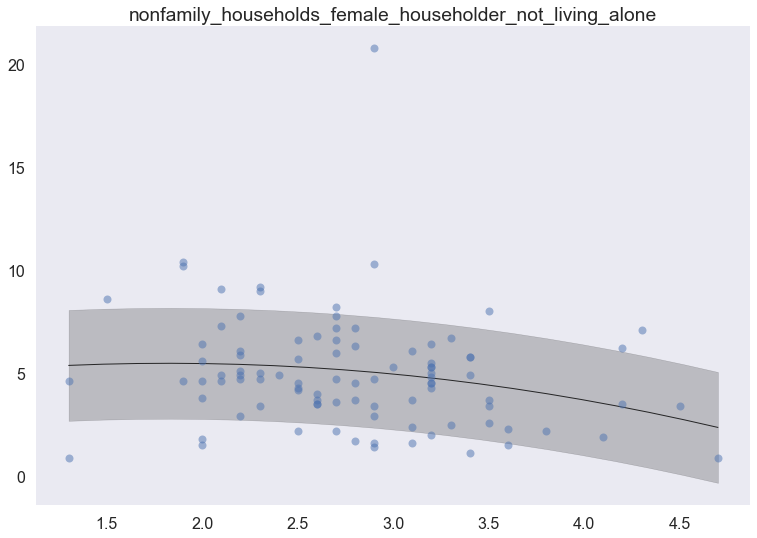

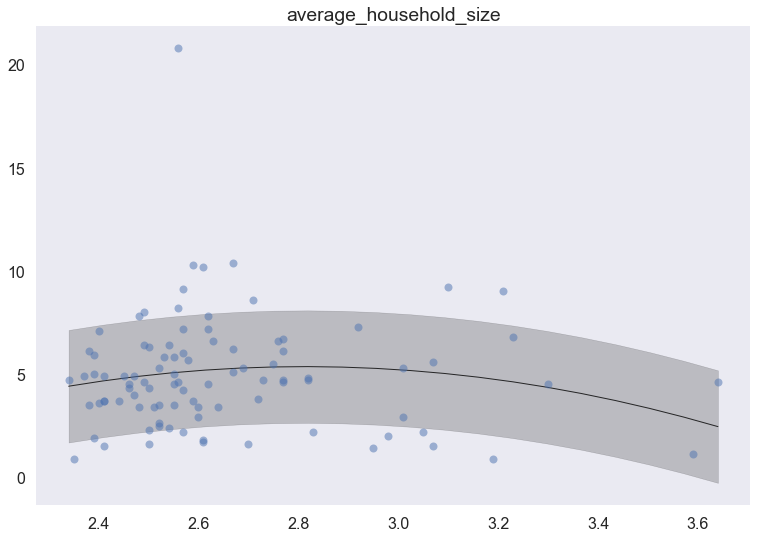

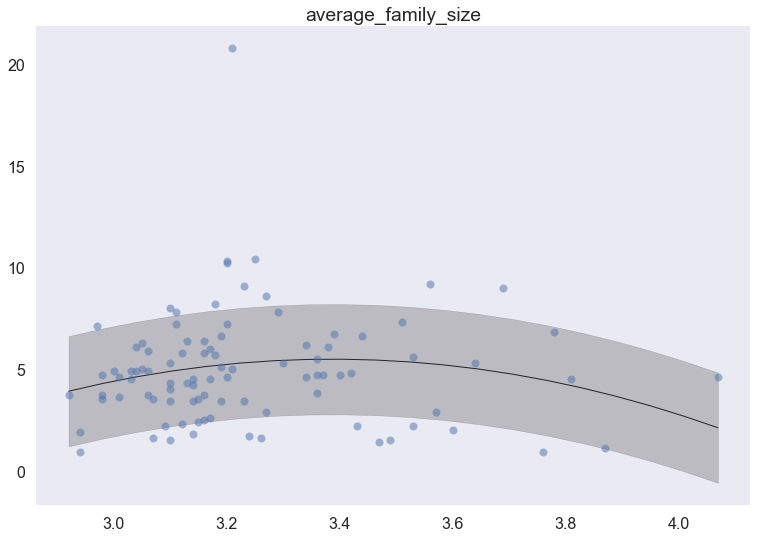

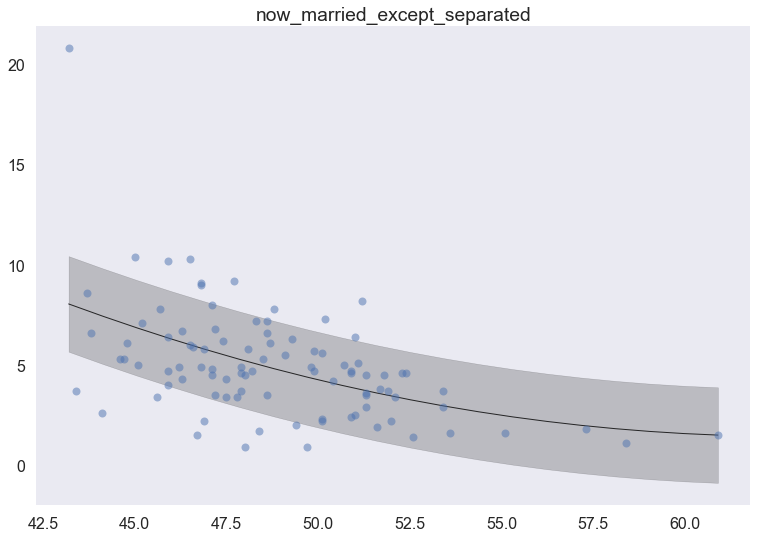

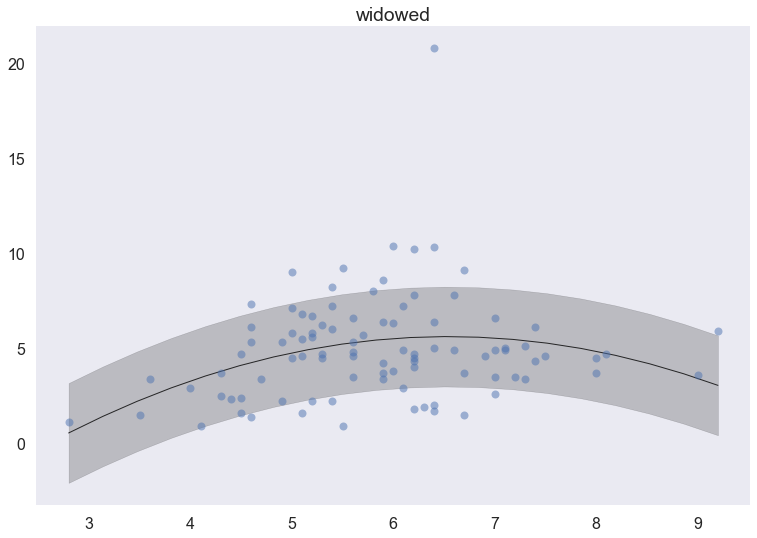

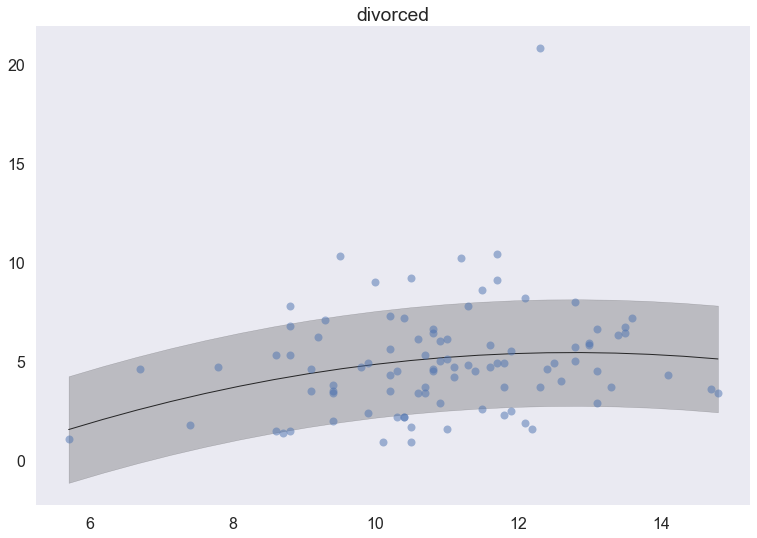

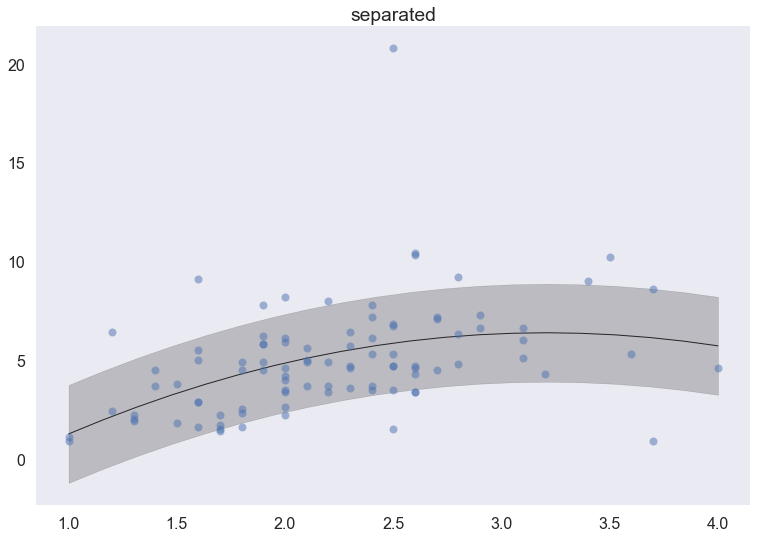

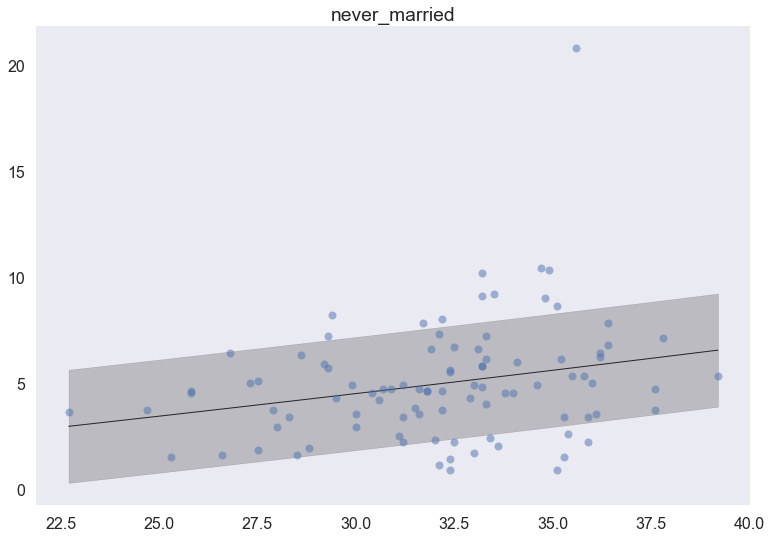

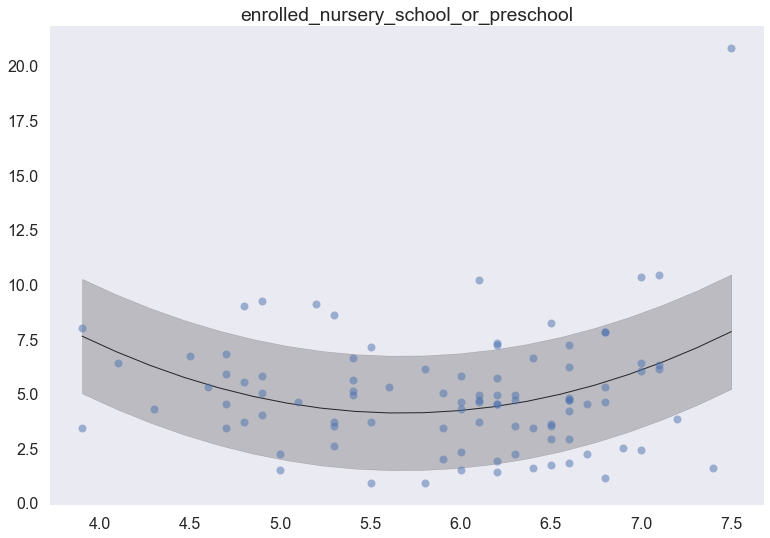

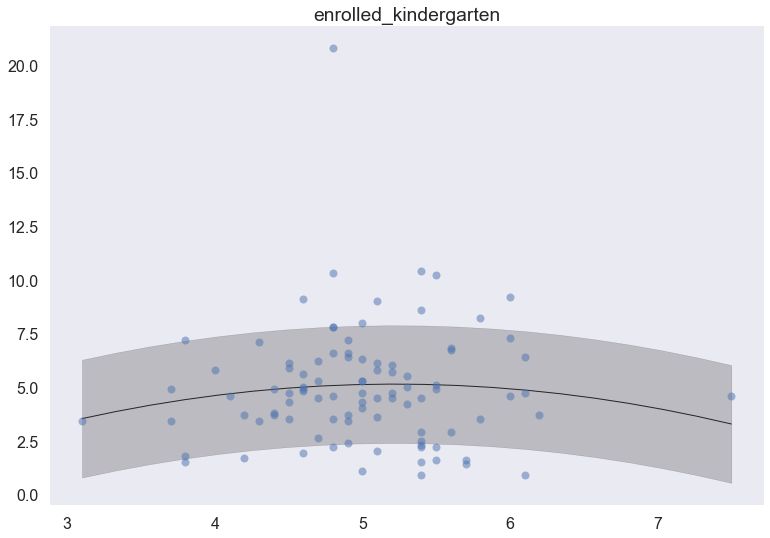

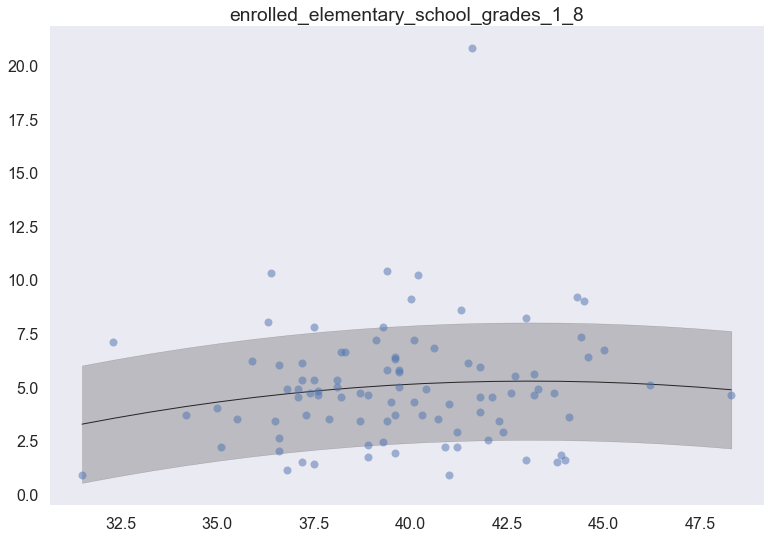

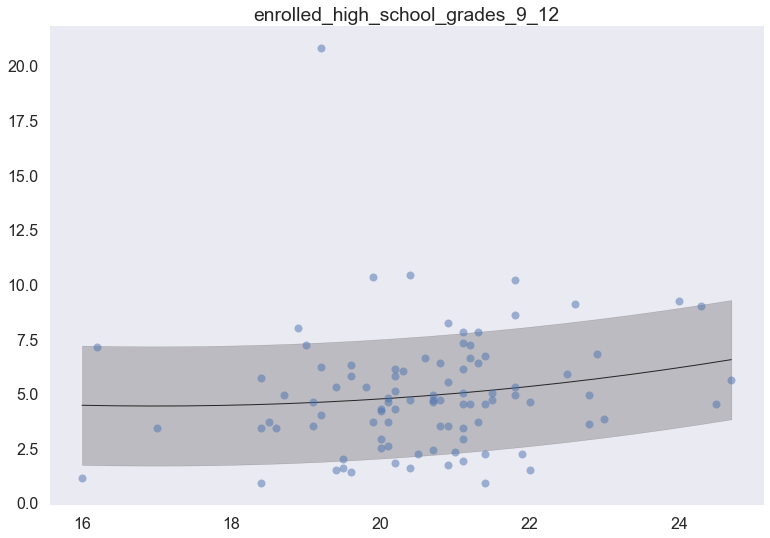

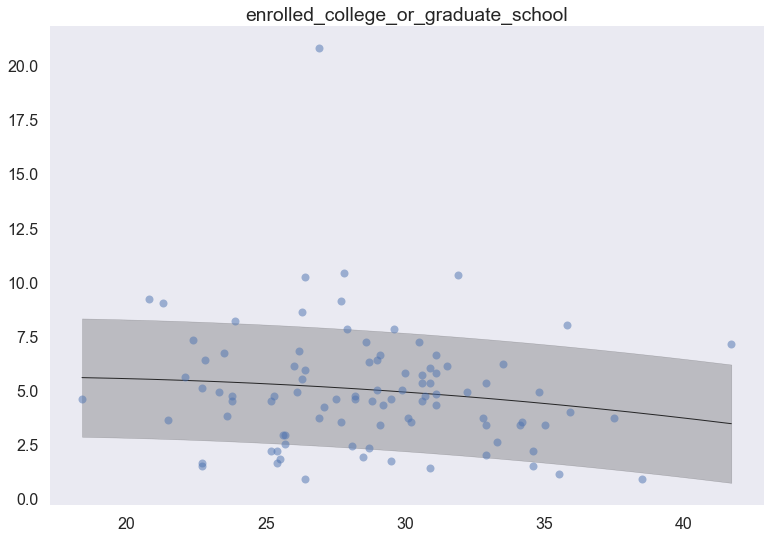

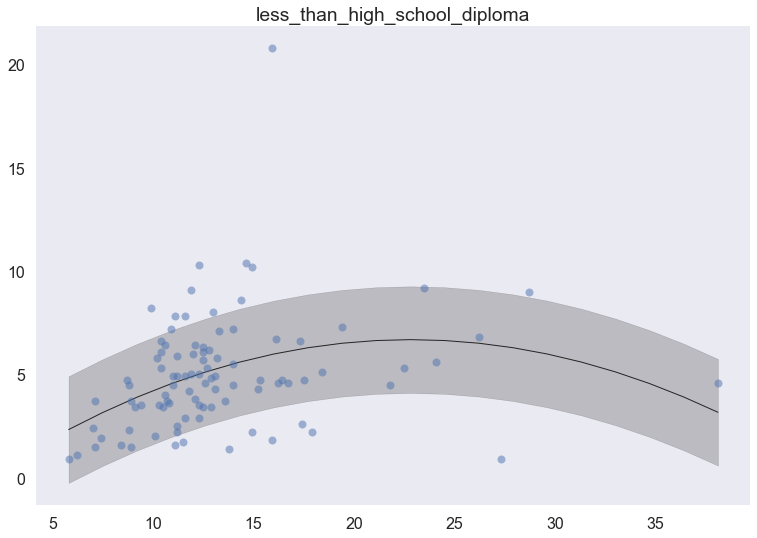

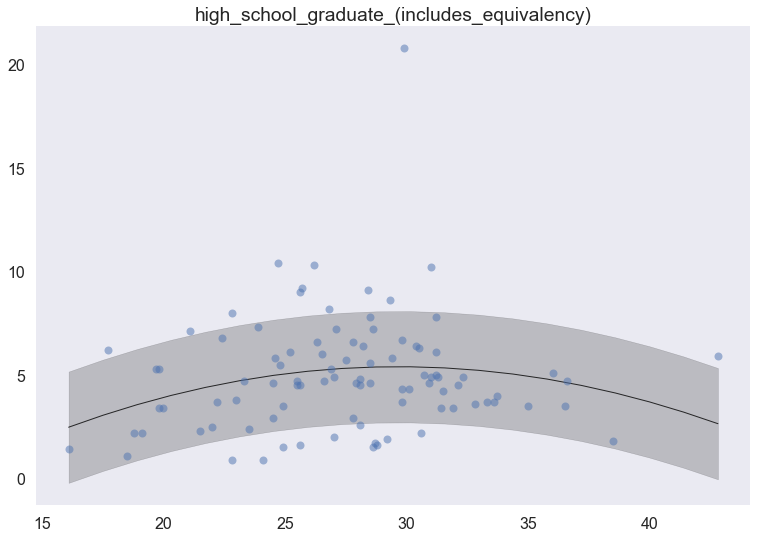

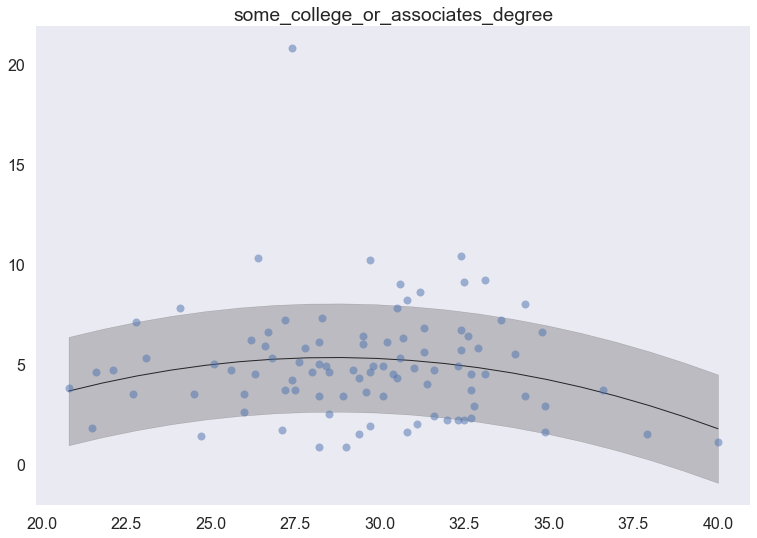

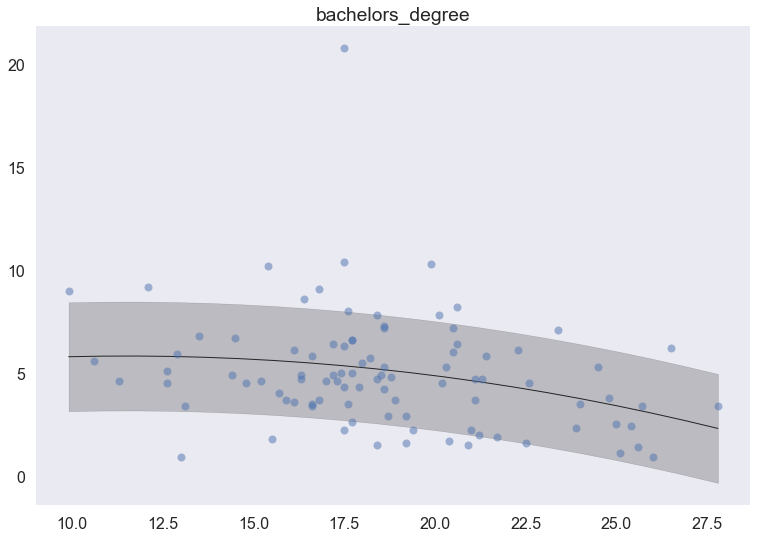

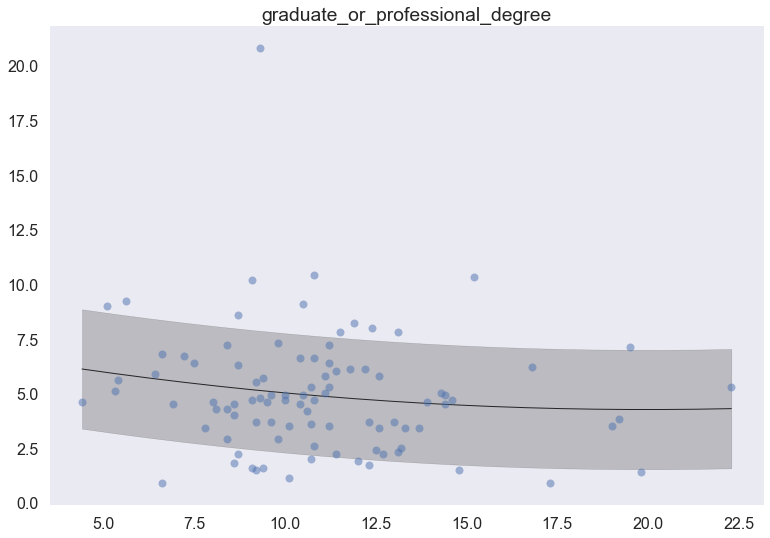

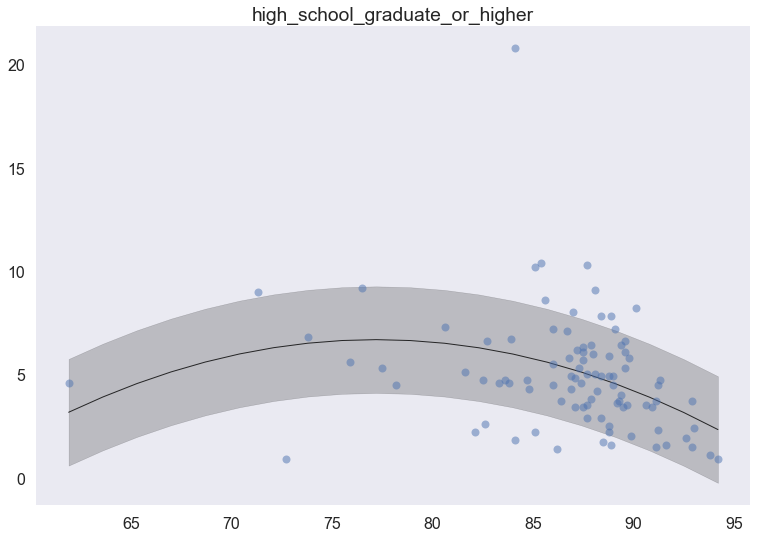

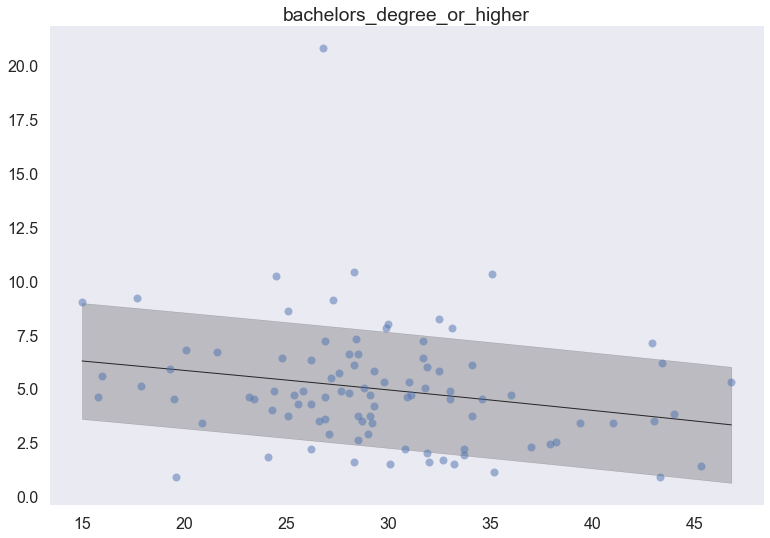

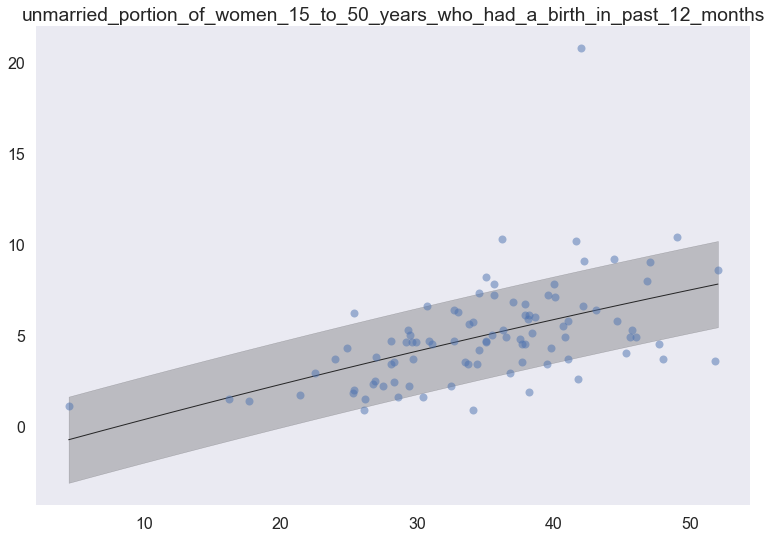

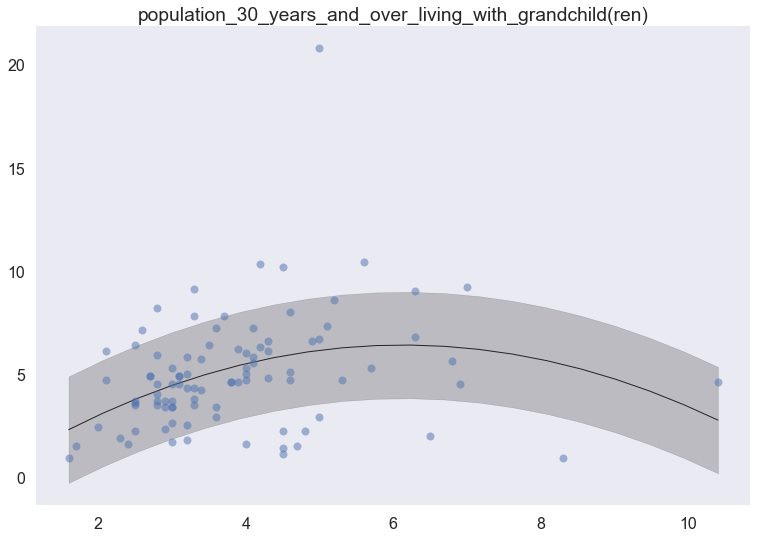

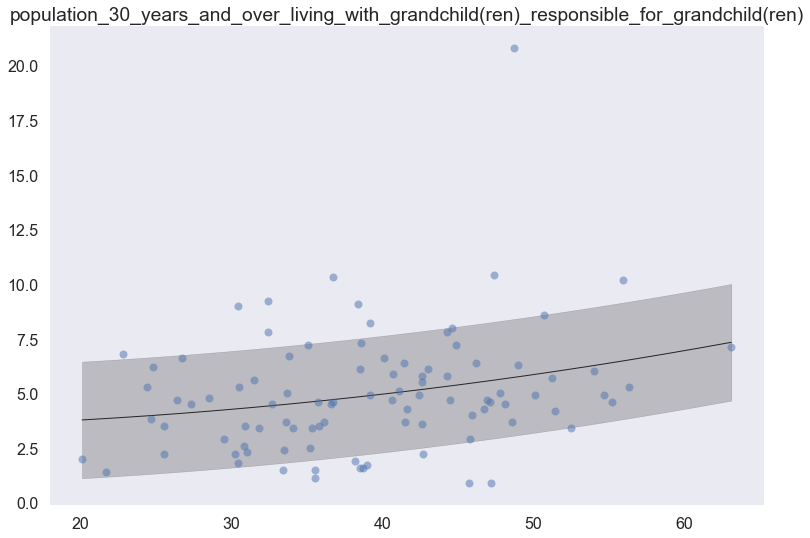

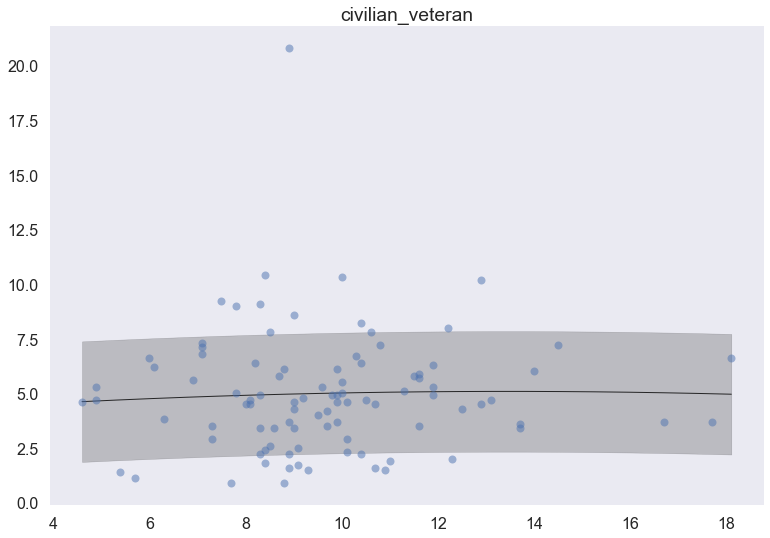

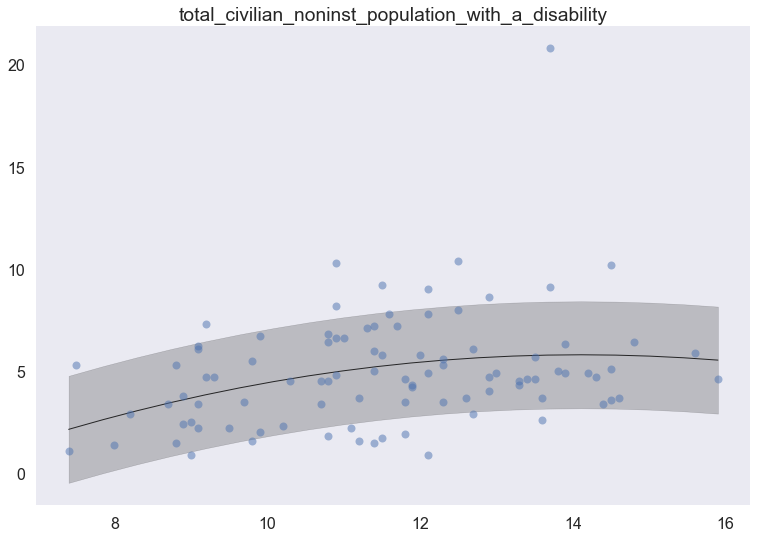

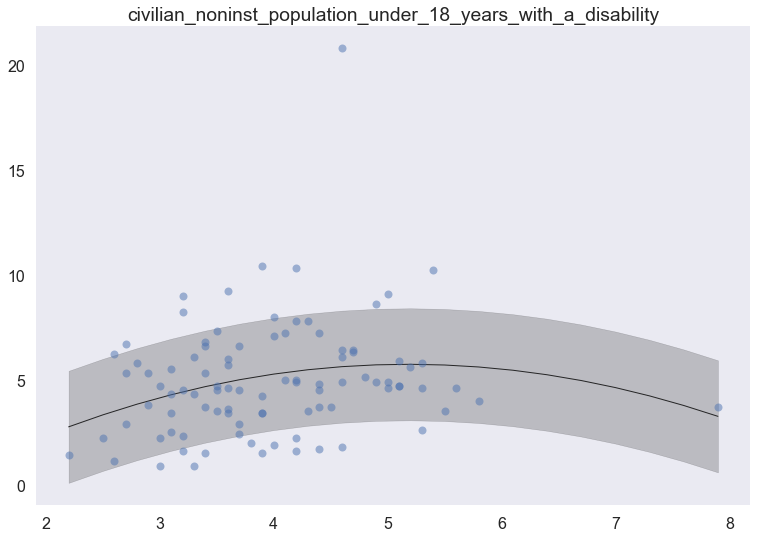

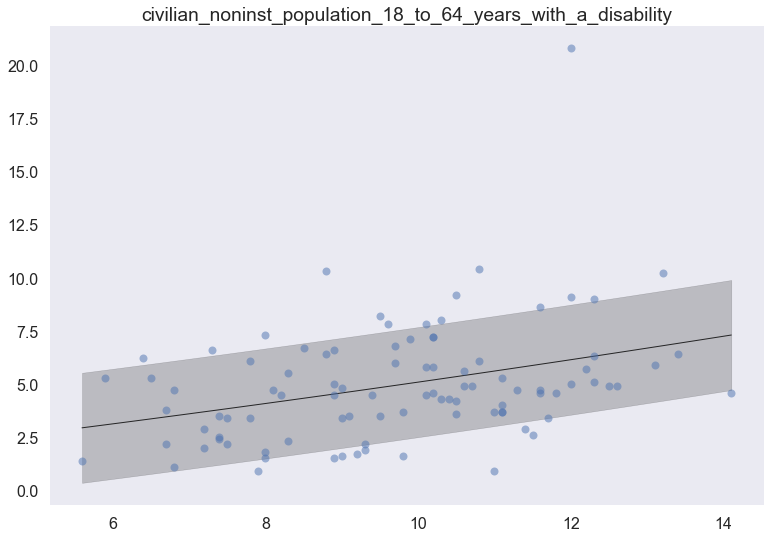

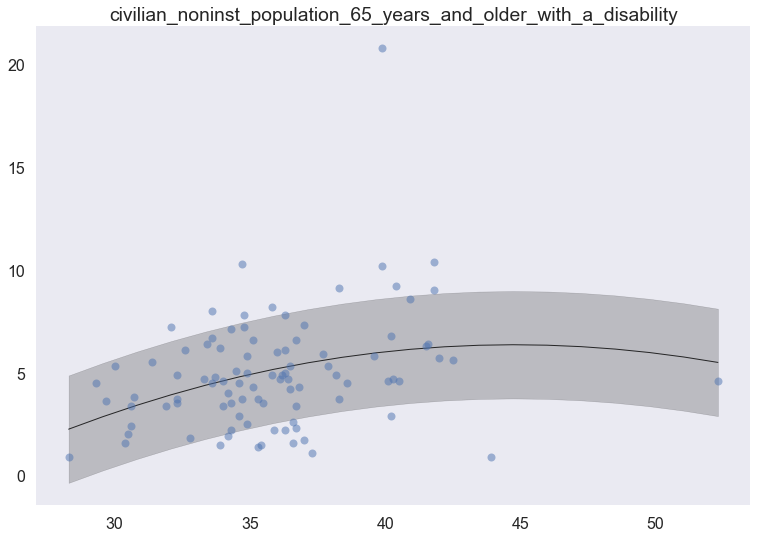

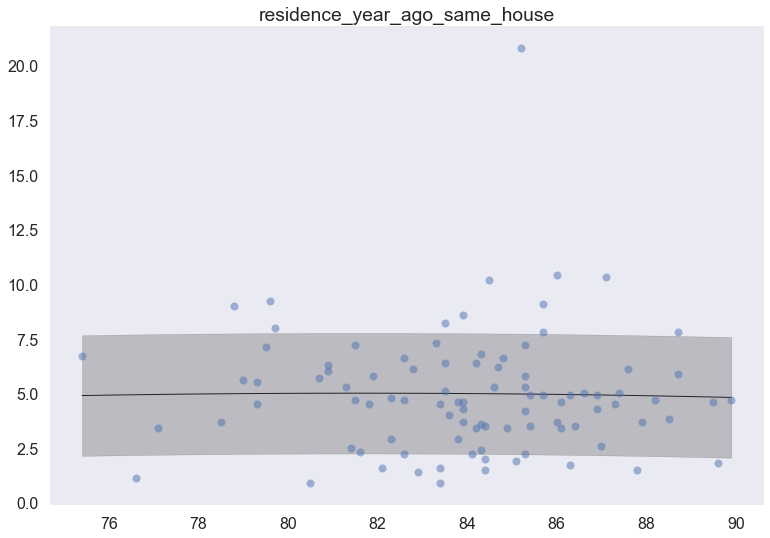

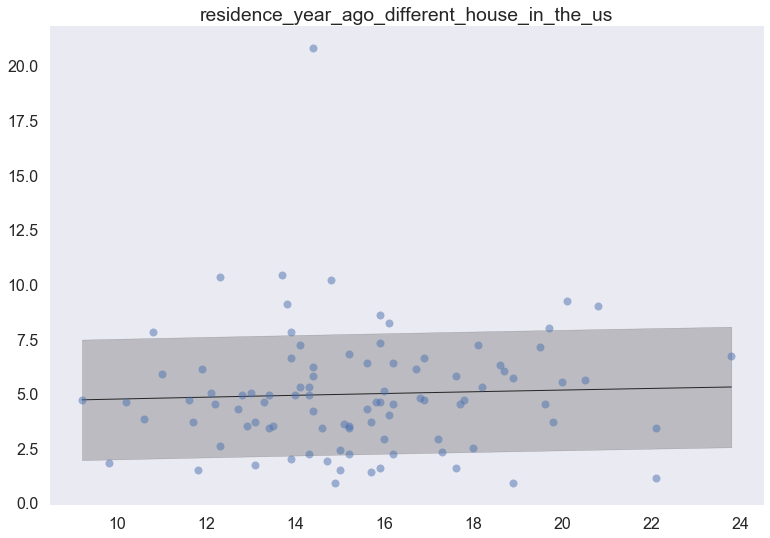

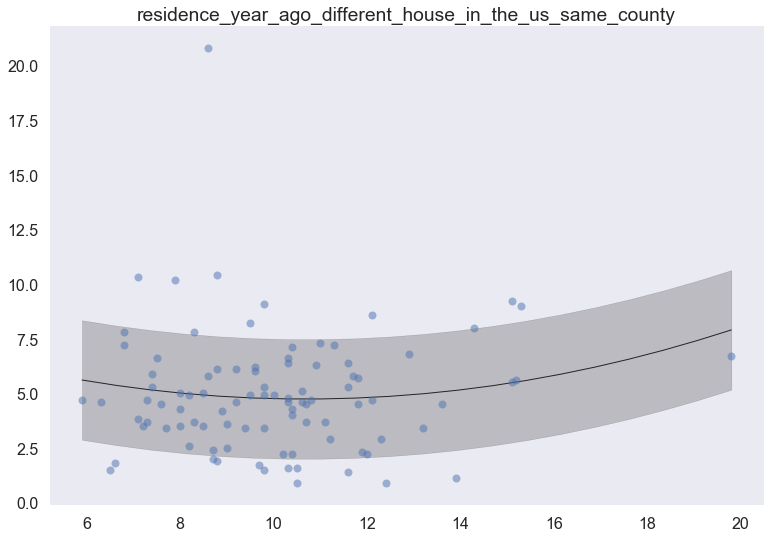

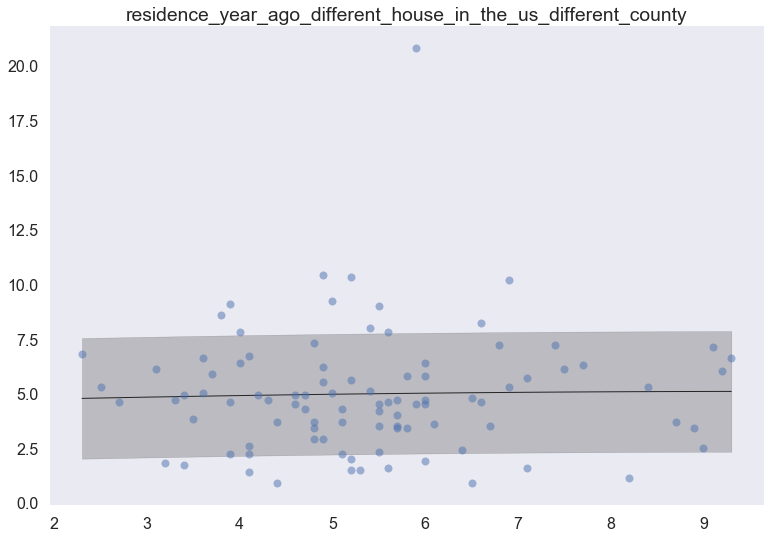

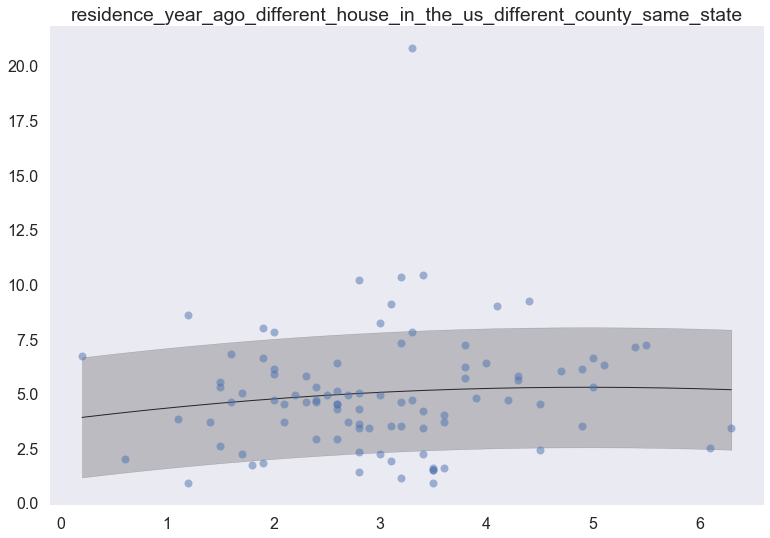

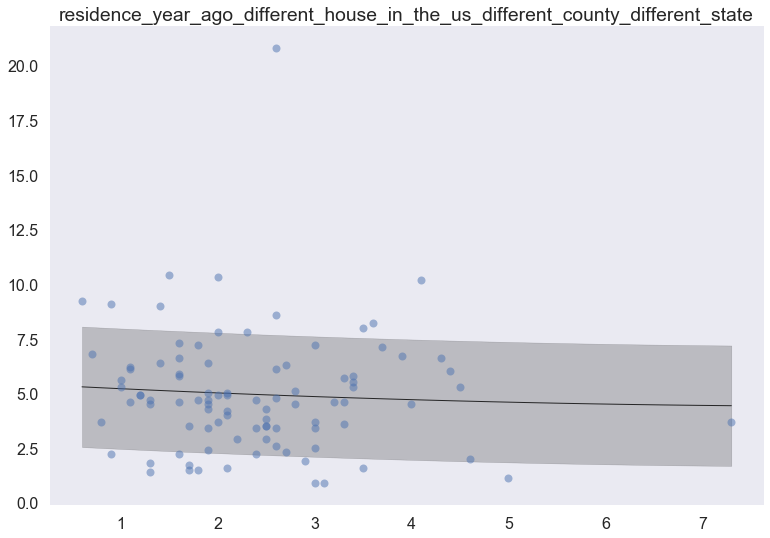

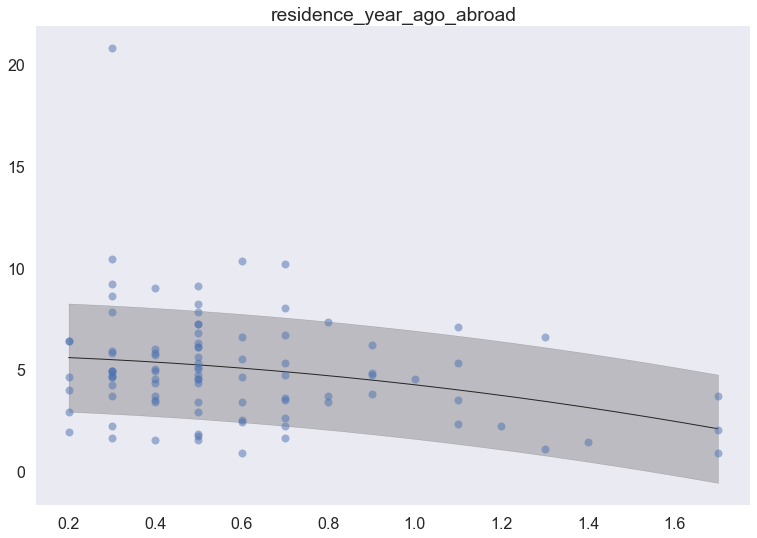

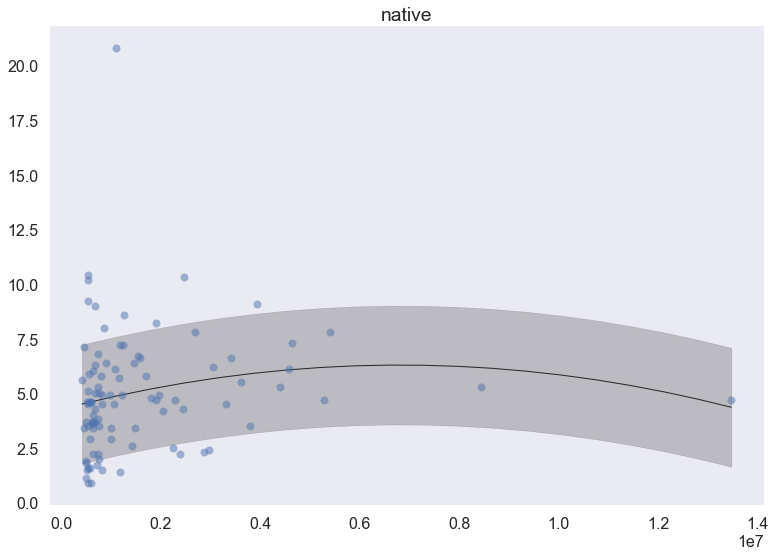

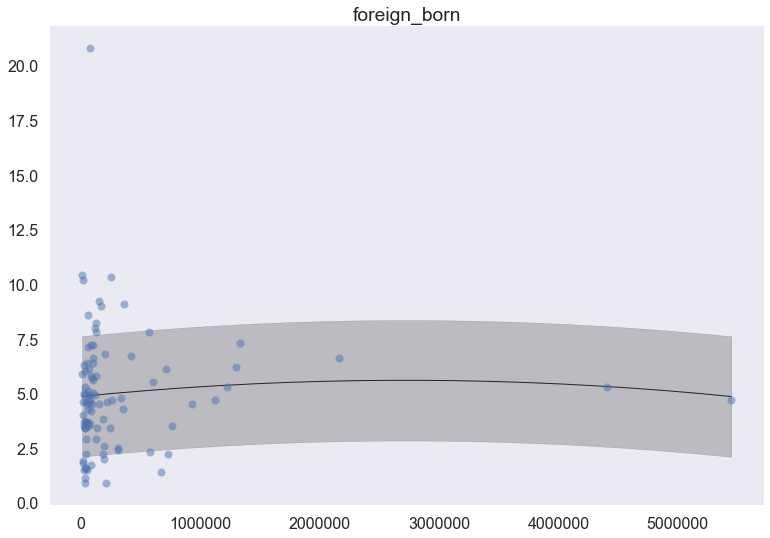

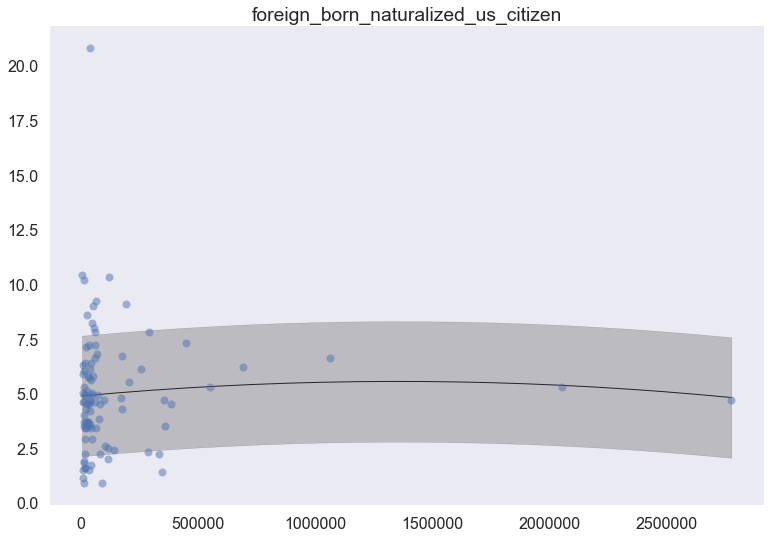

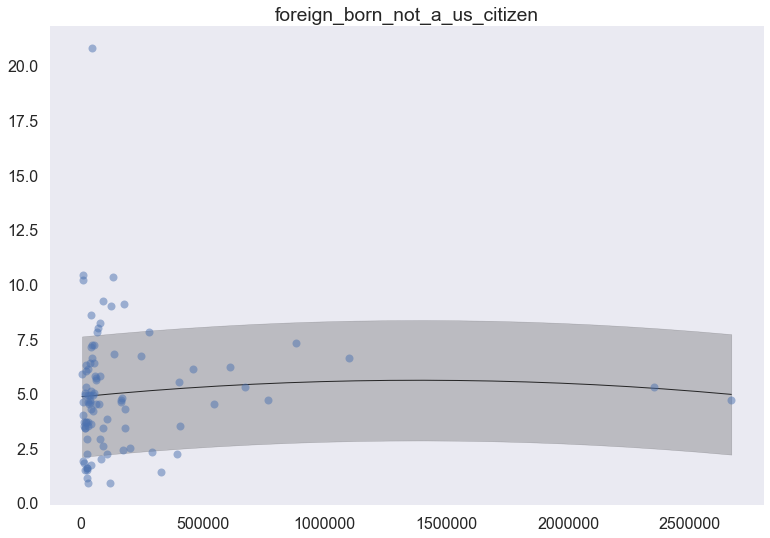

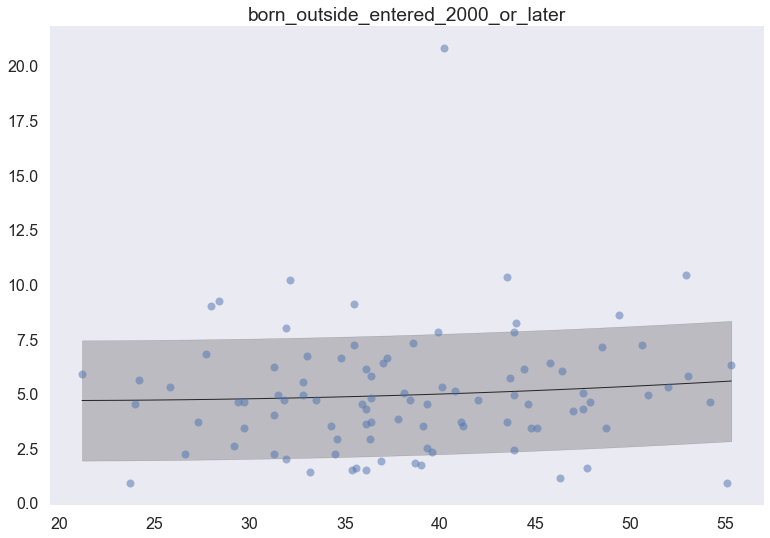

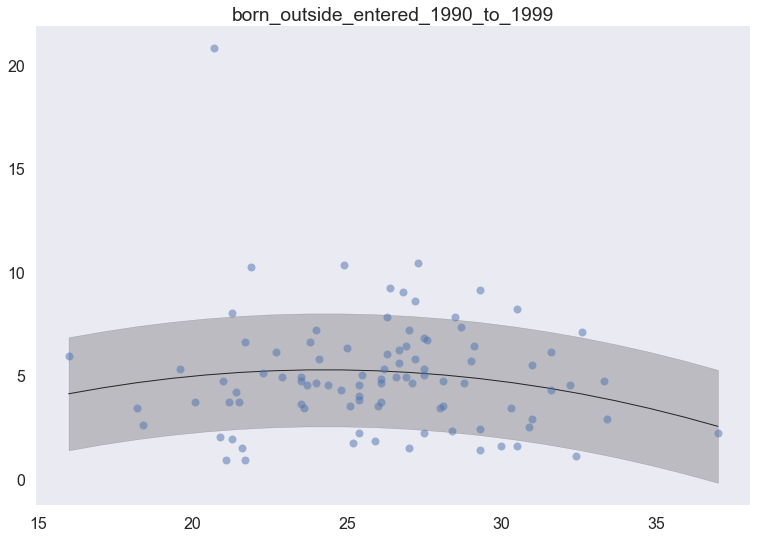

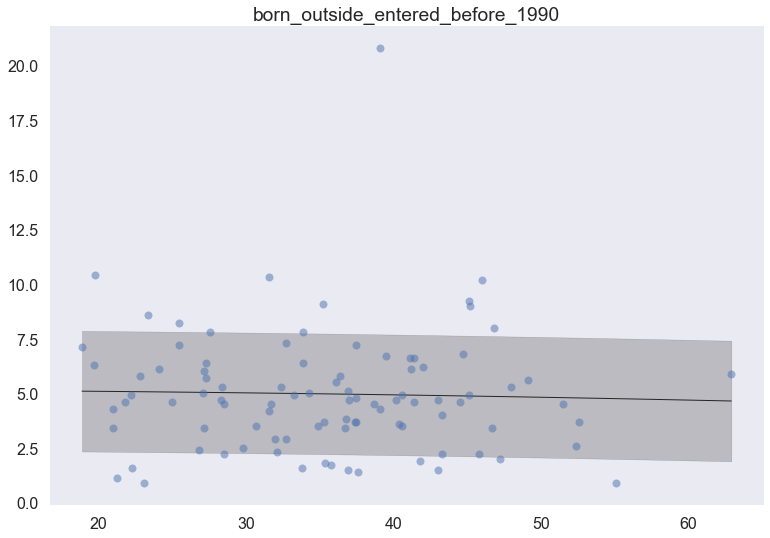

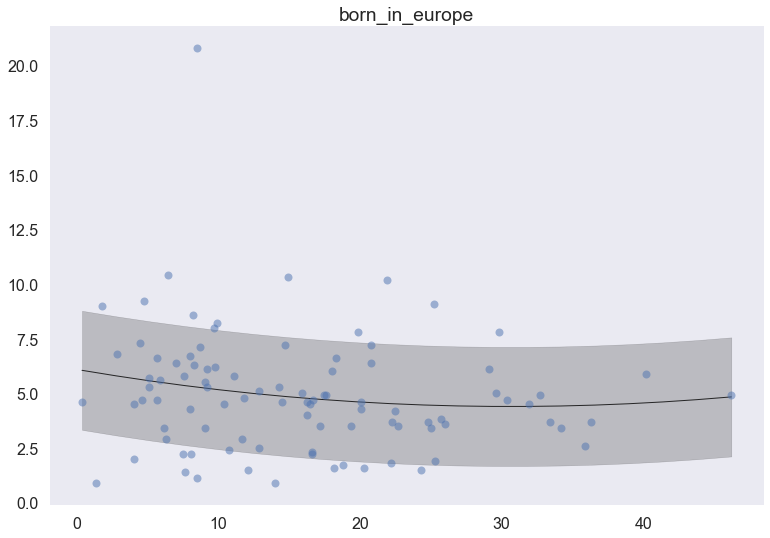

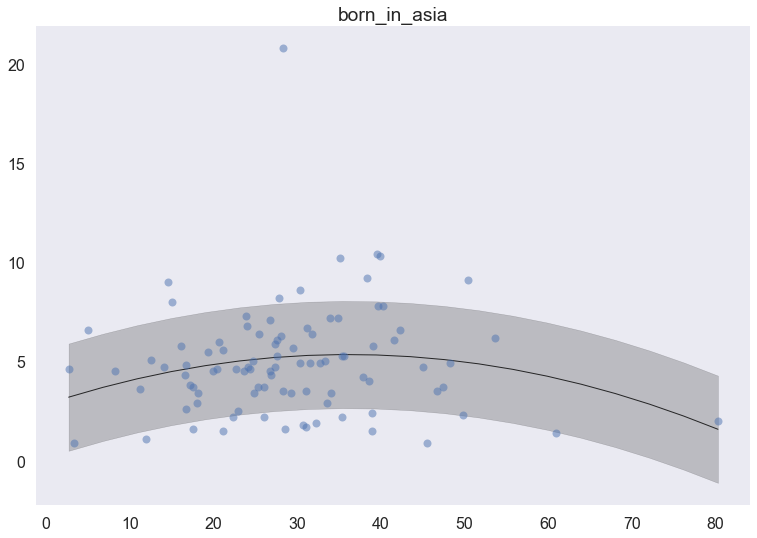

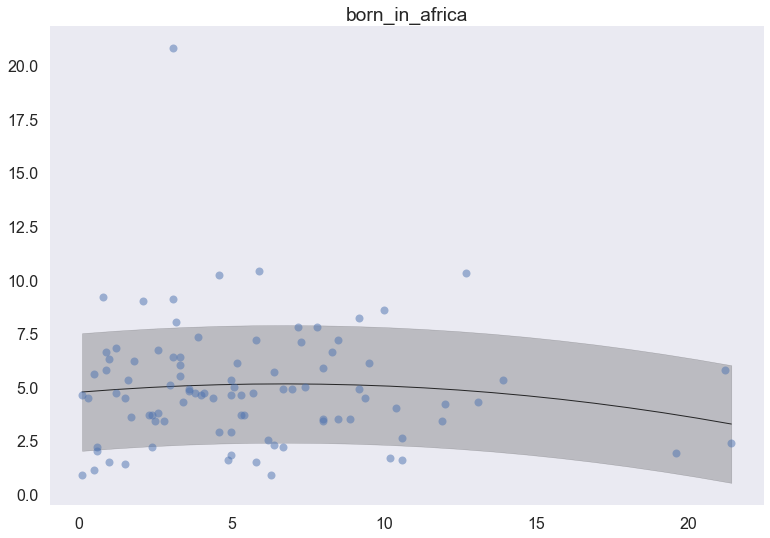

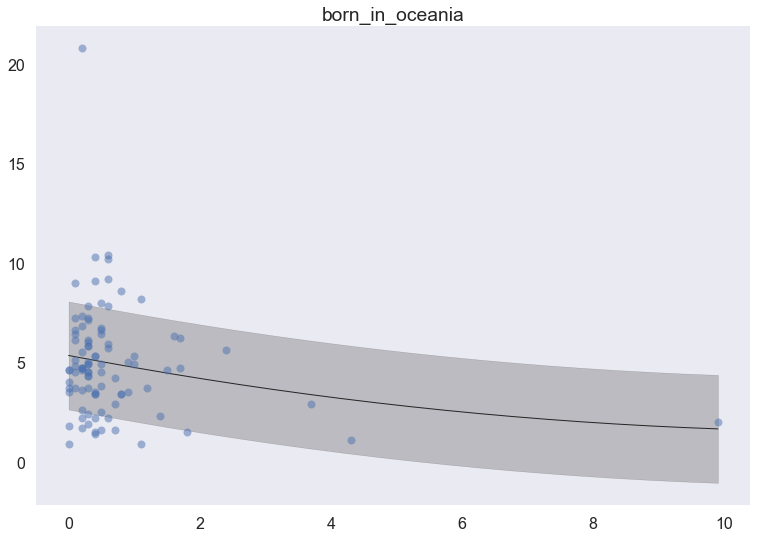

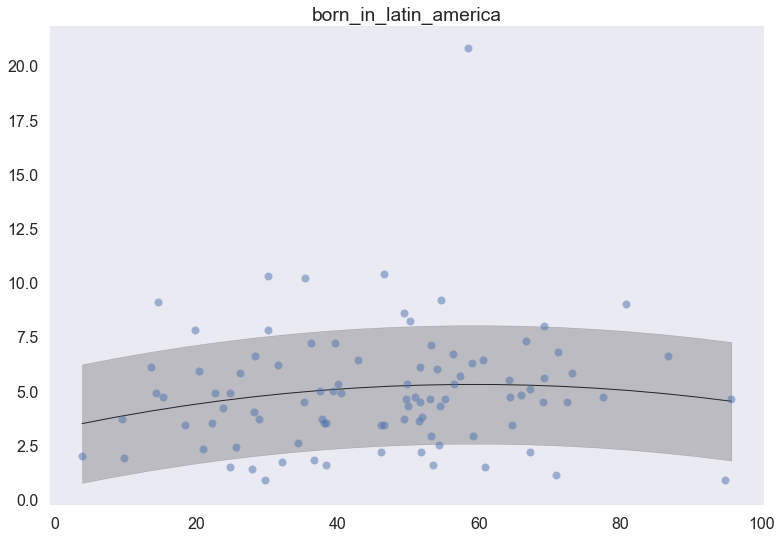

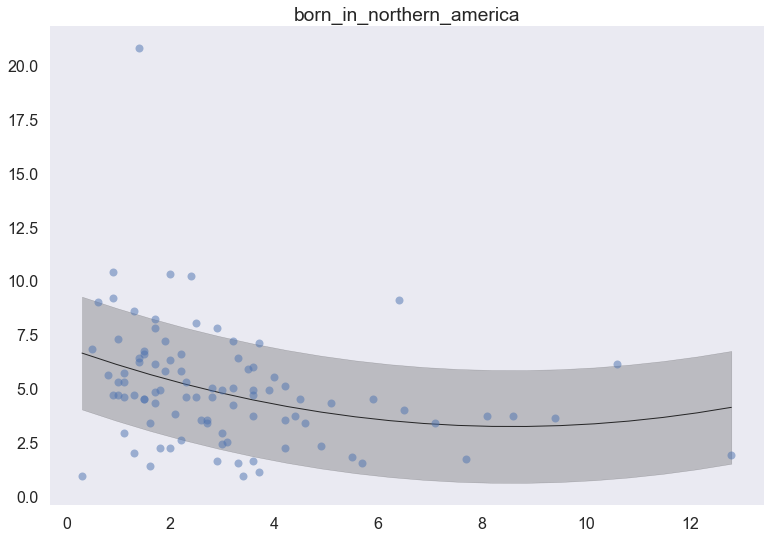

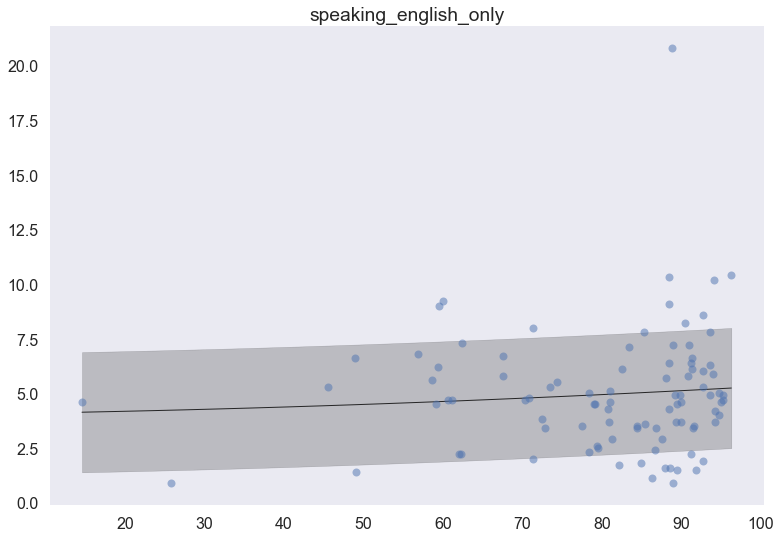

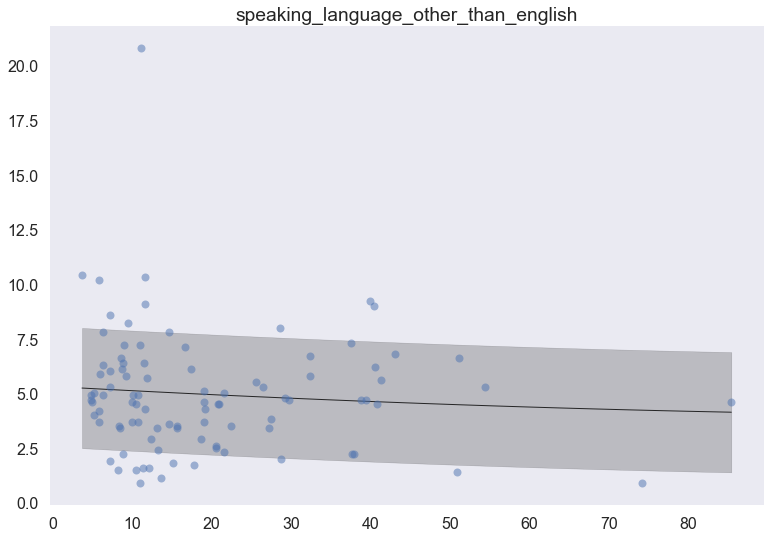

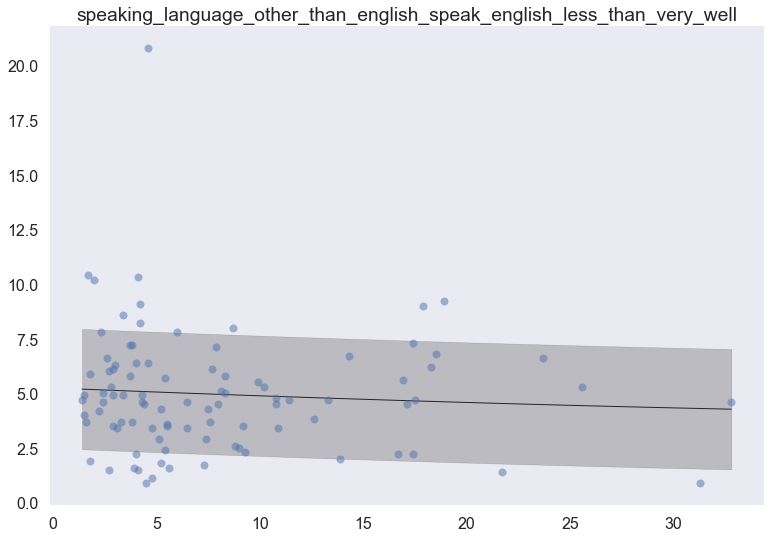

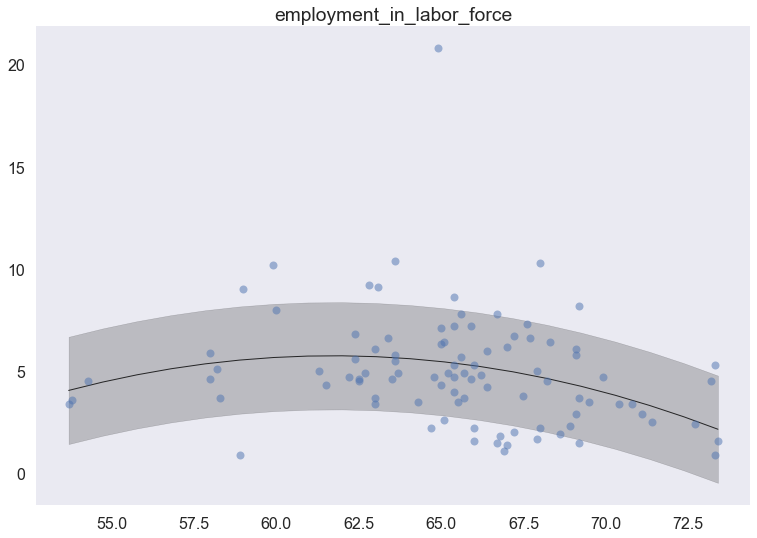

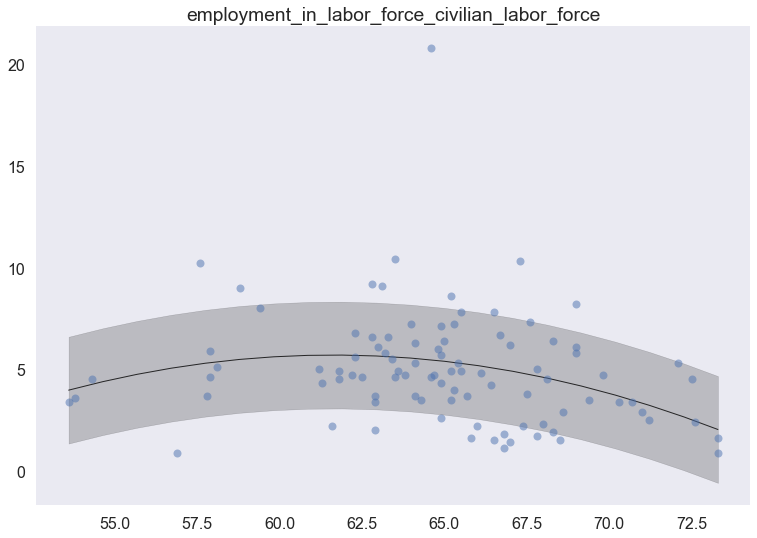

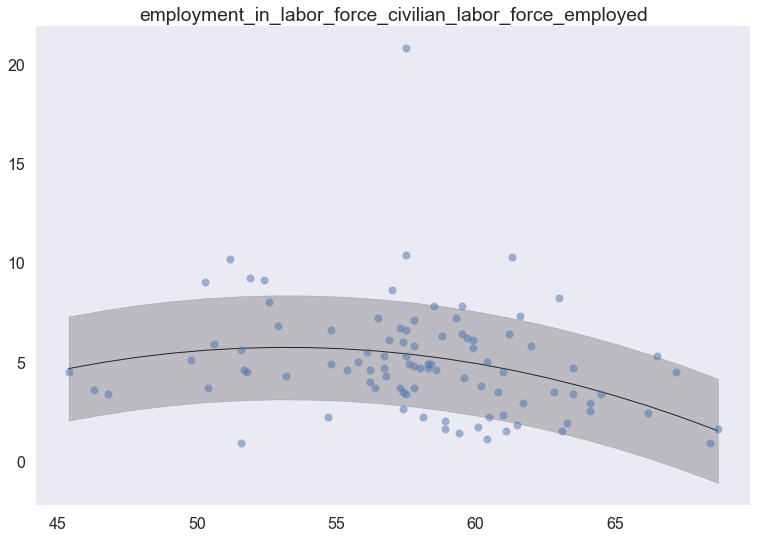

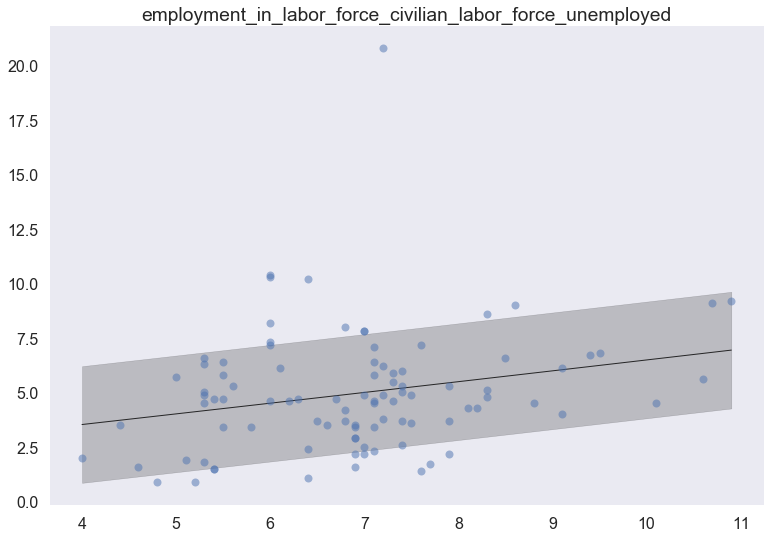

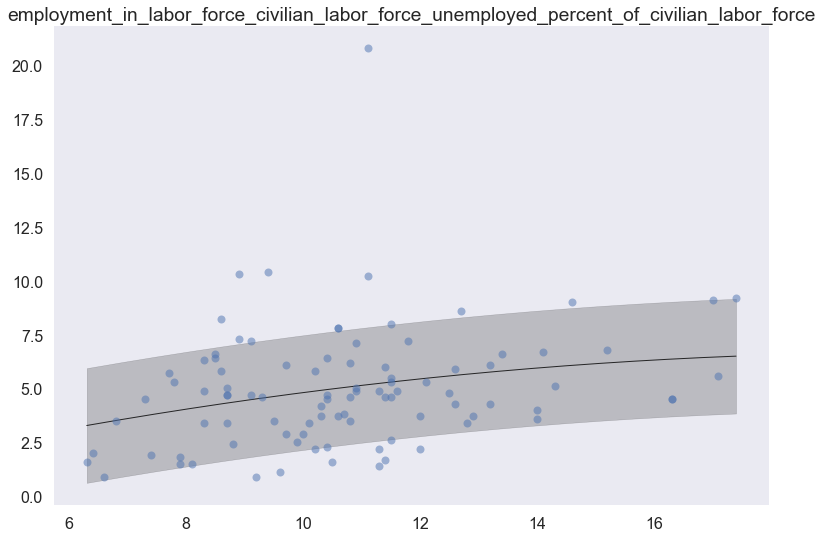

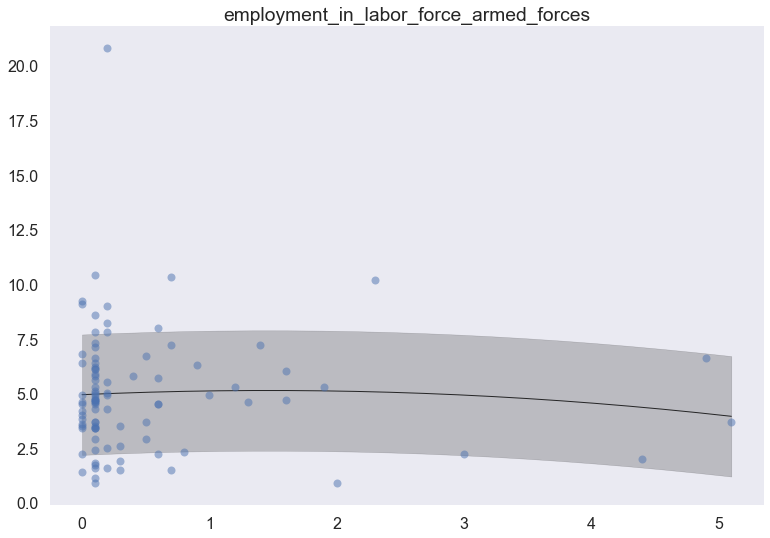

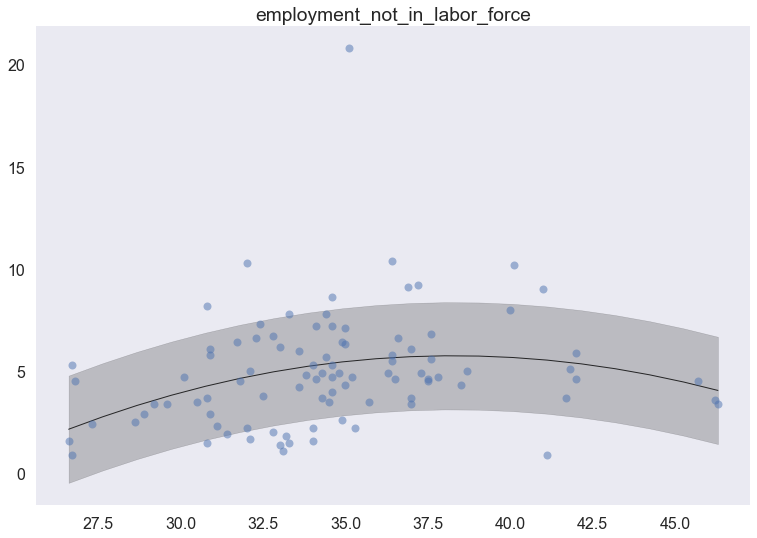

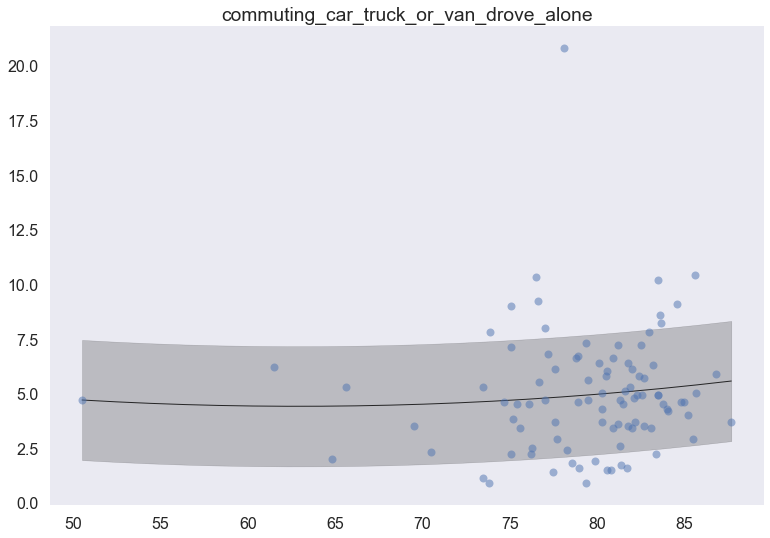

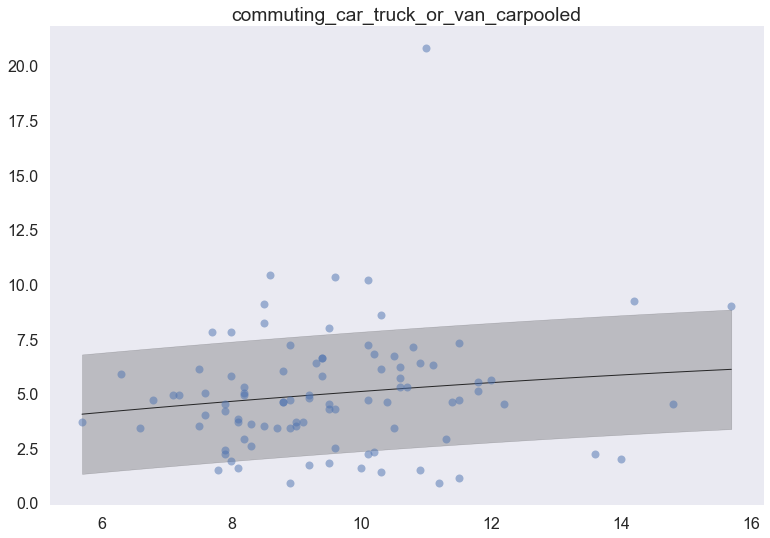

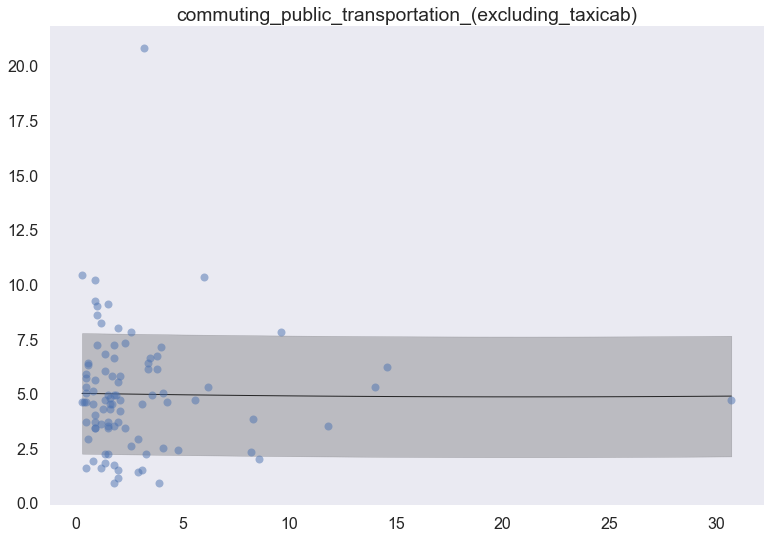

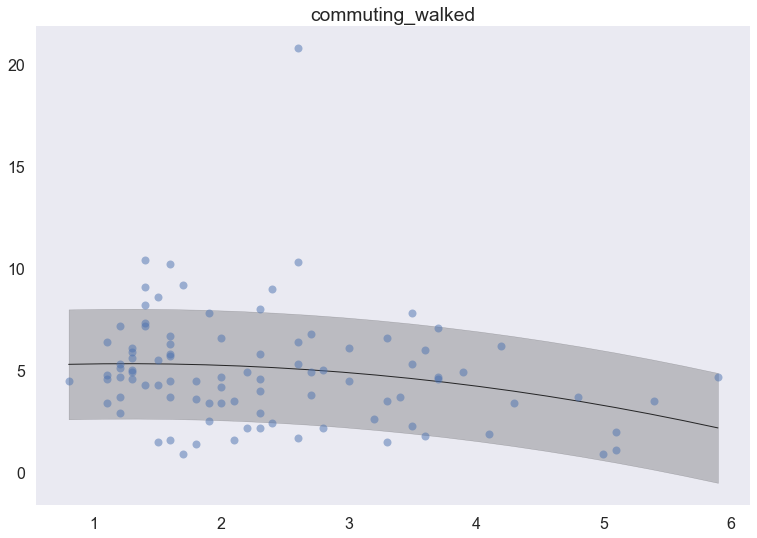

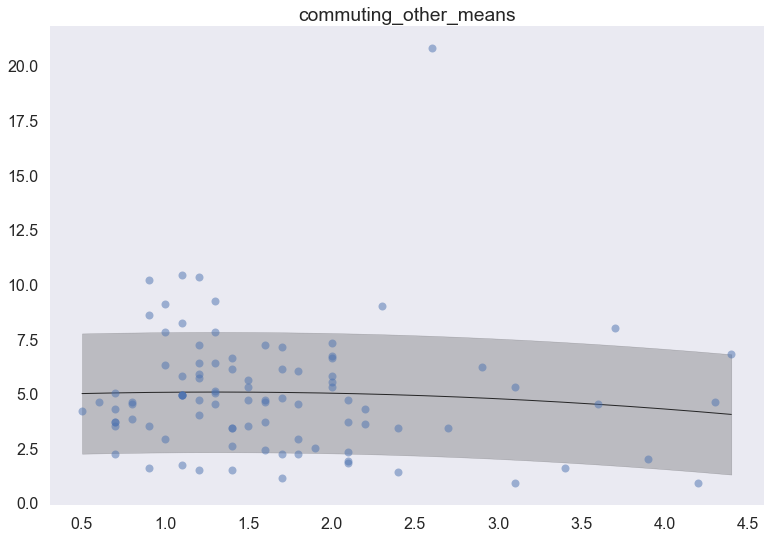

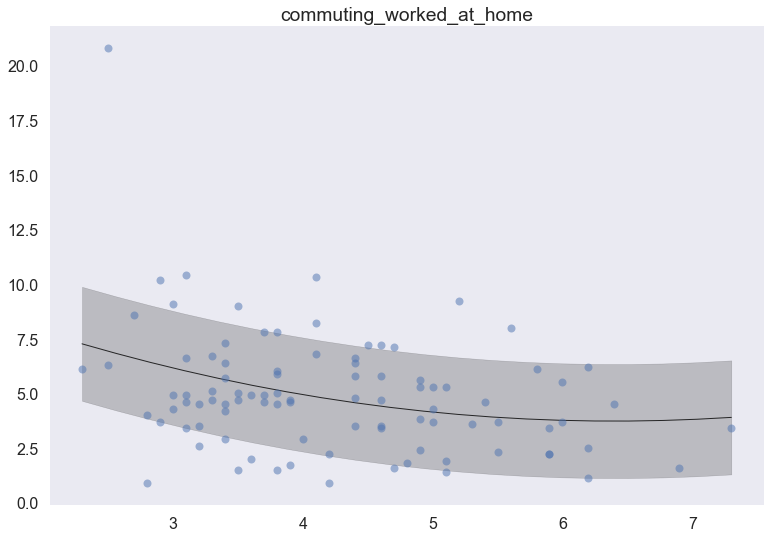

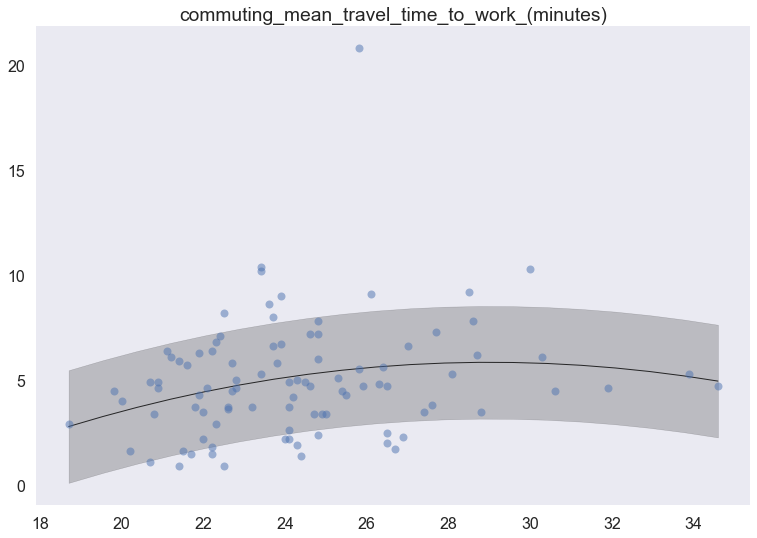

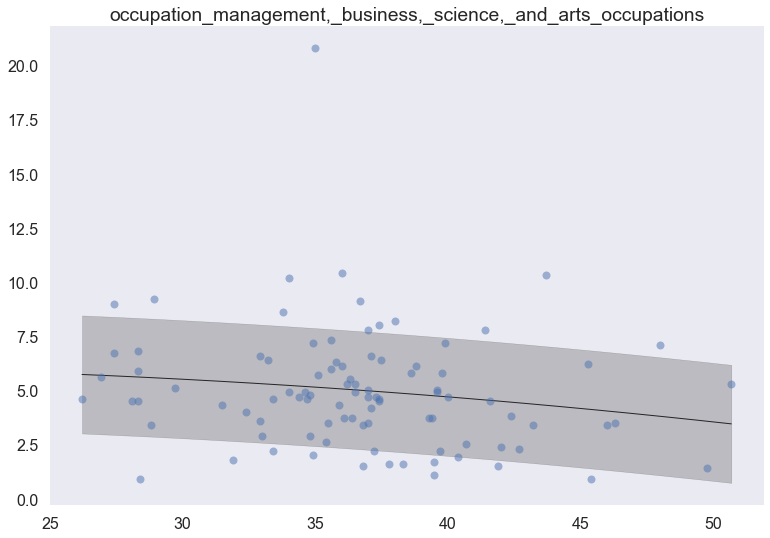

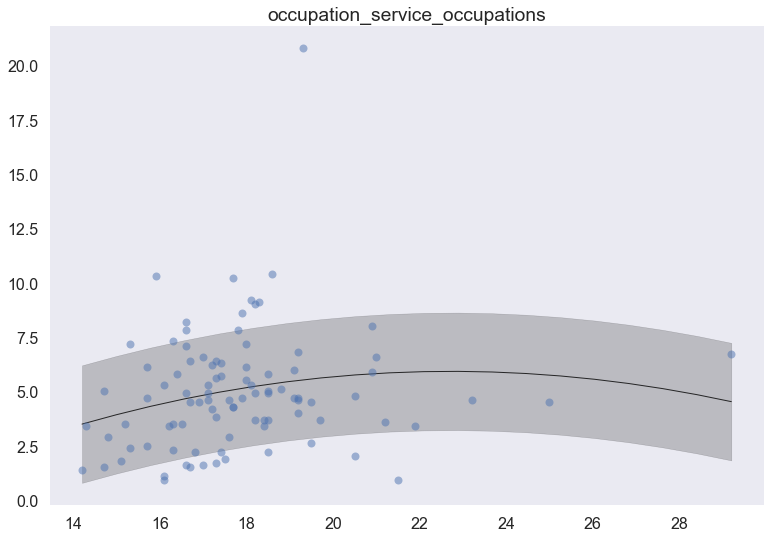

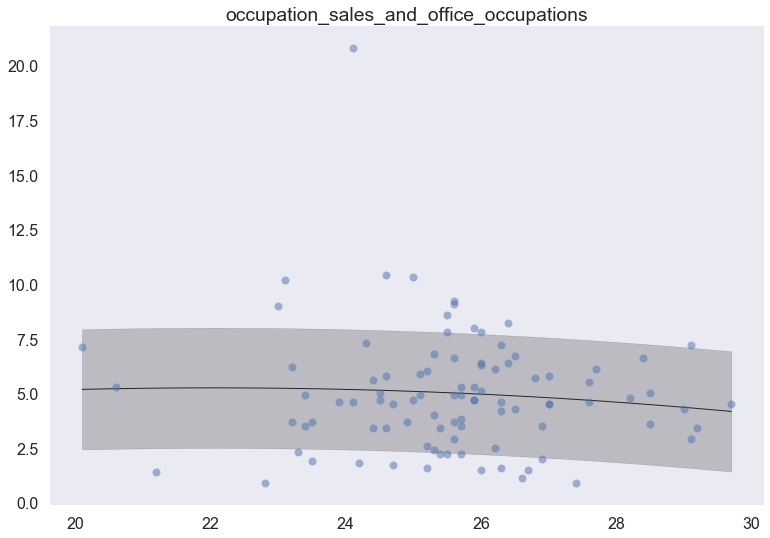

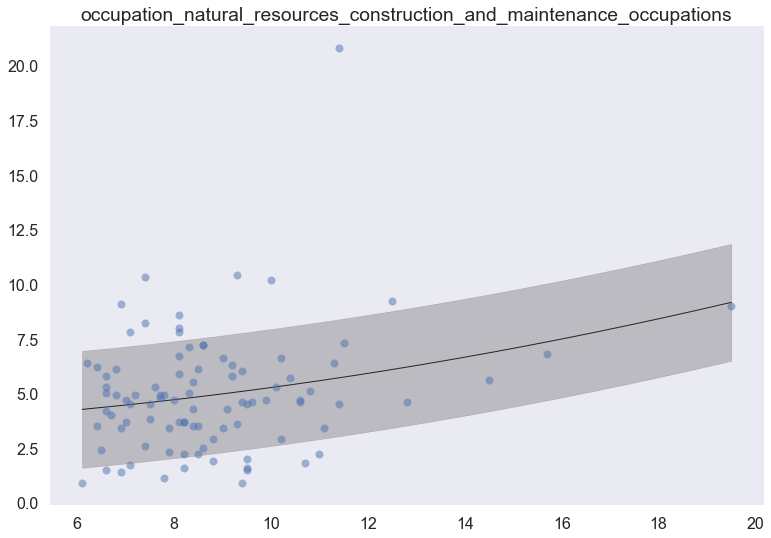

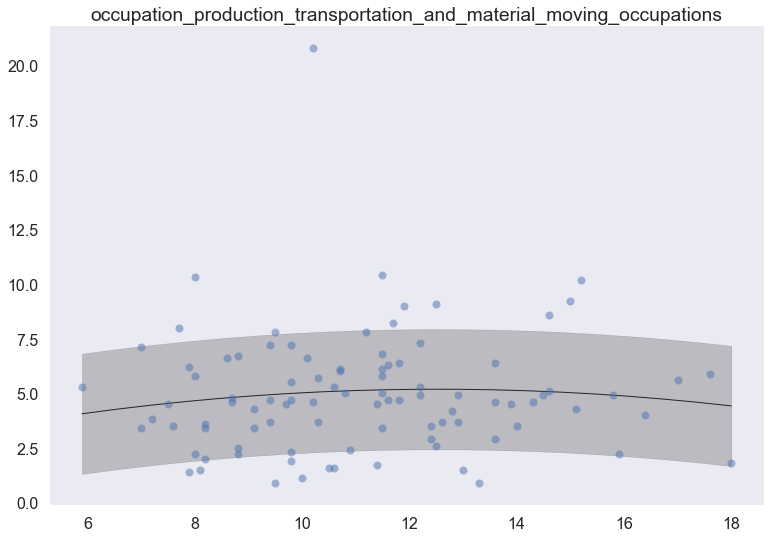

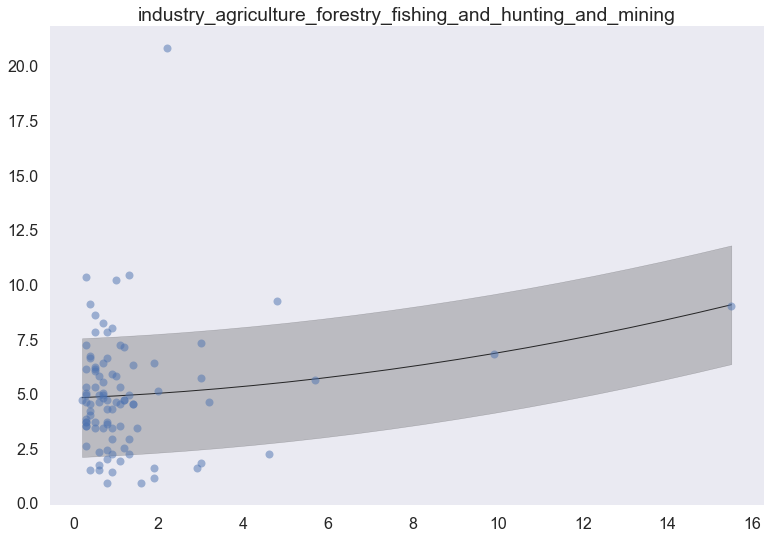

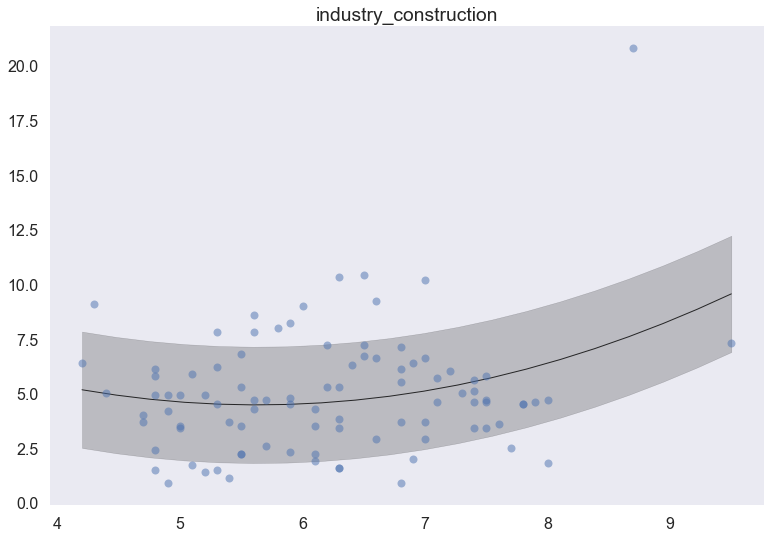

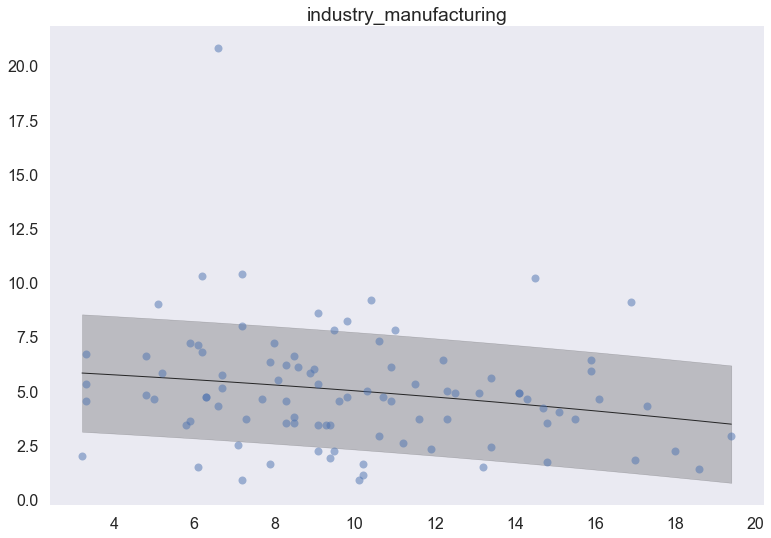

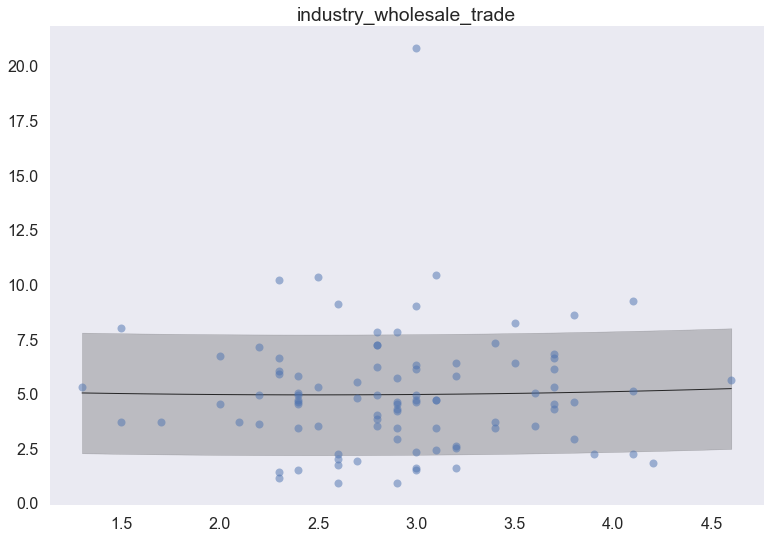

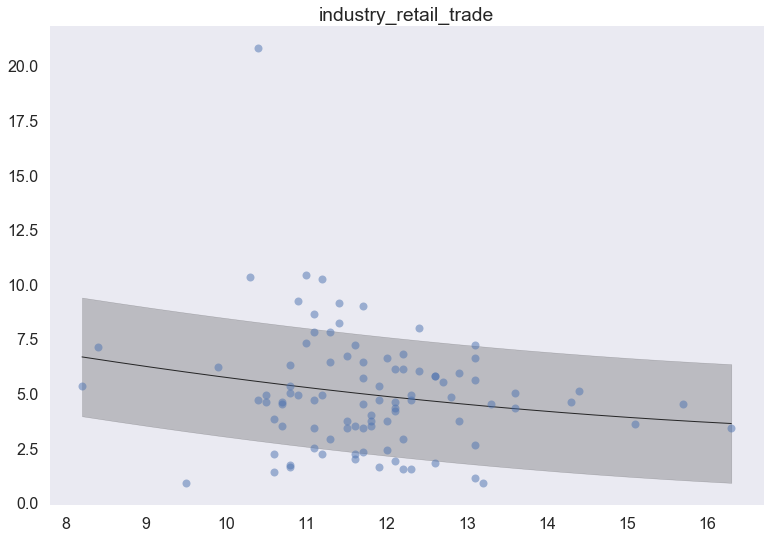

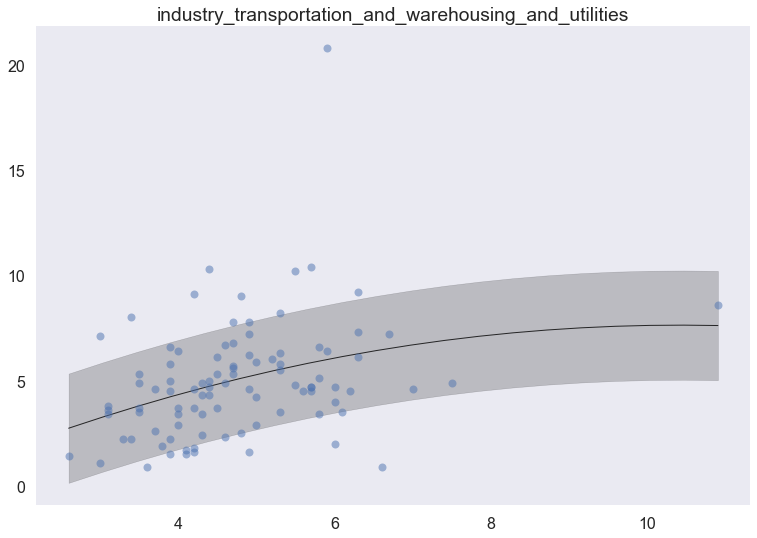

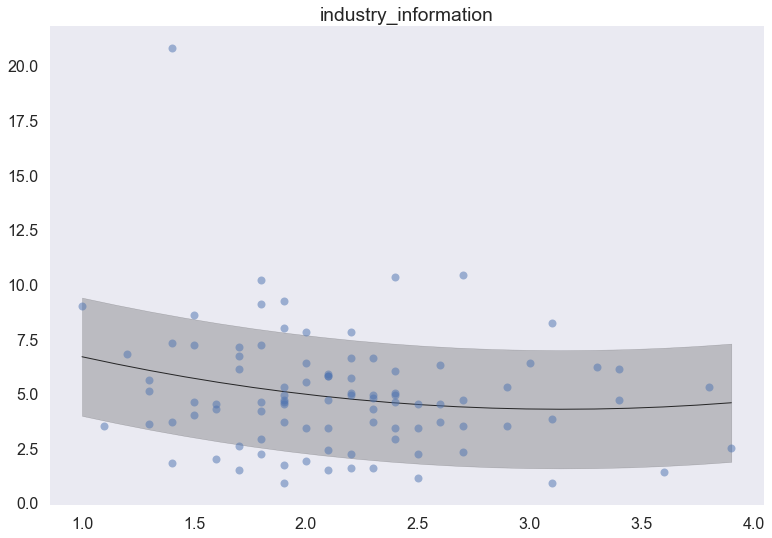

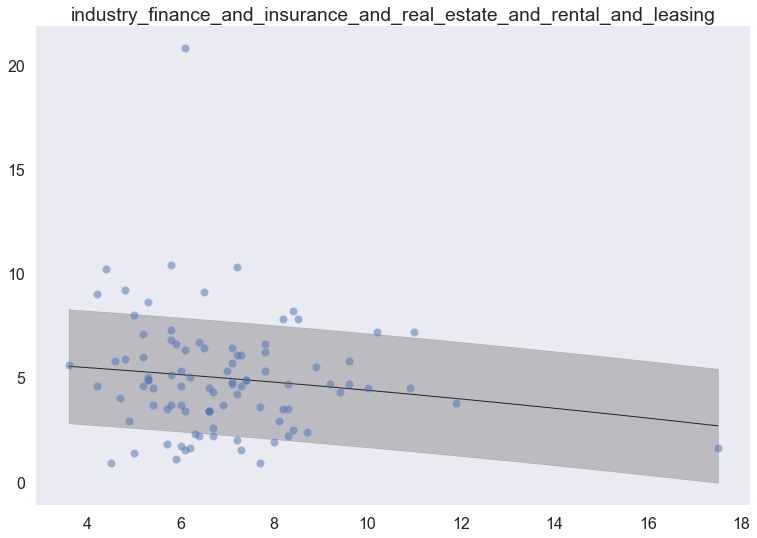

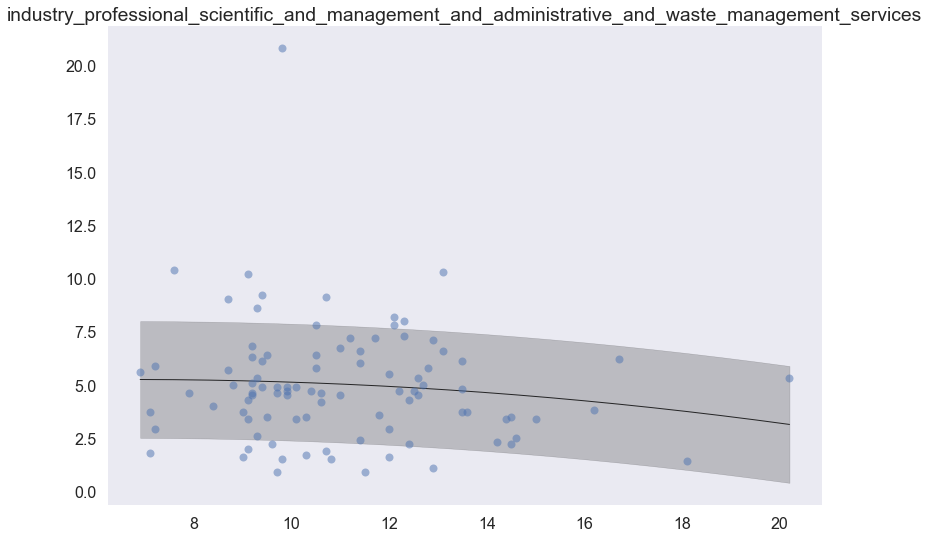

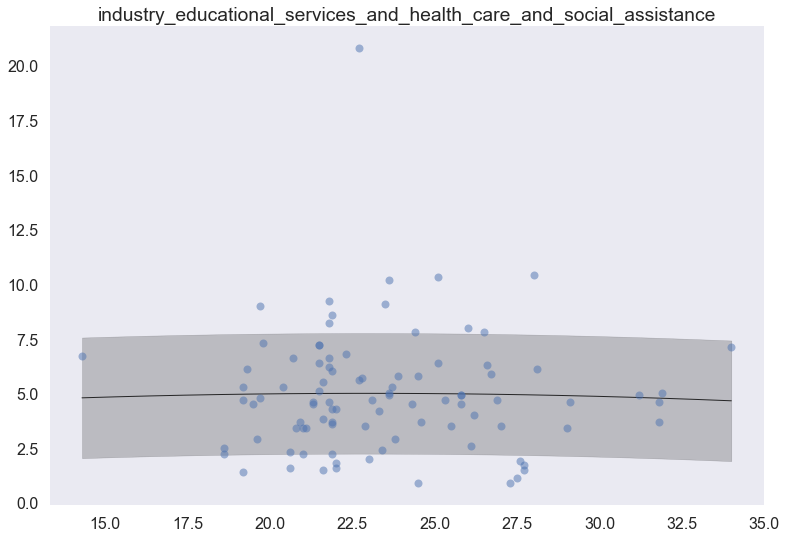

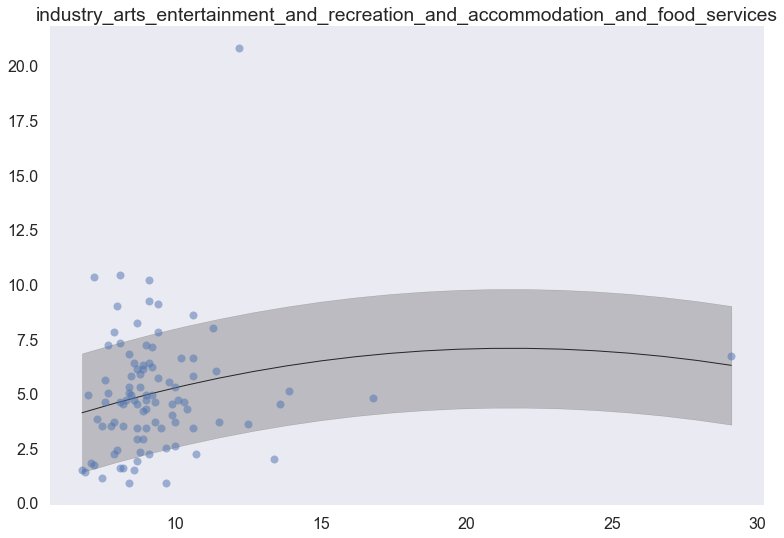

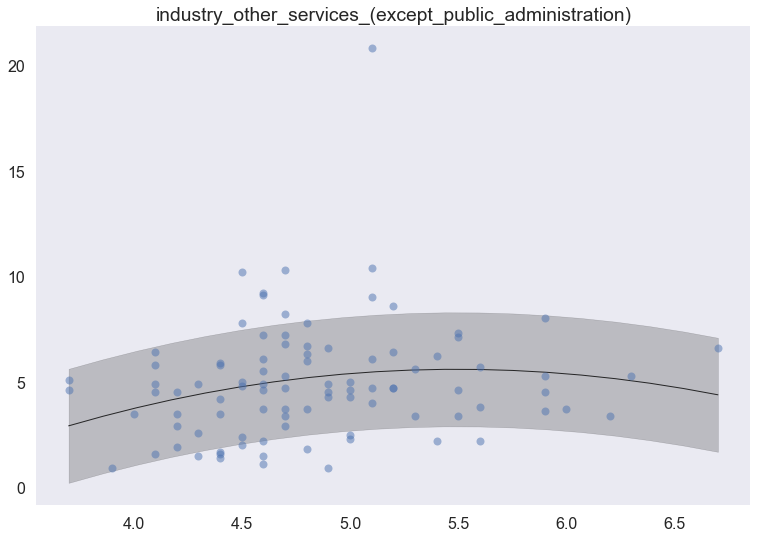

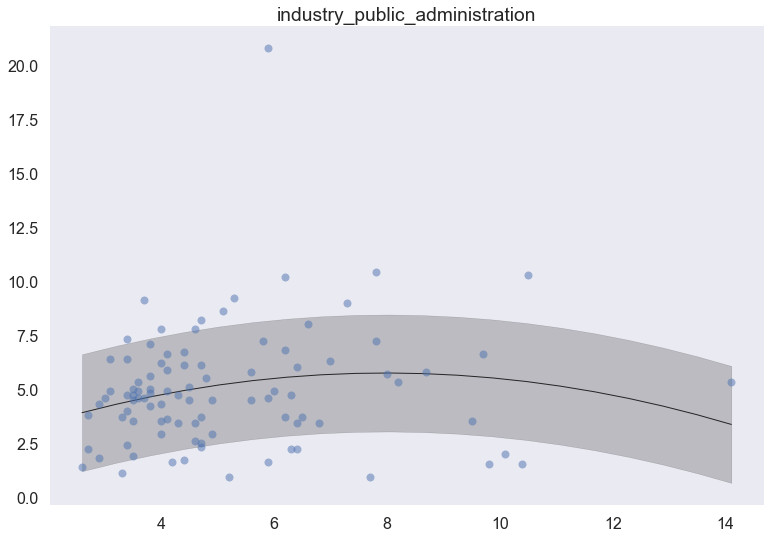

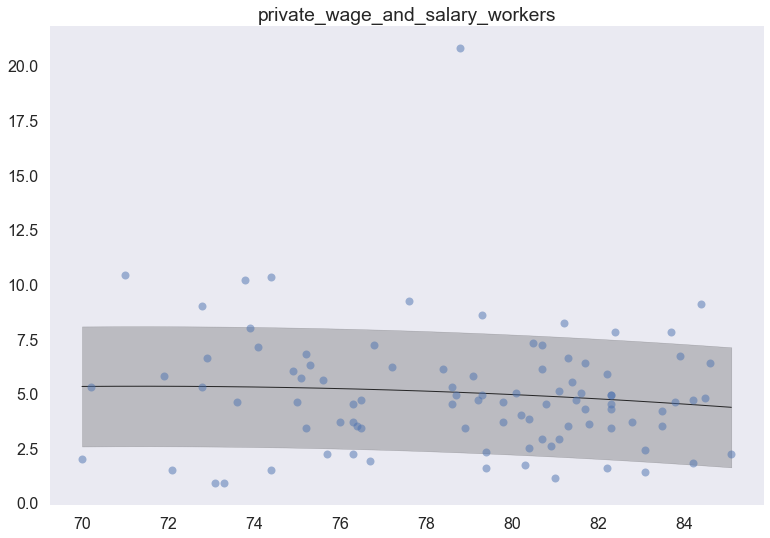

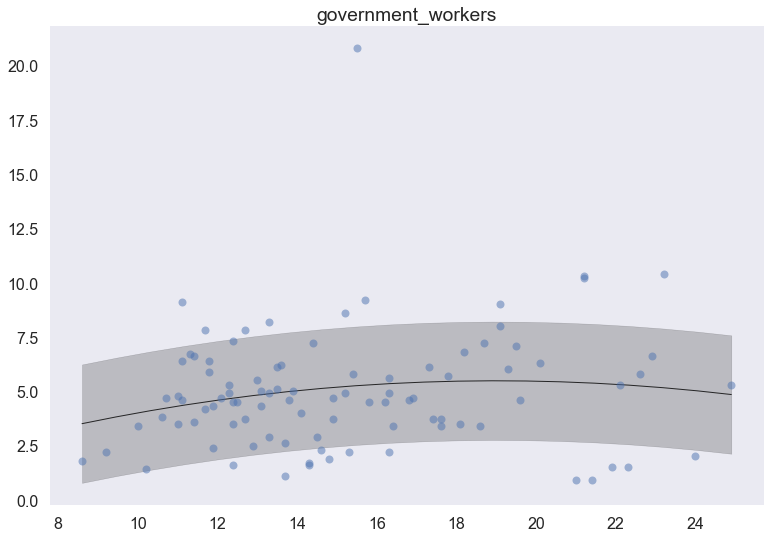

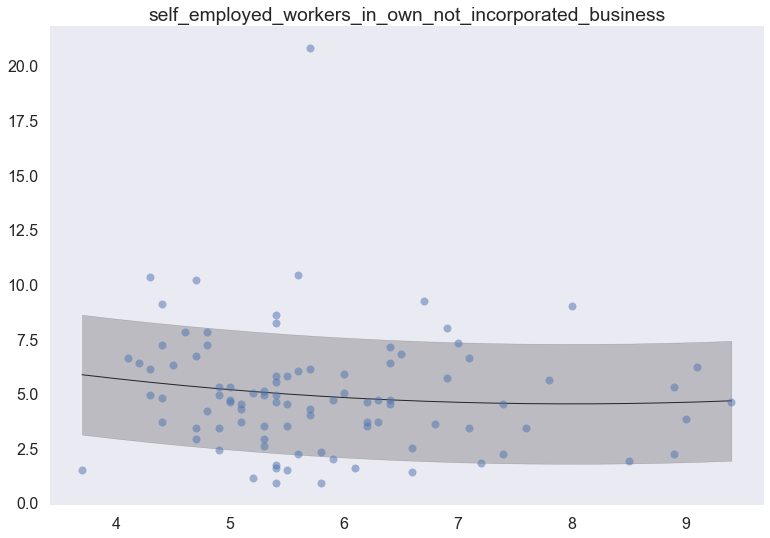

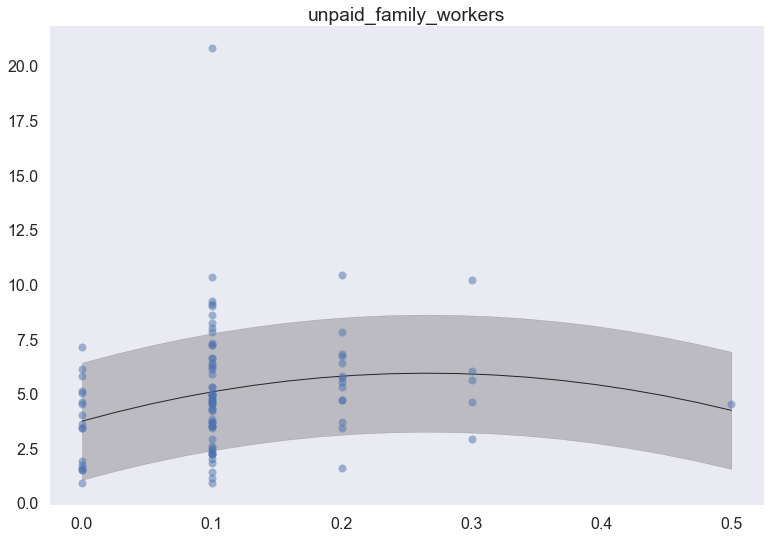

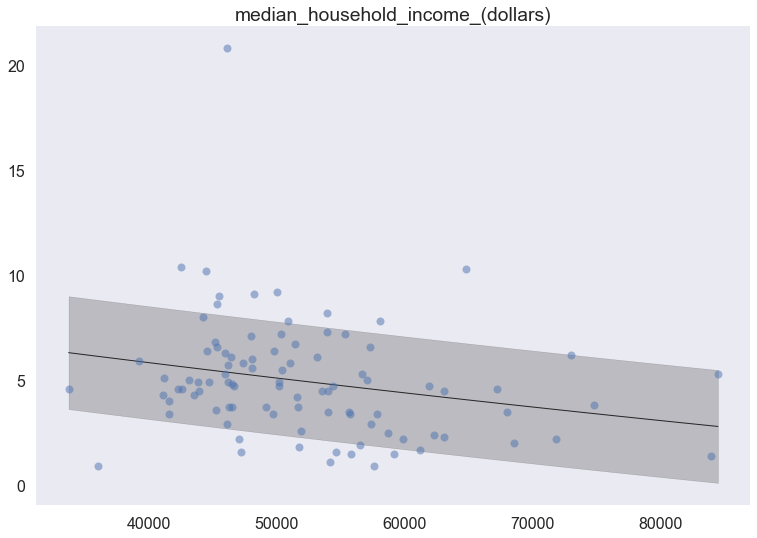

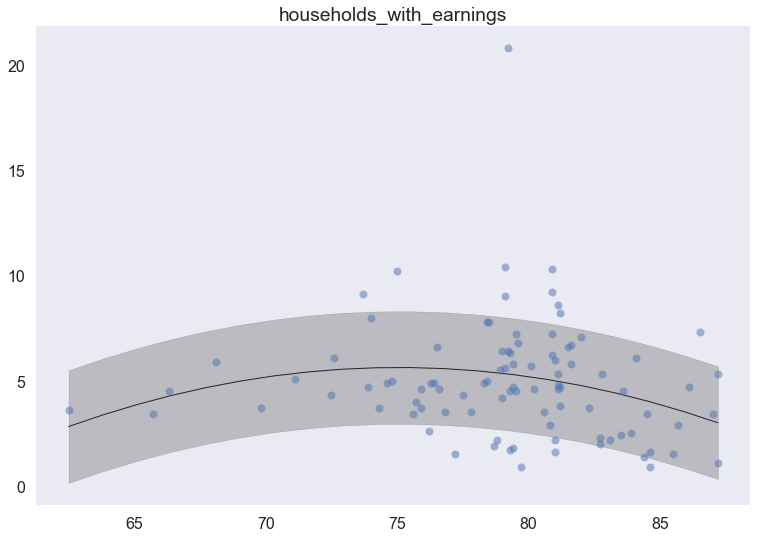

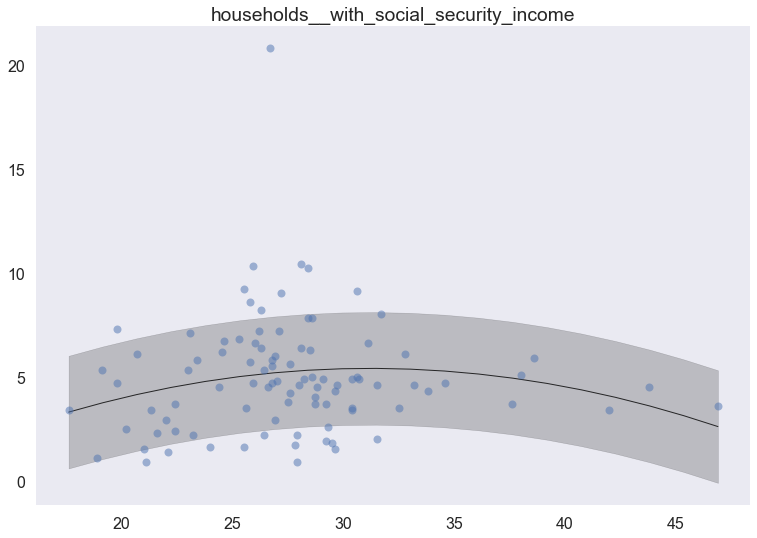

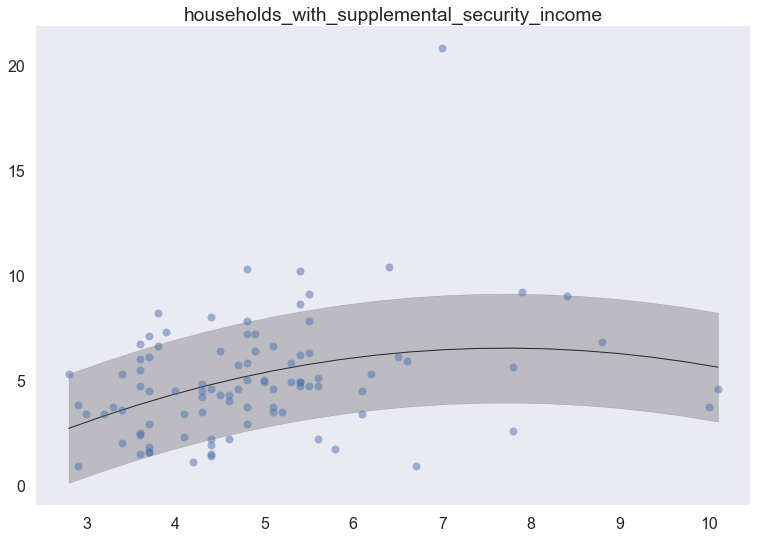

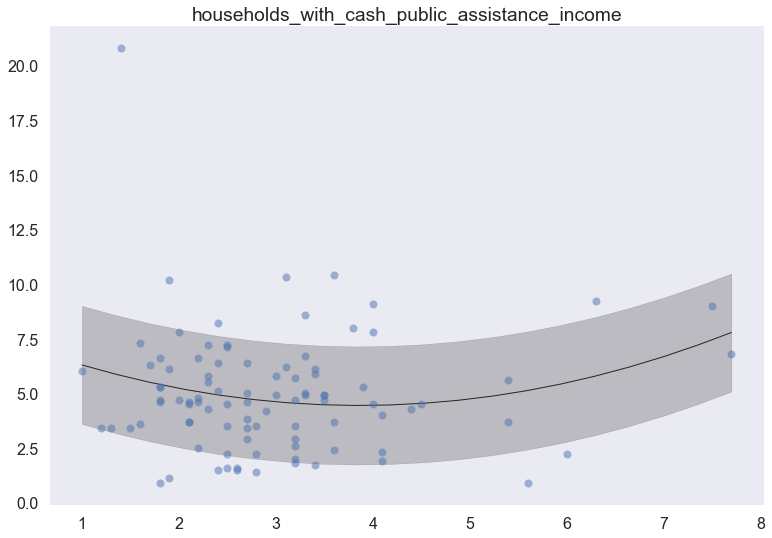

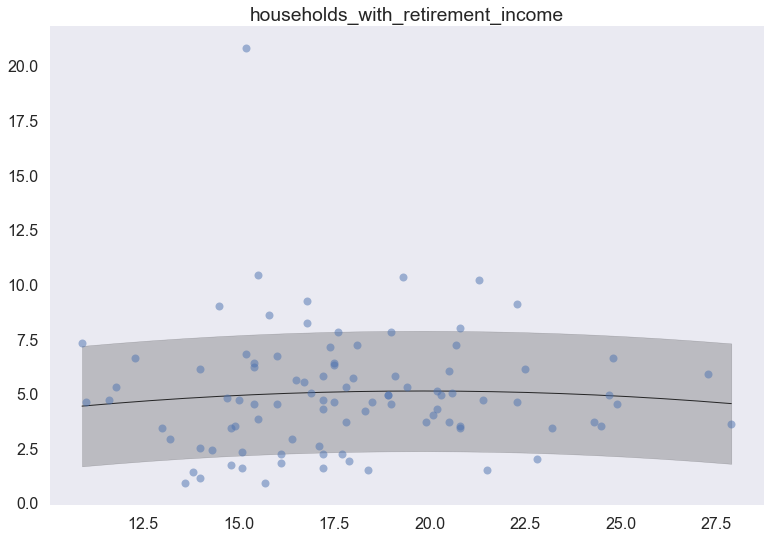

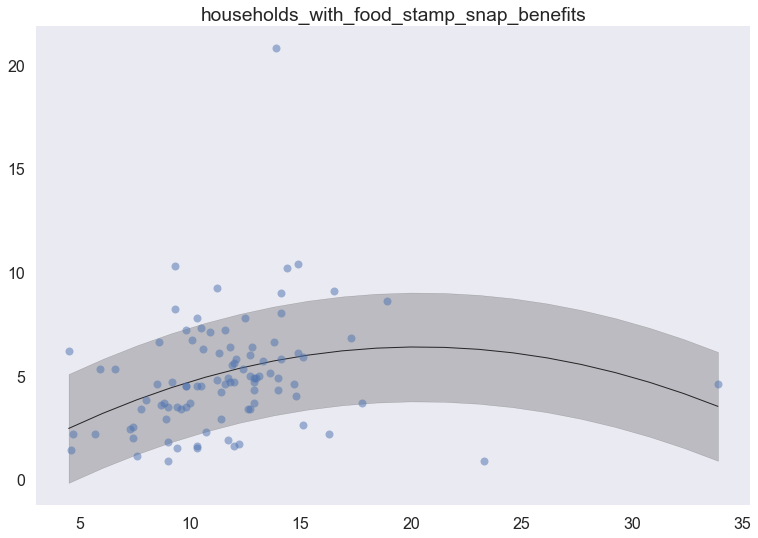

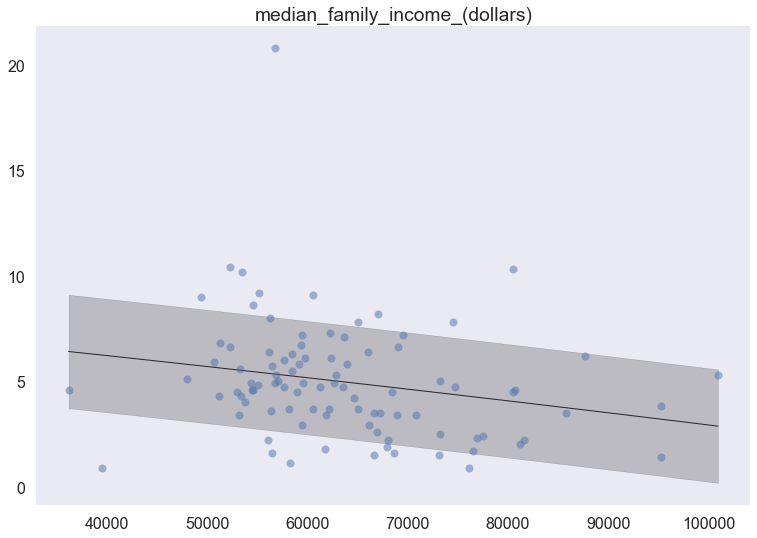

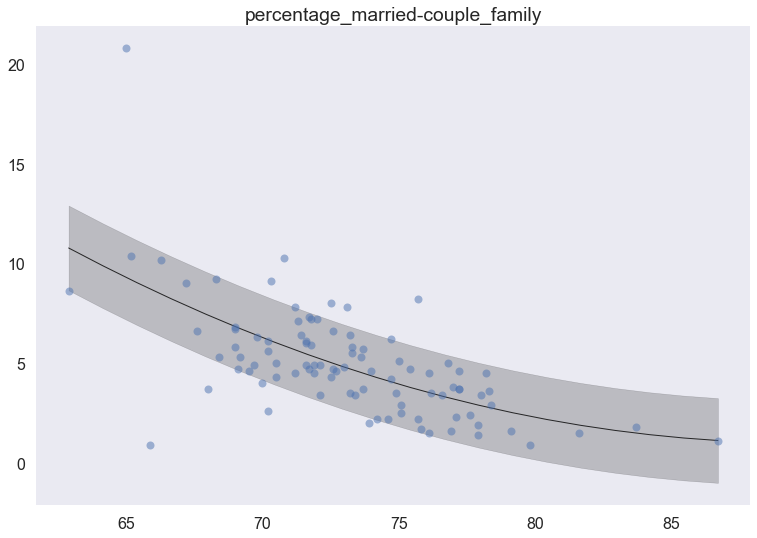

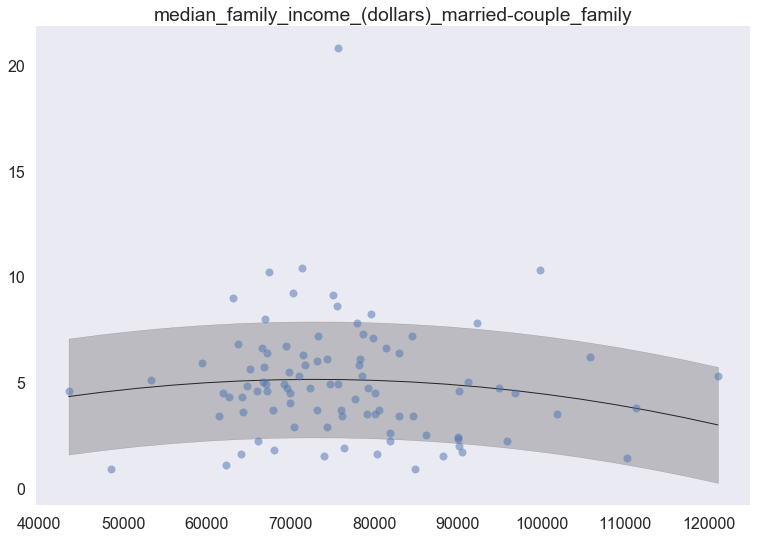

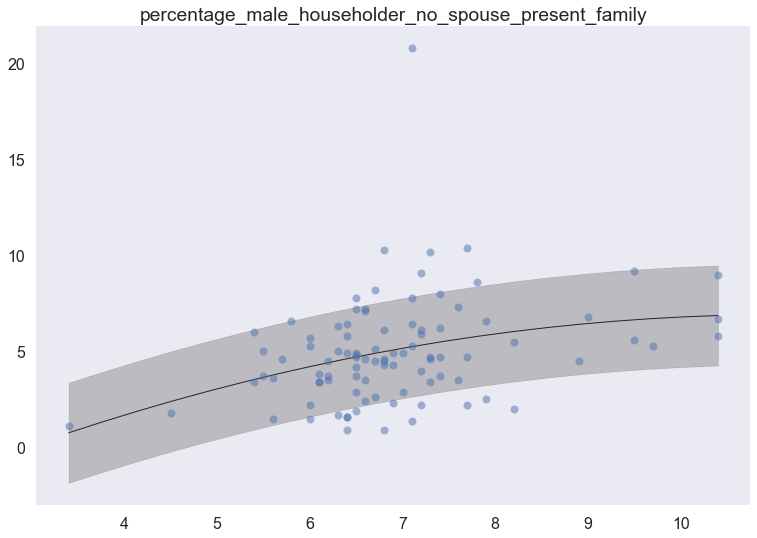

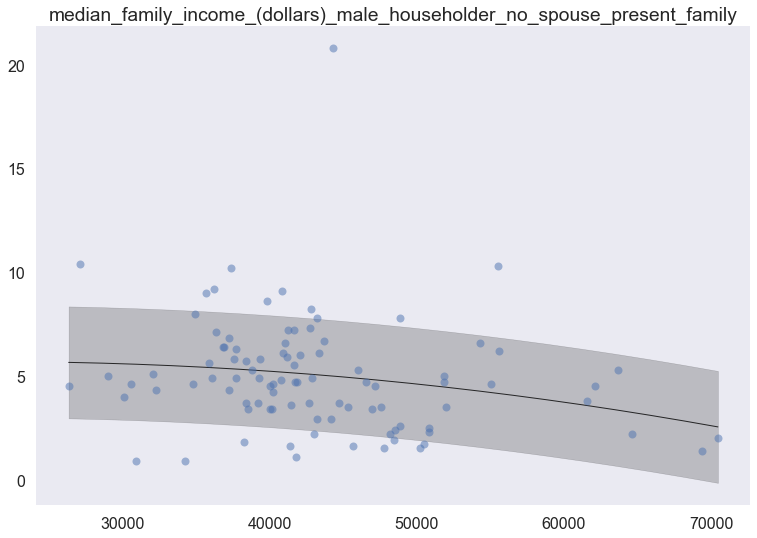

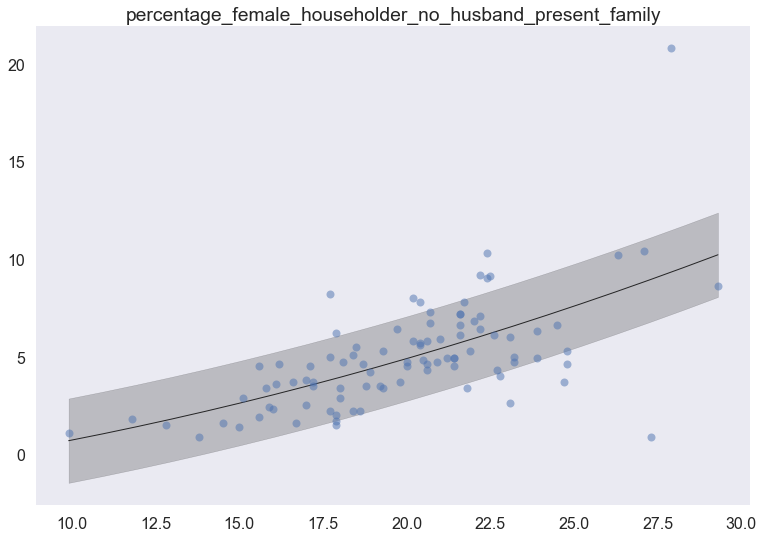

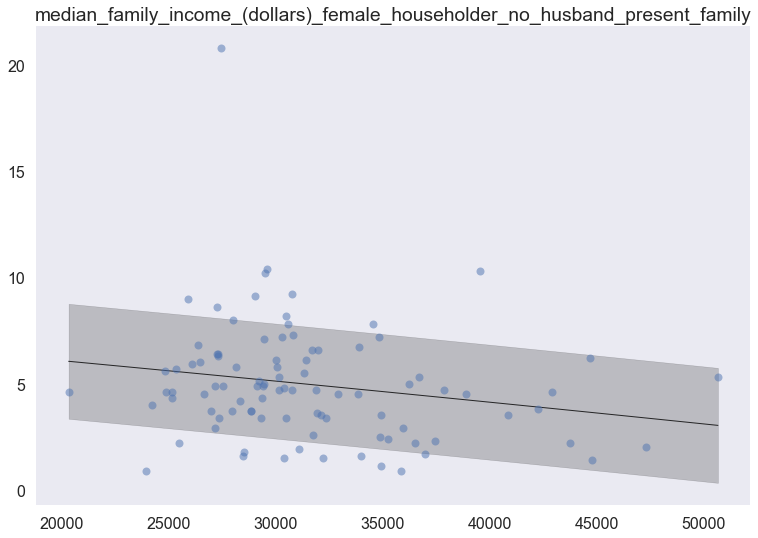

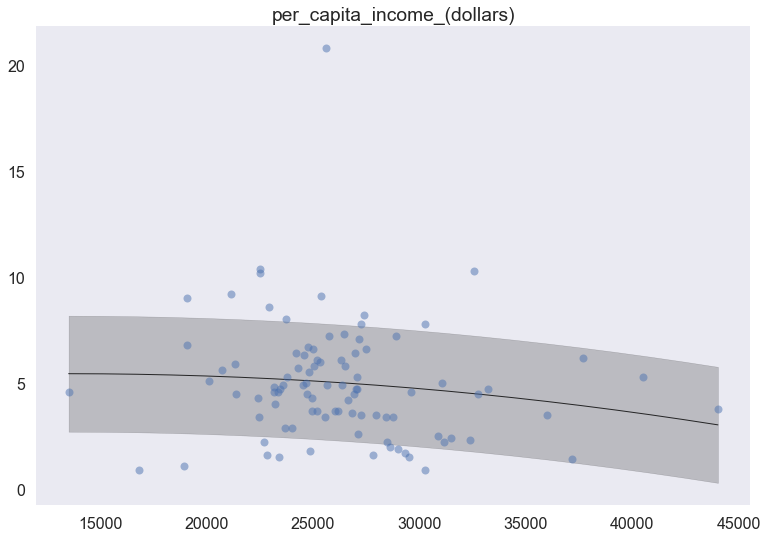

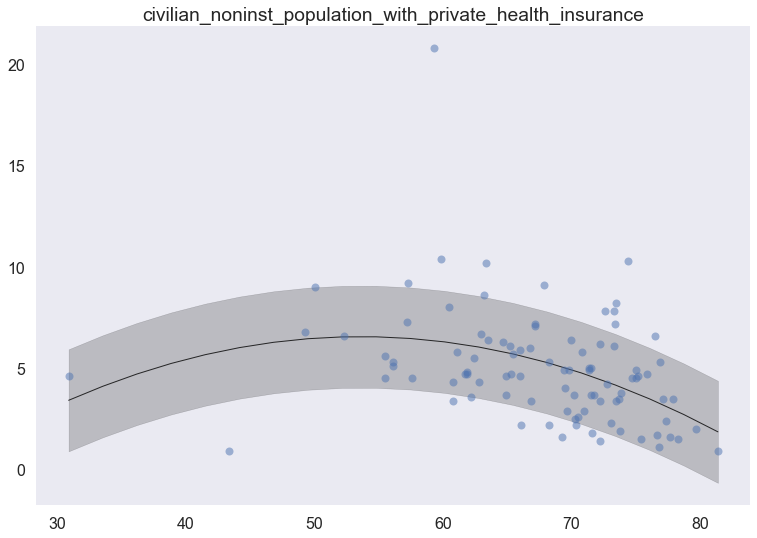

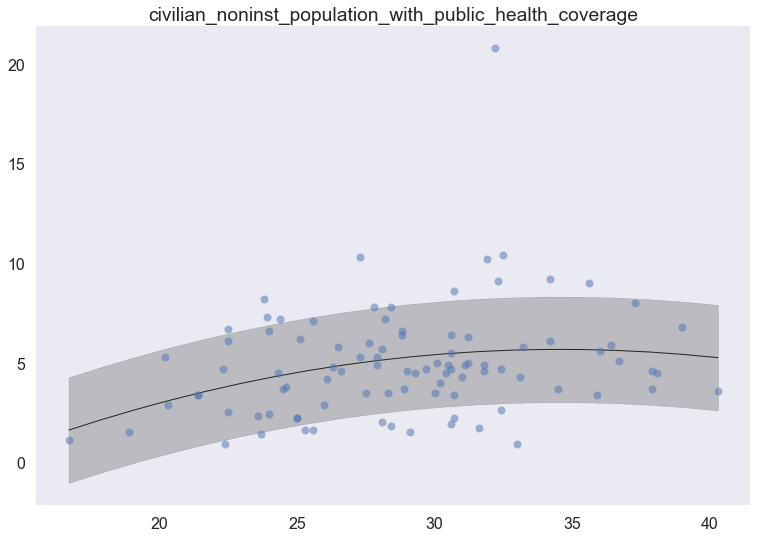

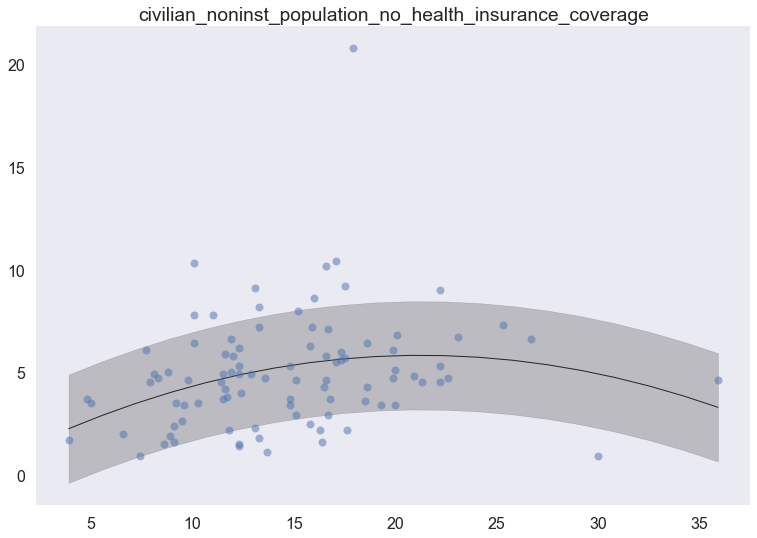

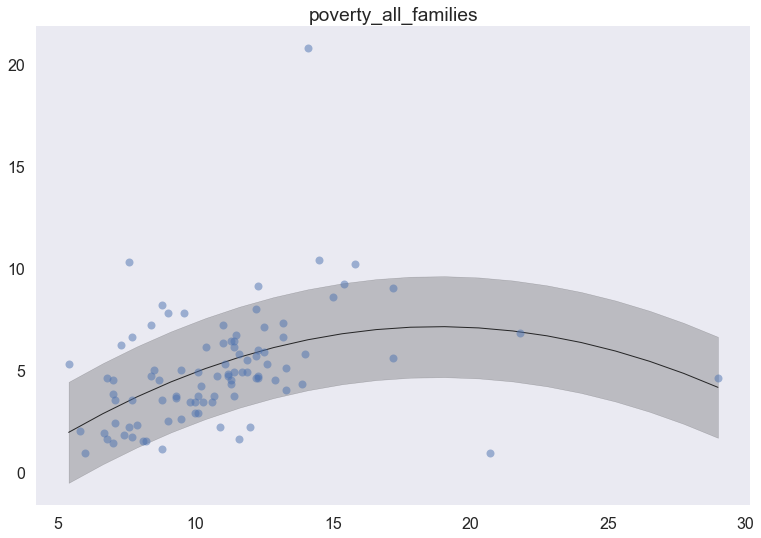

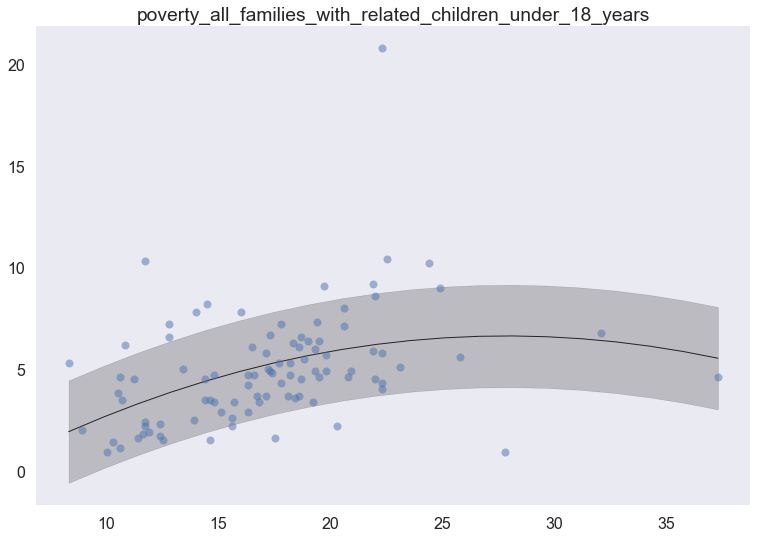

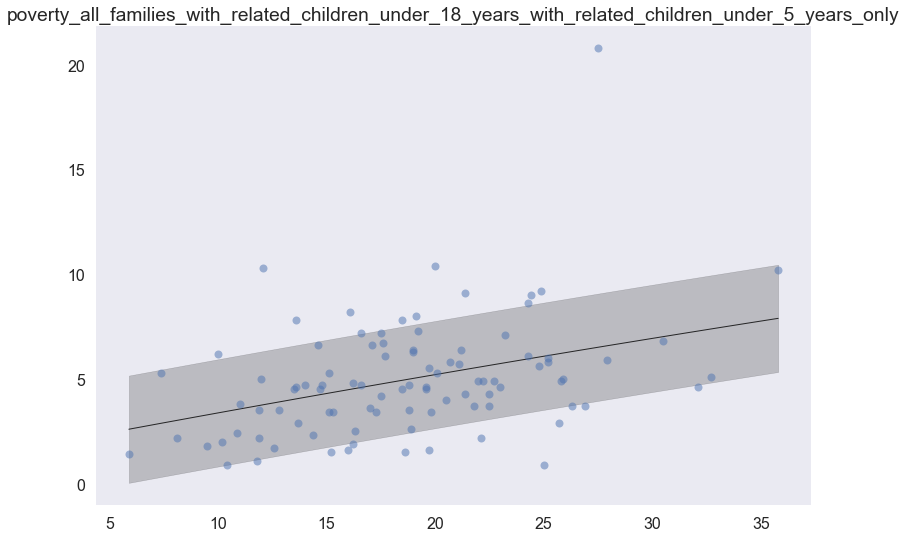

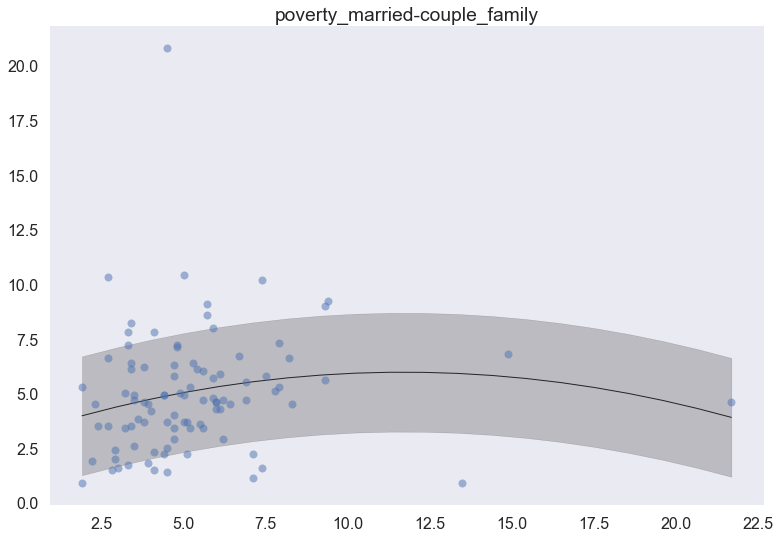

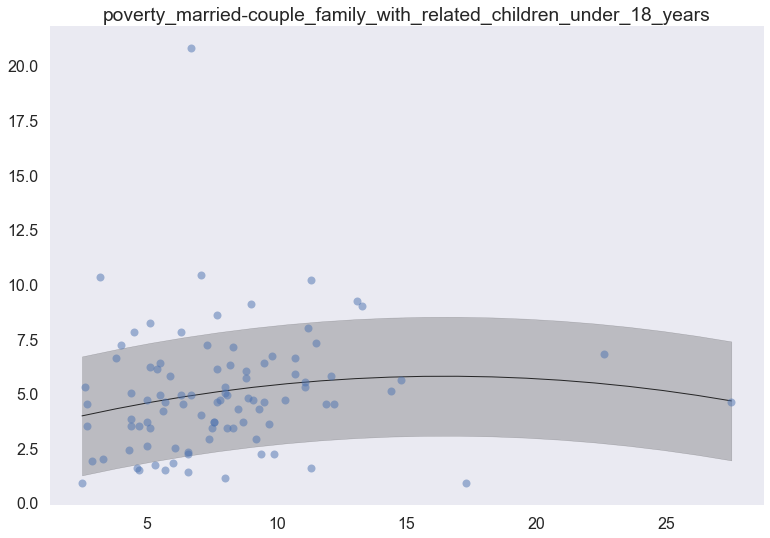

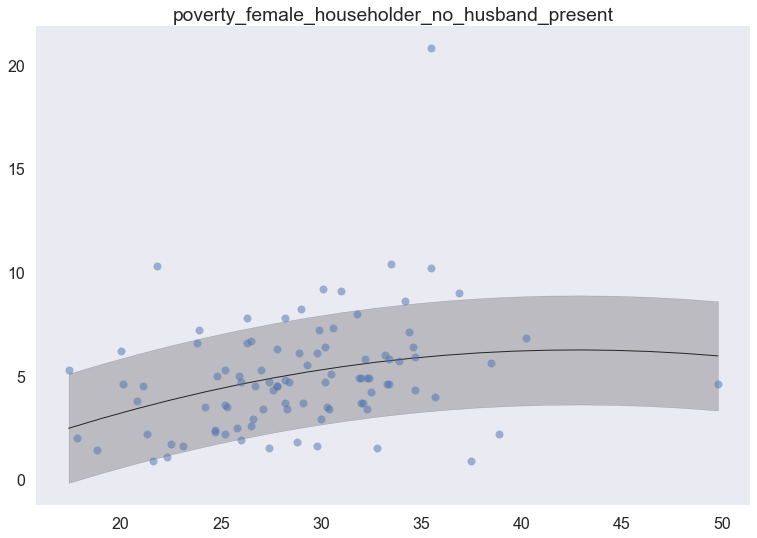

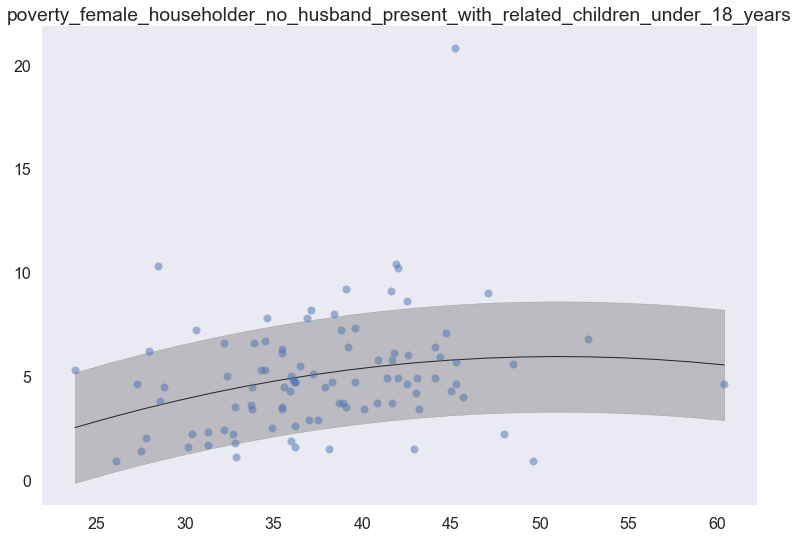

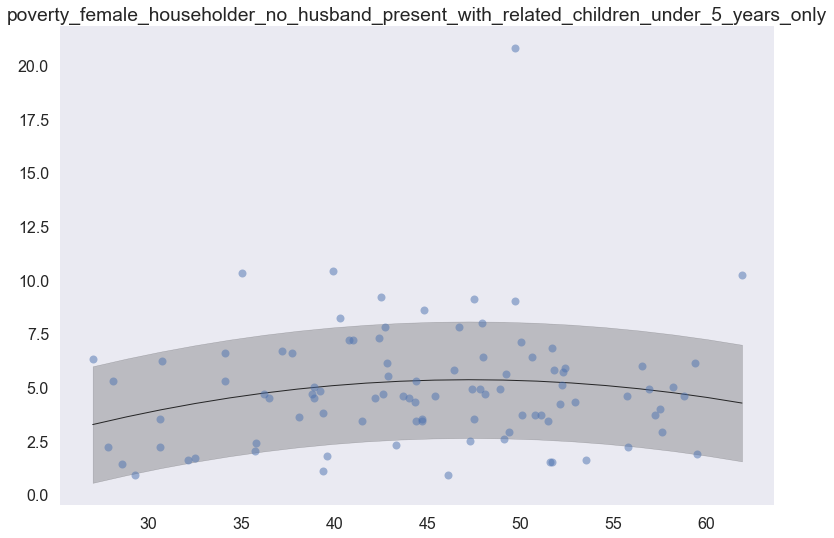

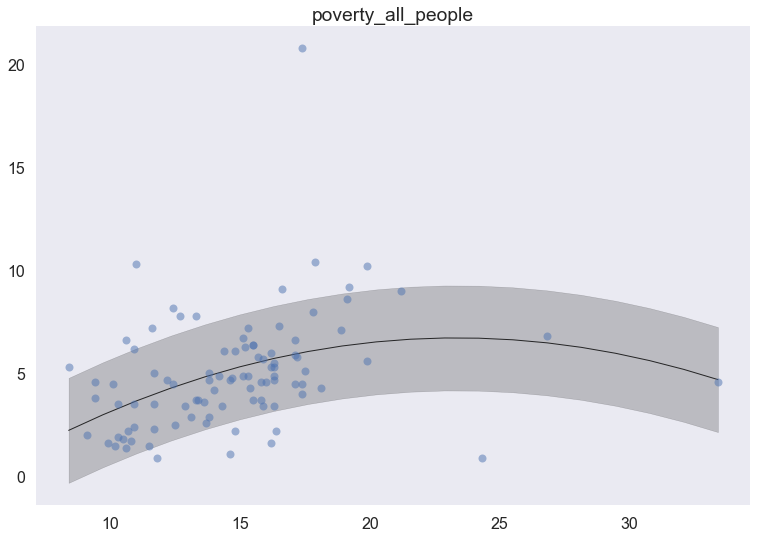

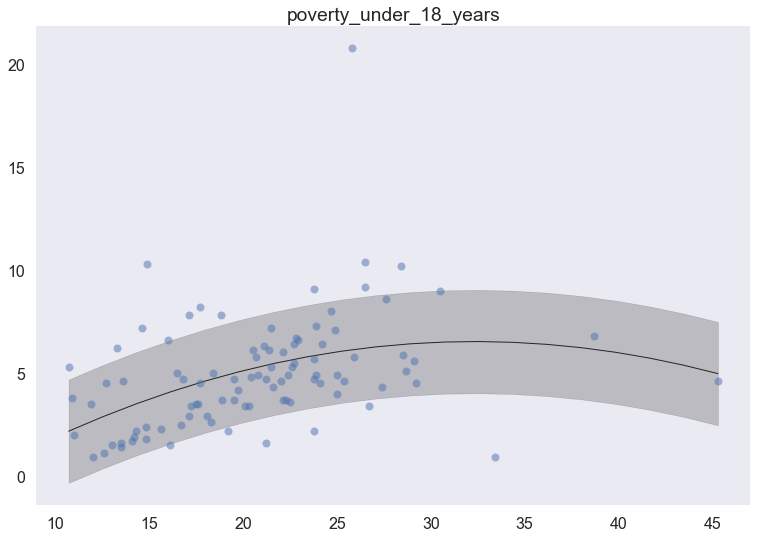

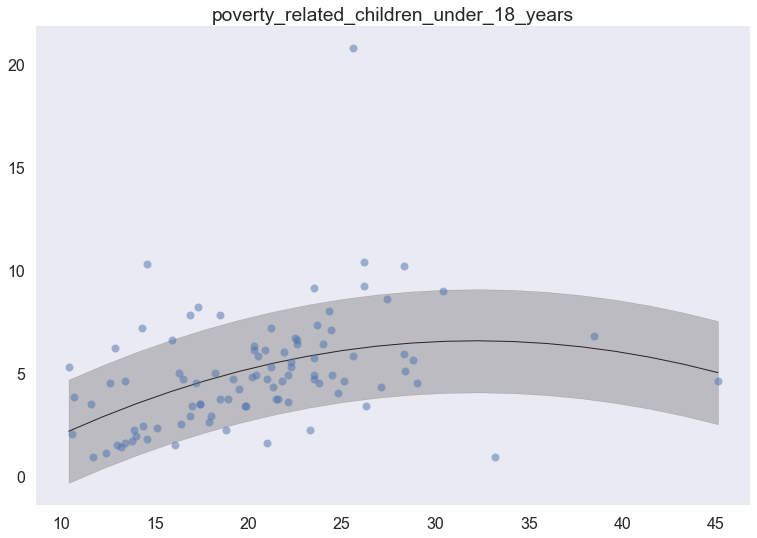

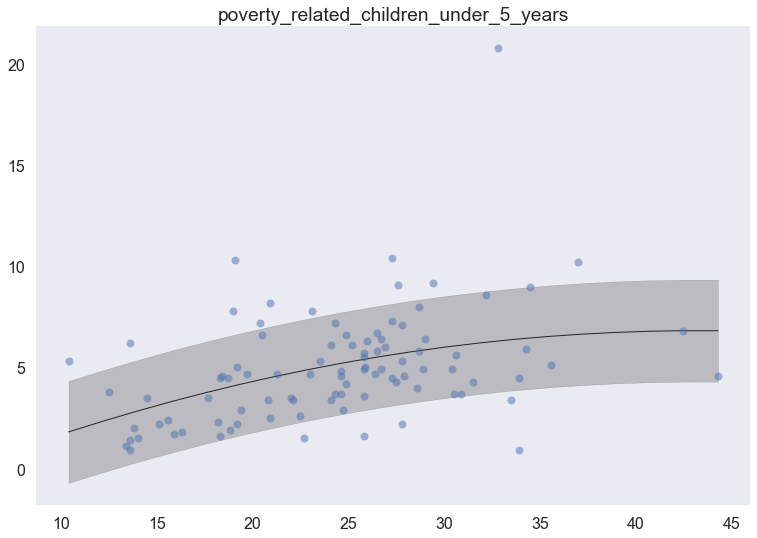

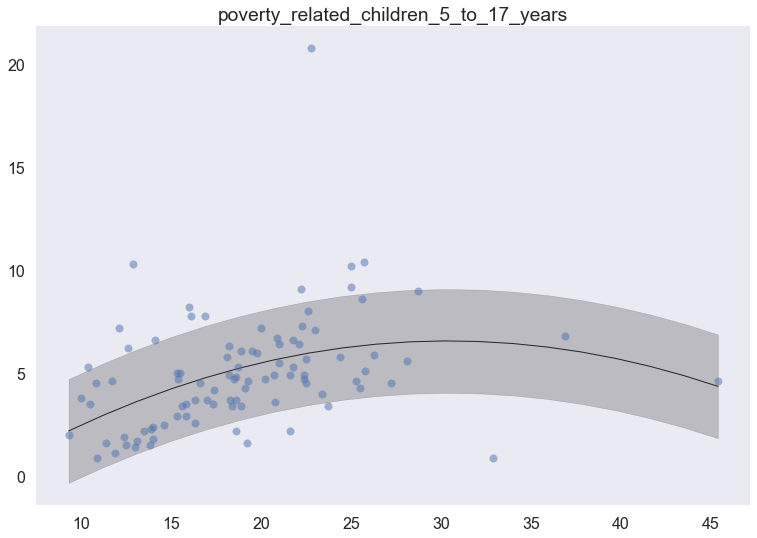

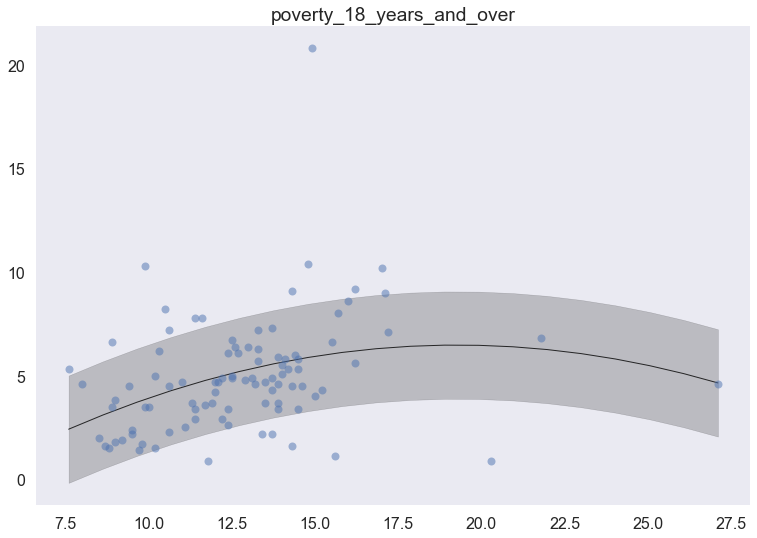

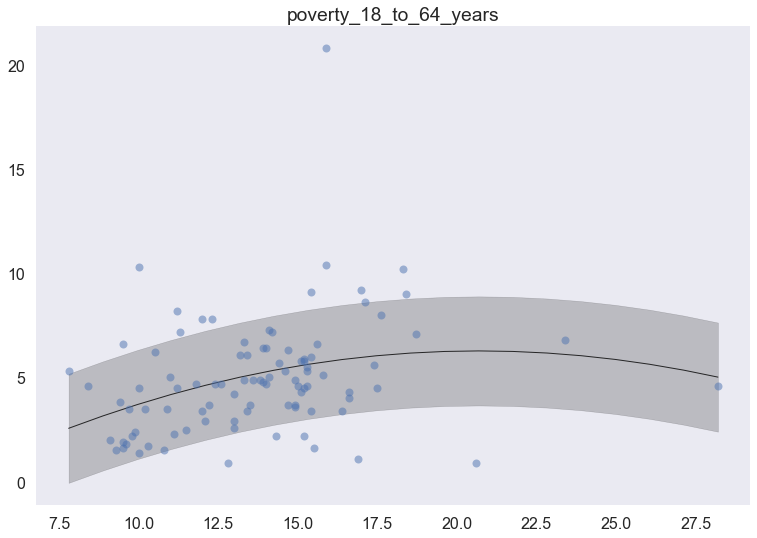

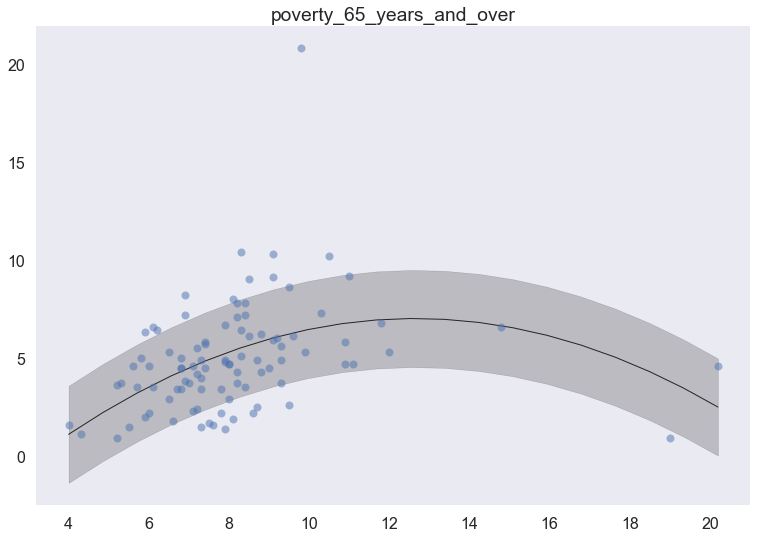

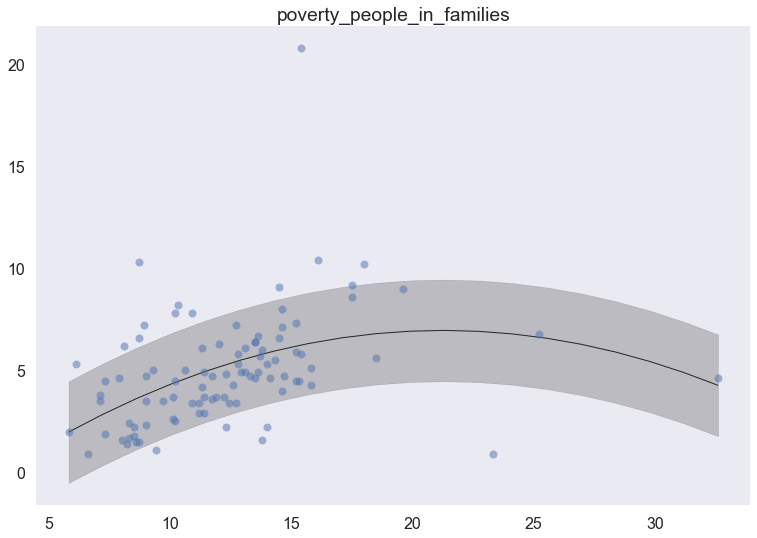

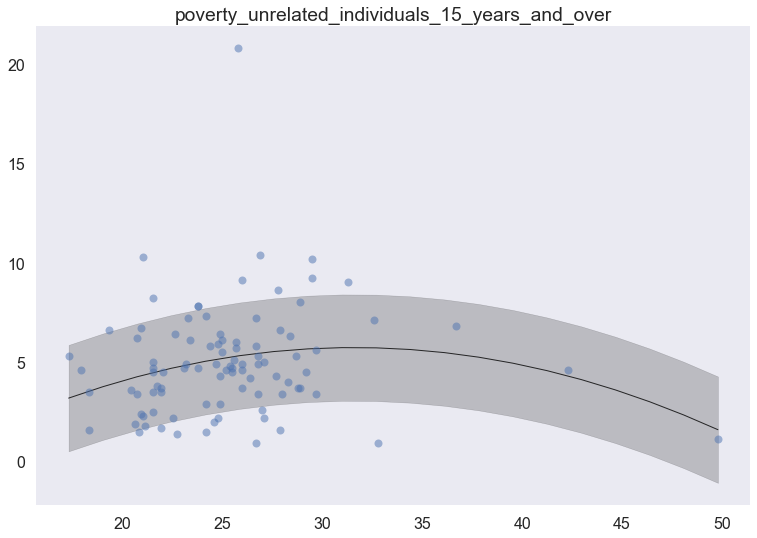

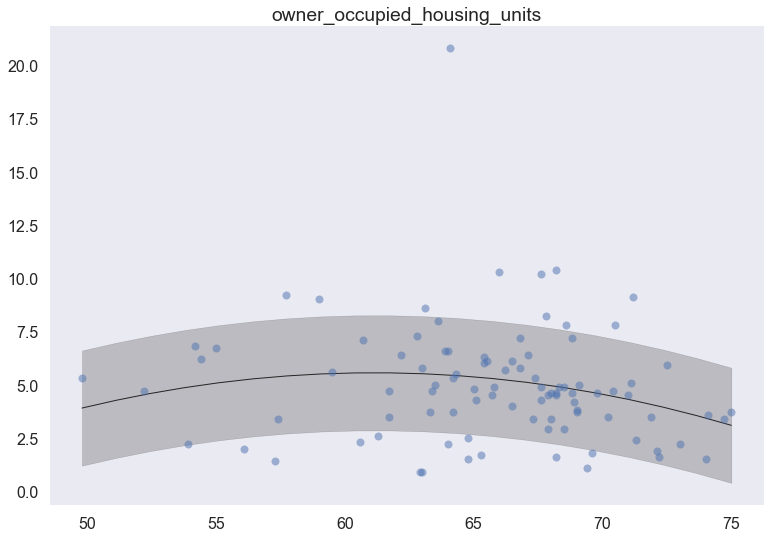

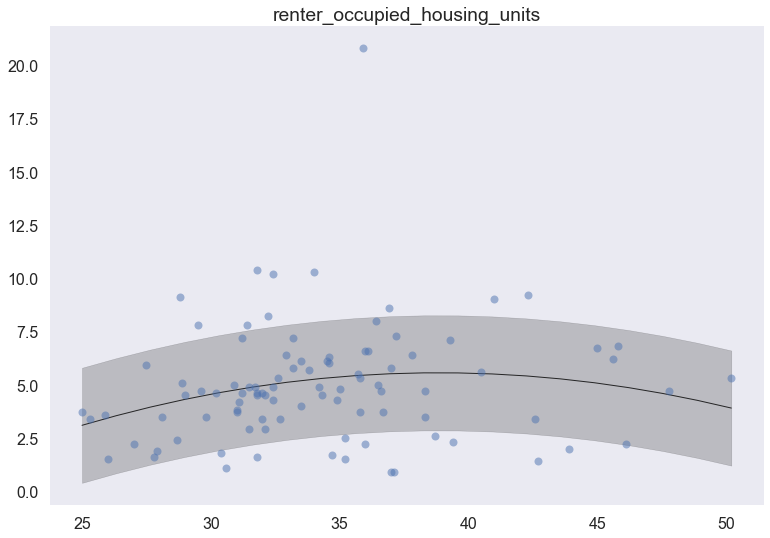

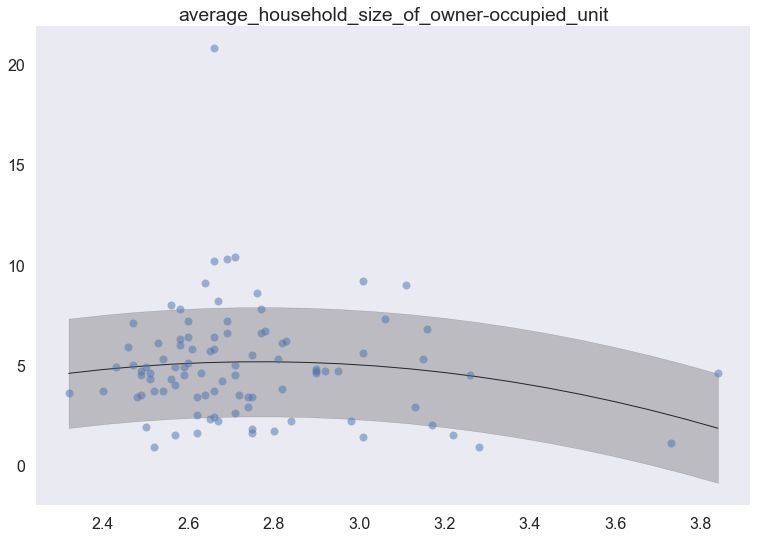

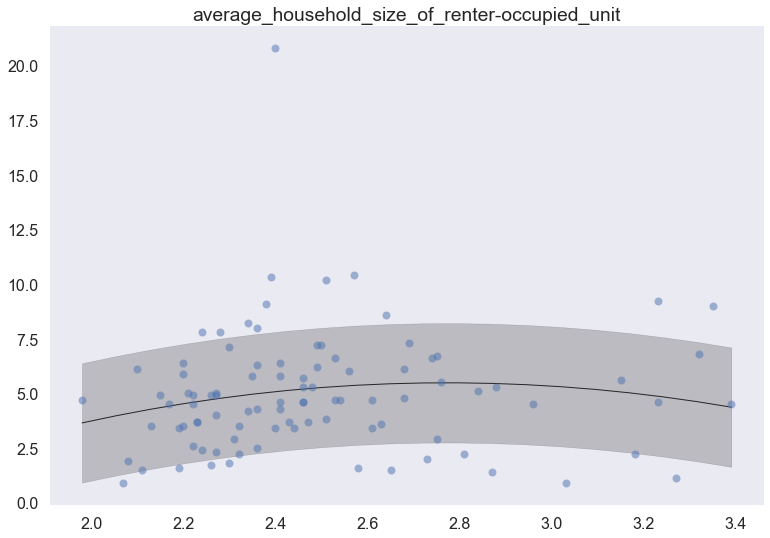

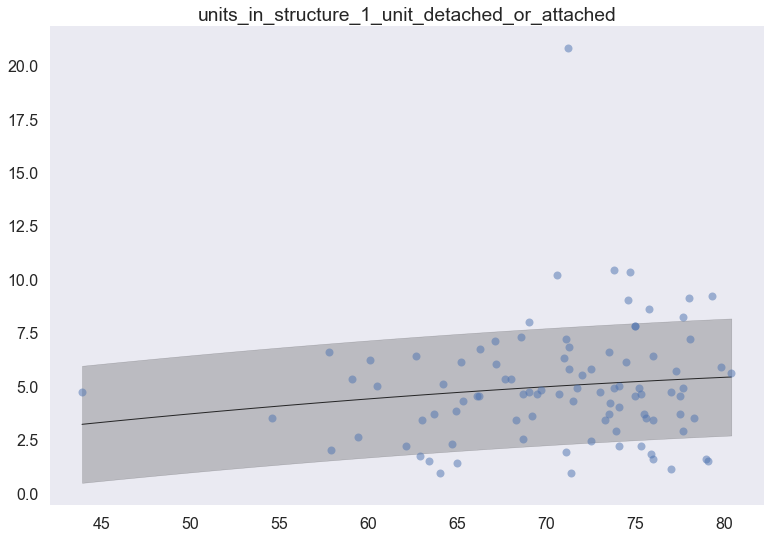

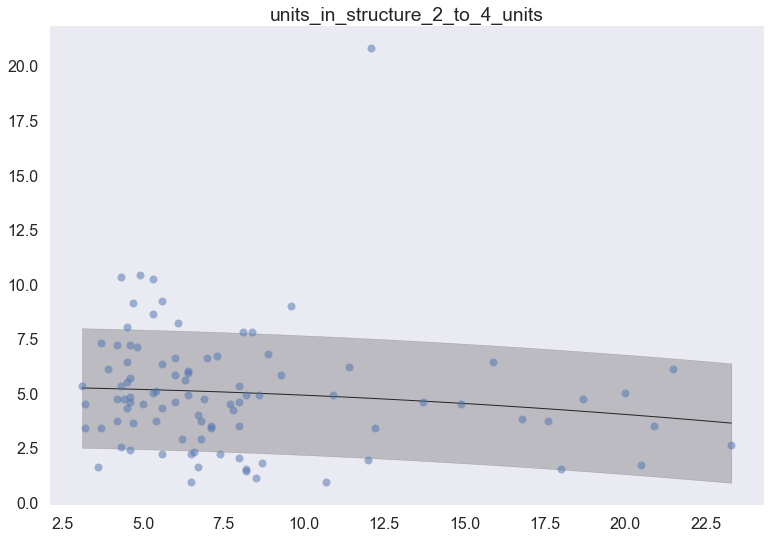

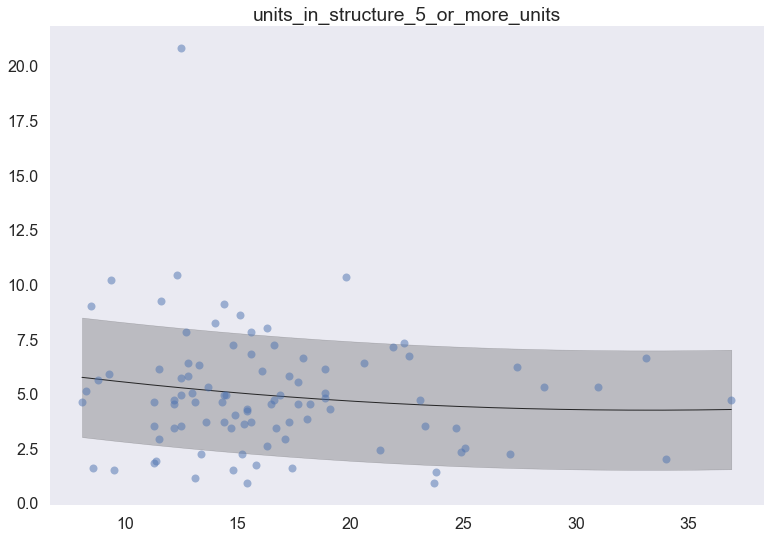

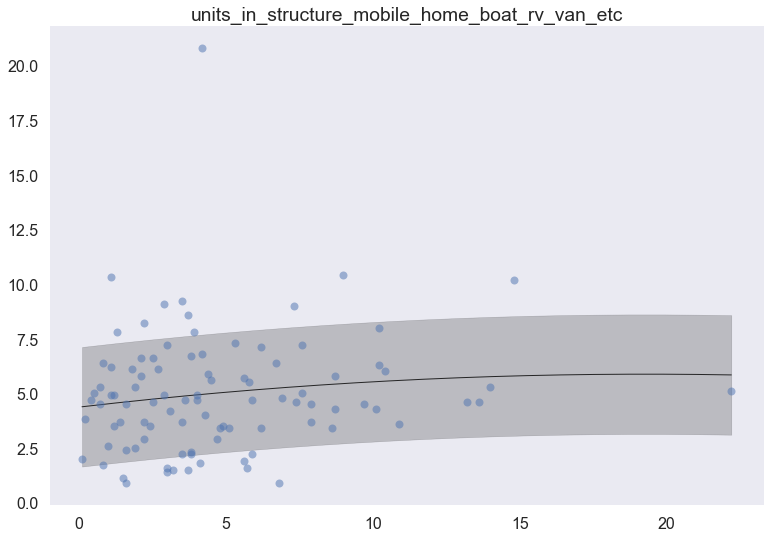

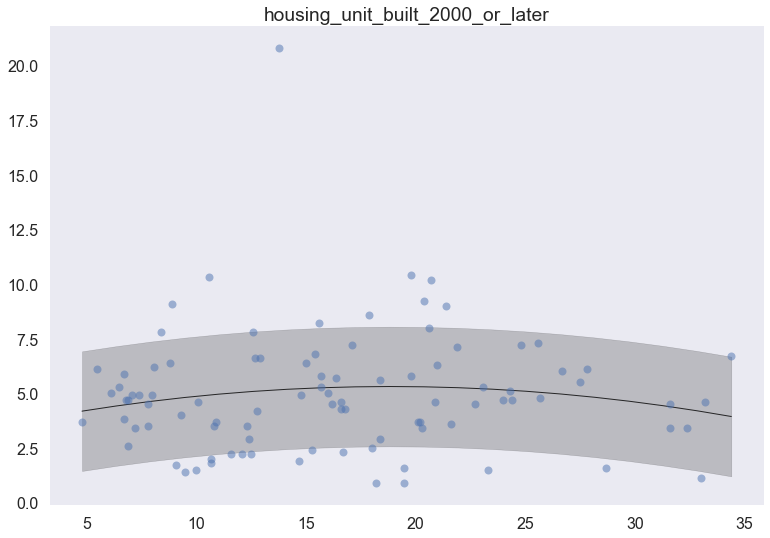

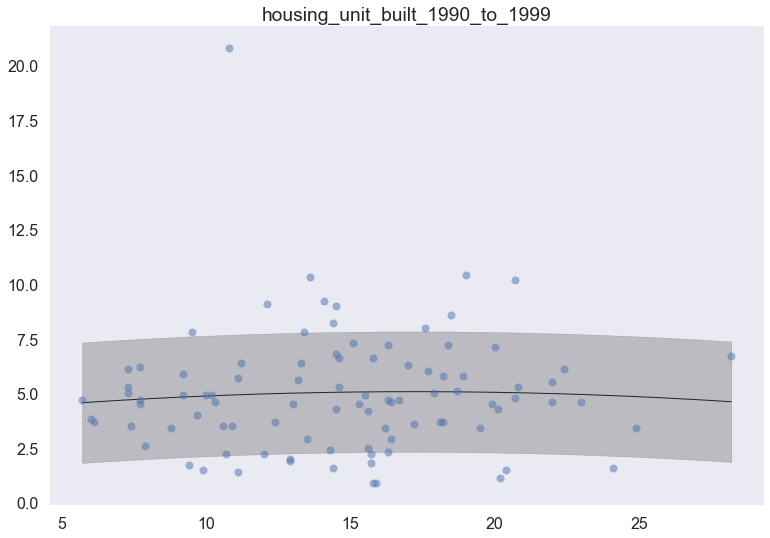

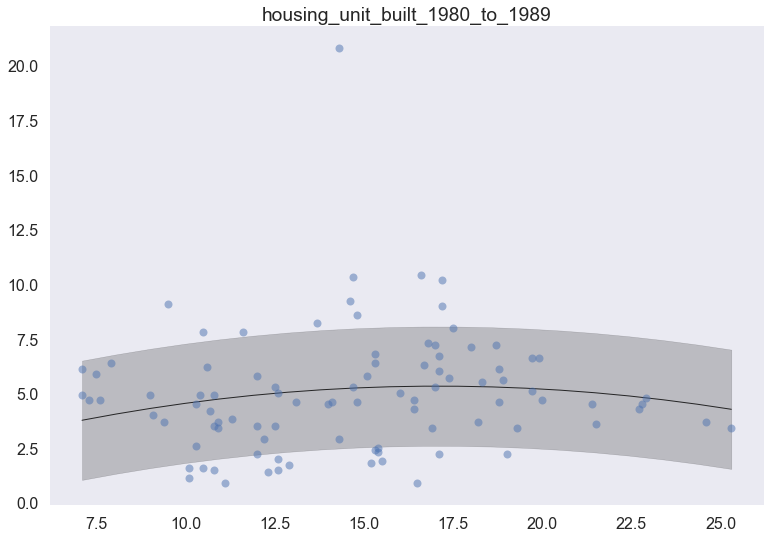

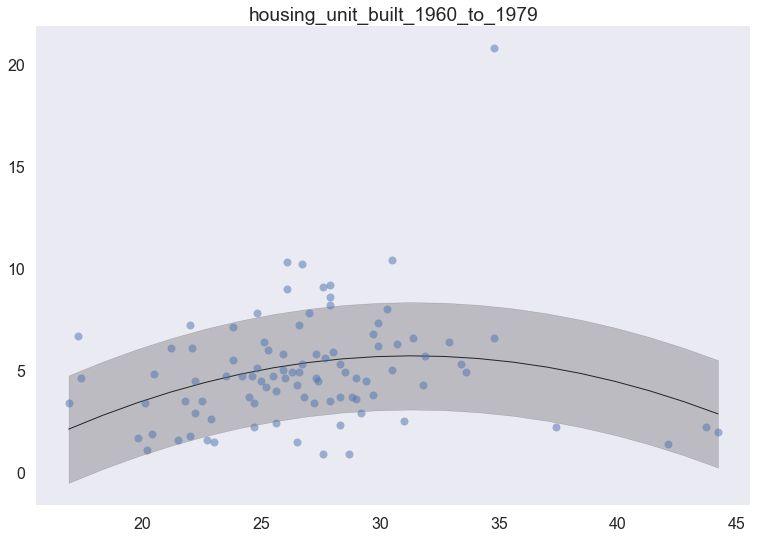

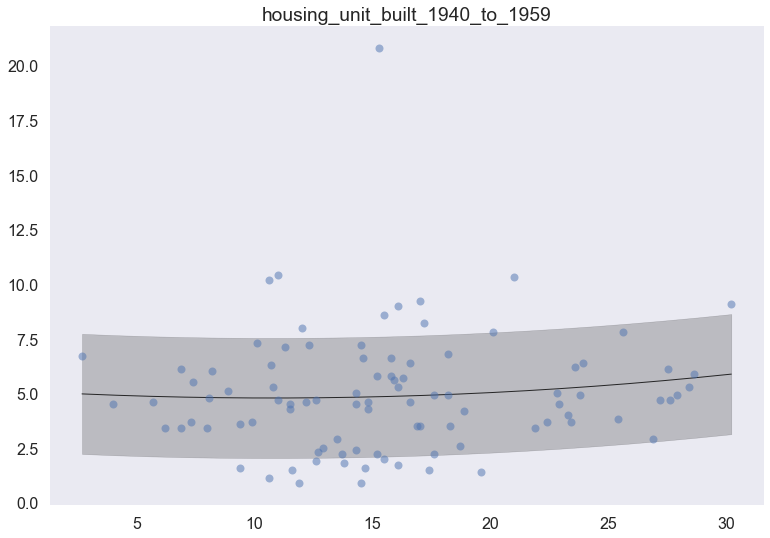

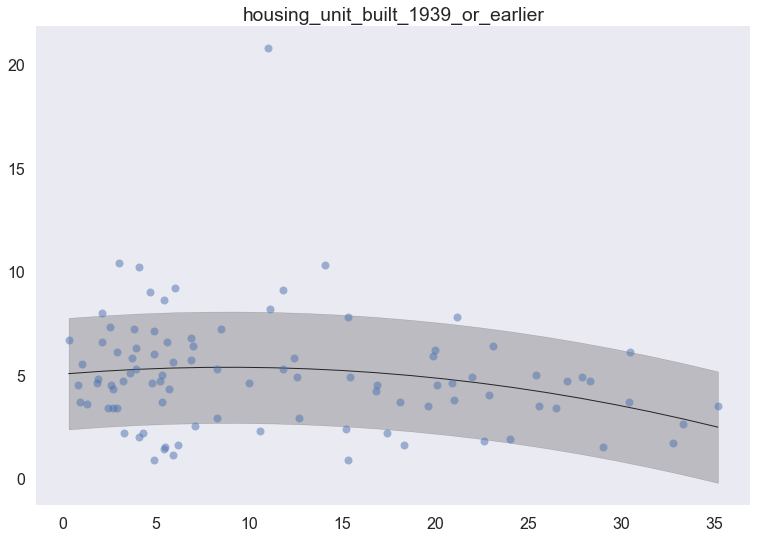

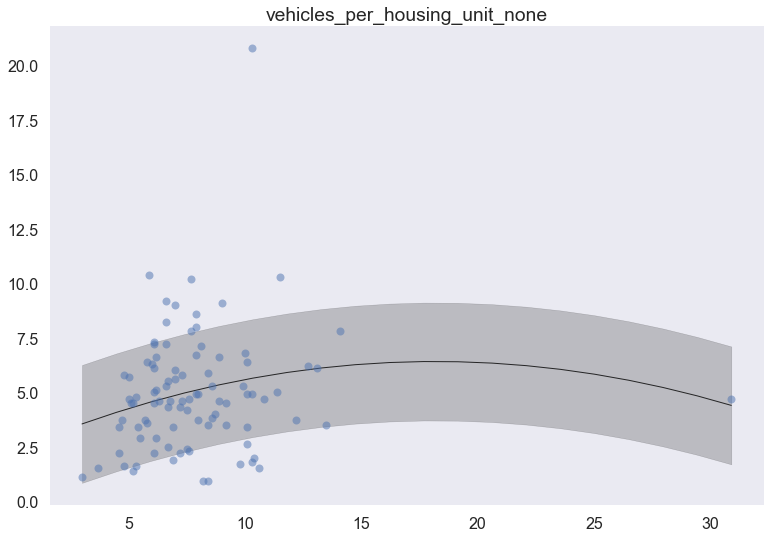

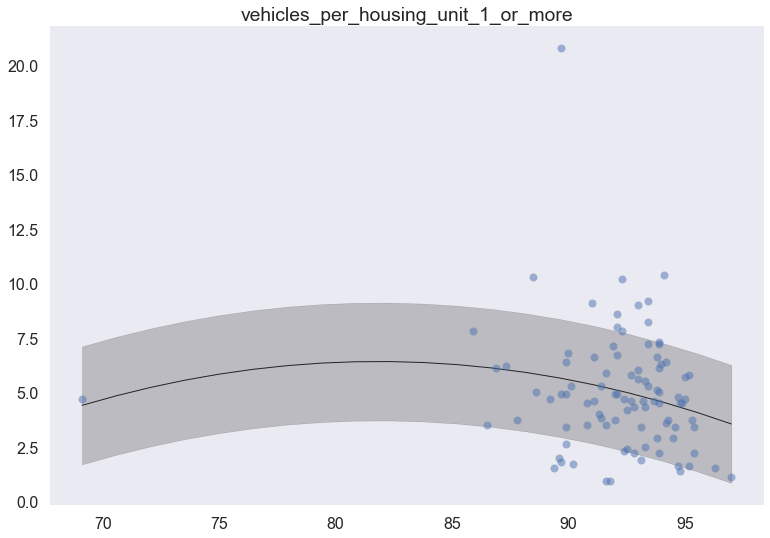

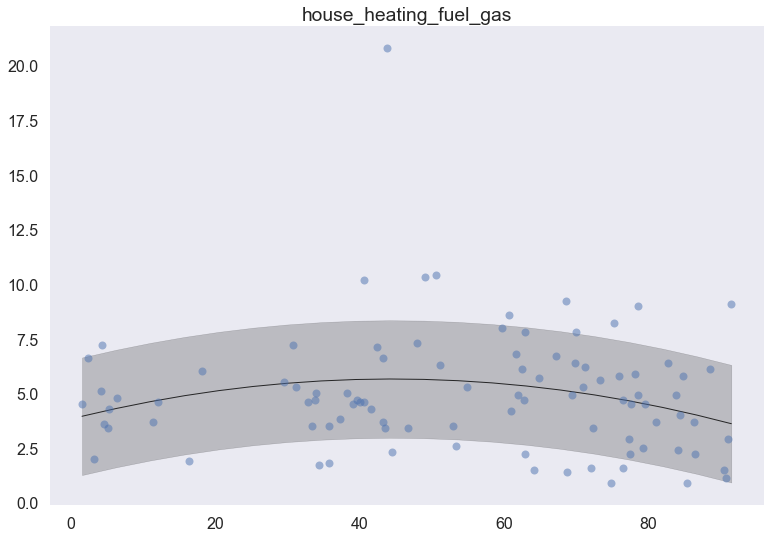

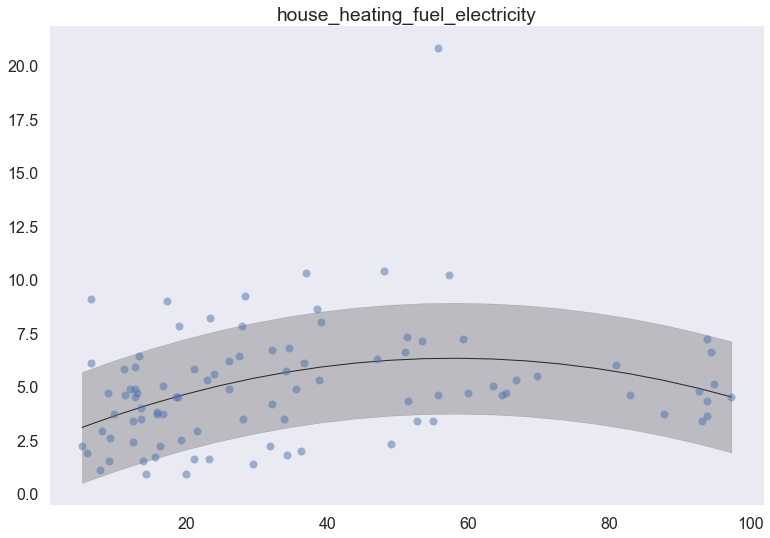

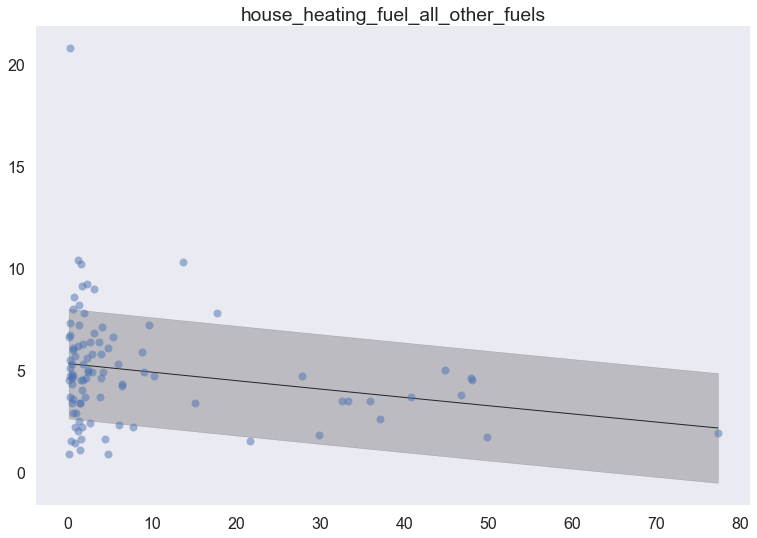

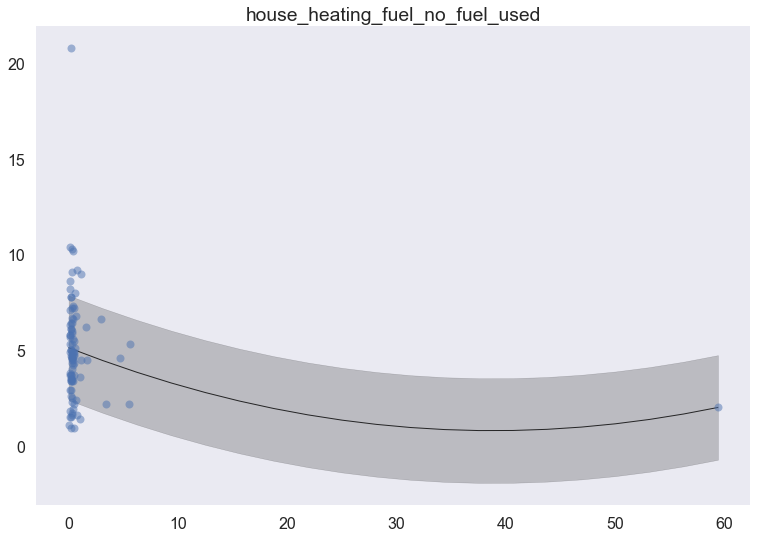

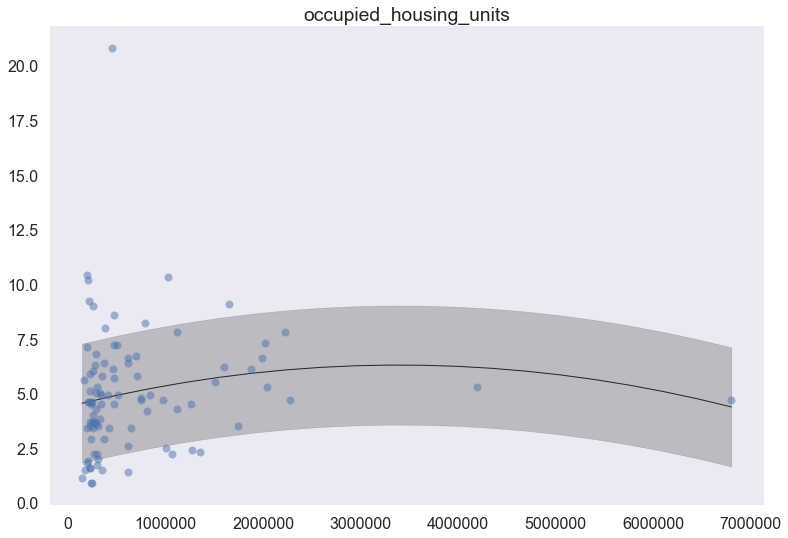

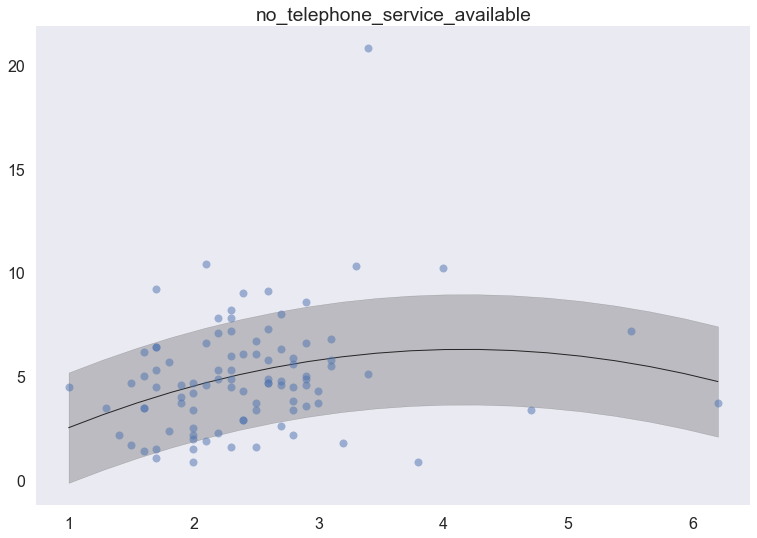

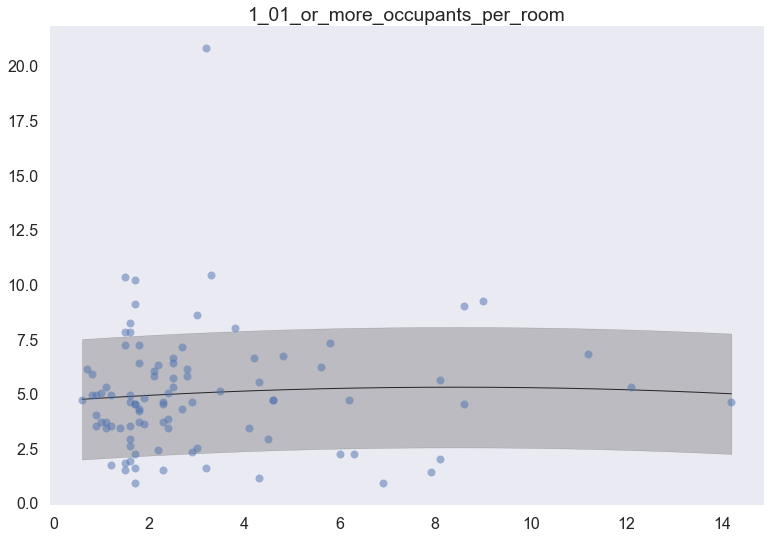

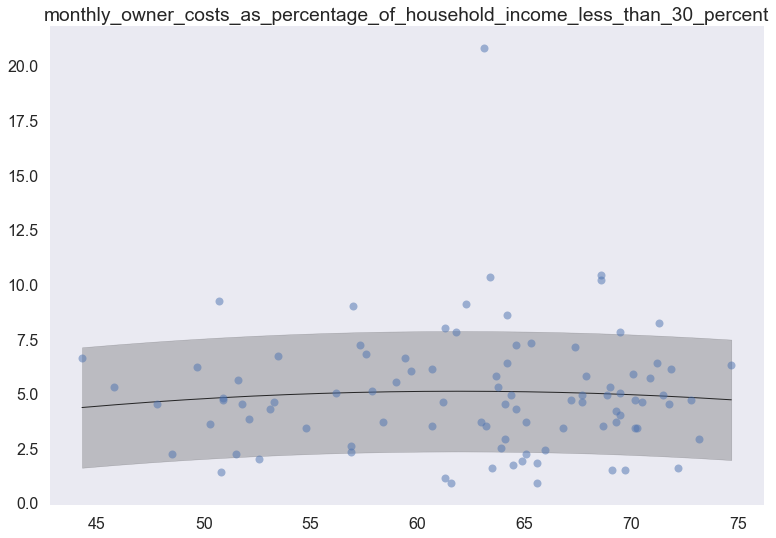

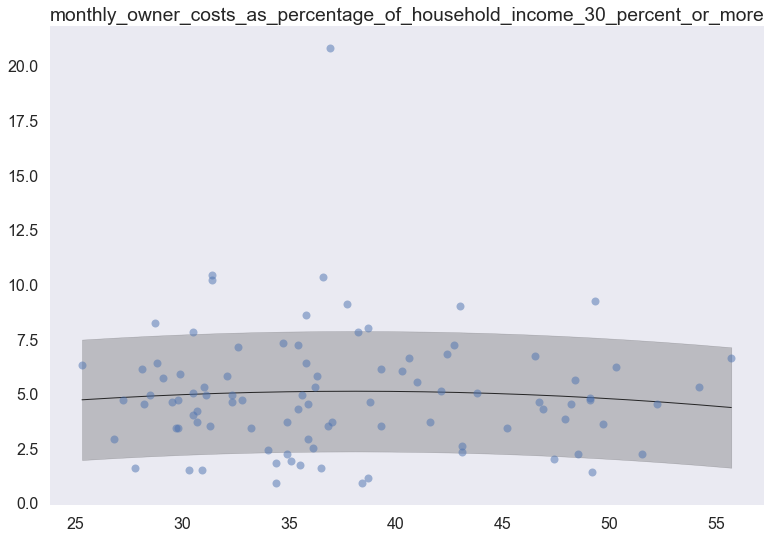

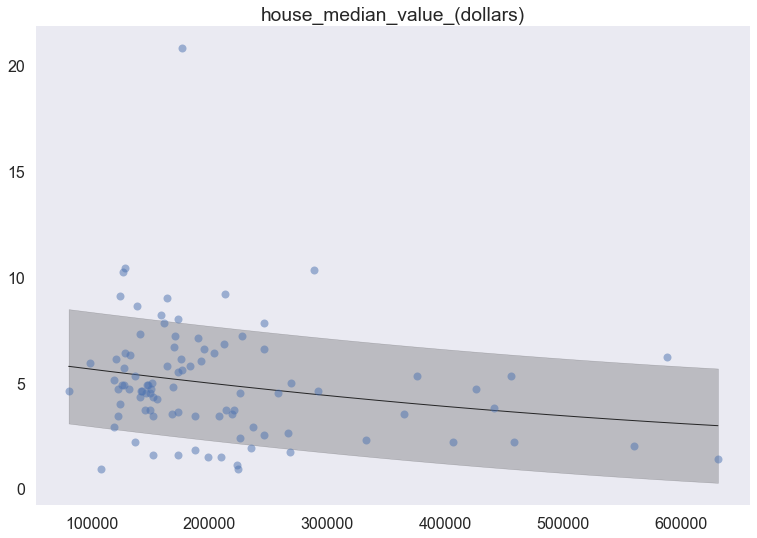

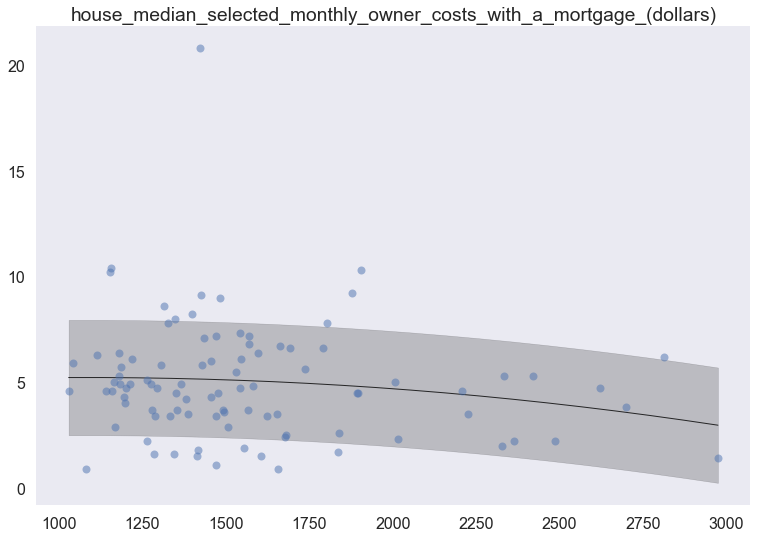

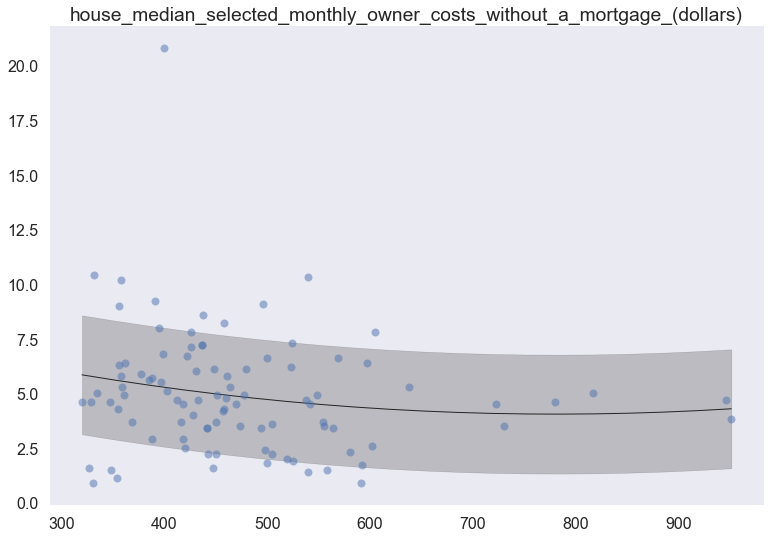

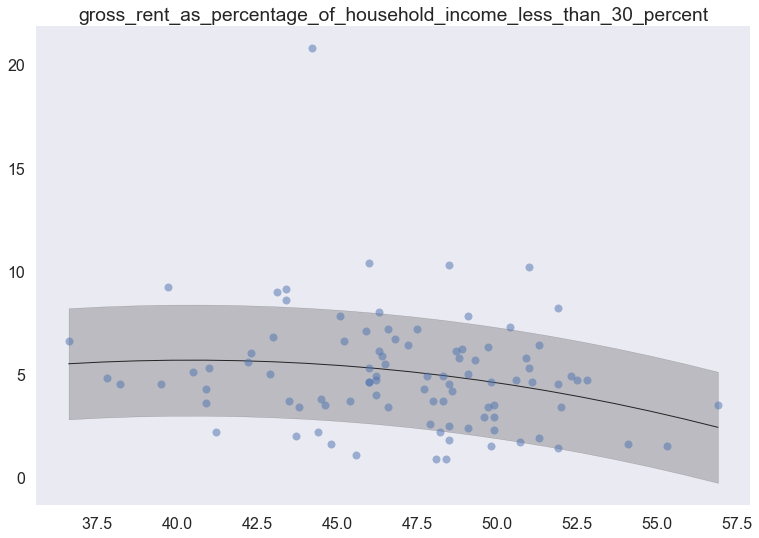

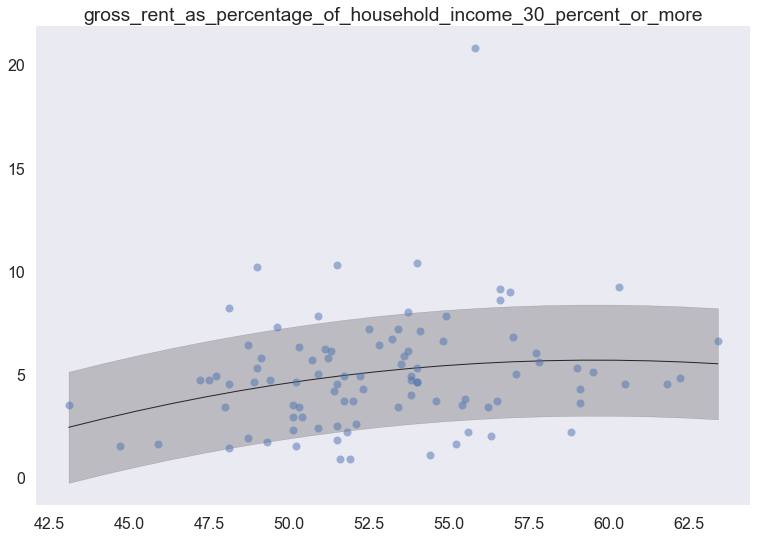

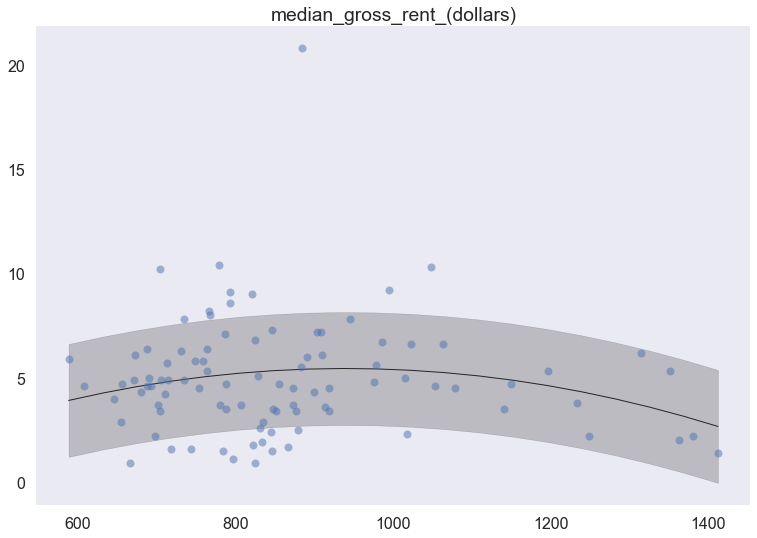

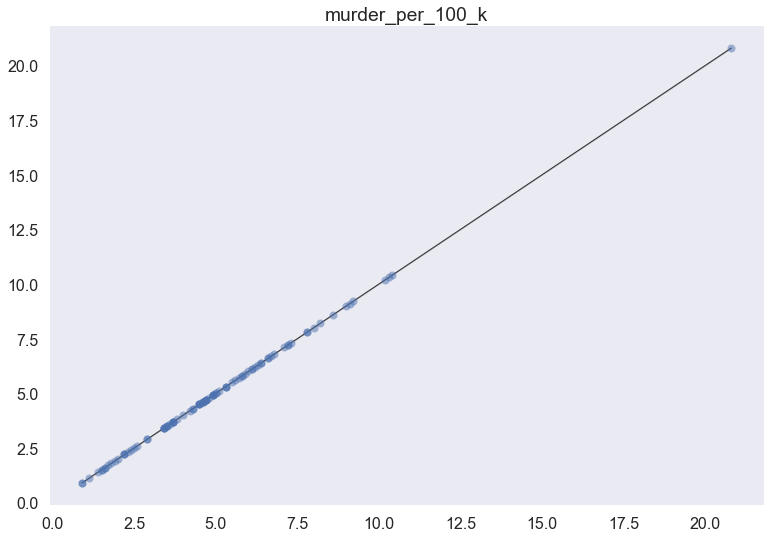

In [13]:
# scatter plot all features (except for year and MSA)
plot_columns(df.iloc[:, 2:])

In [14]:
relevant_cols = ['family_households_married-couple_family',
                 'family_household_married_couple_family_with_own_children_under_18_years',
                 'family_households_female_householder_no_husband_present',
                 'family_households_female_householder_no_husband_present_with_own_children_under_18',
                 'now_married_except_separated',
                 'less_than_high_school_diploma',
                 'high_school_graduate_or_higher',
                 'unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months',
                 'civilian_noninst_population_18_to_64_years_with_a_disability',
                 'civilian_noninst_population_65_years_and_older_with_a_disability',
                 'industry_transportation_and_warehousing_and_utilities',
                 'median_household_income_(dollars)',
                 'households_with_supplemental_security_income',
                 'households_with_food_stamp_snap_benefits',
                 'median_family_income_(dollars)',
                 'percentage_married-couple_family',
                 'percentage_female_householder_no_husband_present_family',
                 'poverty_all_families',
                 'poverty_all_families_with_related_children_under_18_years',
                 'poverty_all_families_with_related_children_under_18_years_with_related_children_under_5_years_only',
                 'poverty_all_people',
                 'poverty_65_years_and_over',
                 'no_telephone_service_available',
                 'house_median_value_(dollars)',
                 'murder_per_100_k']

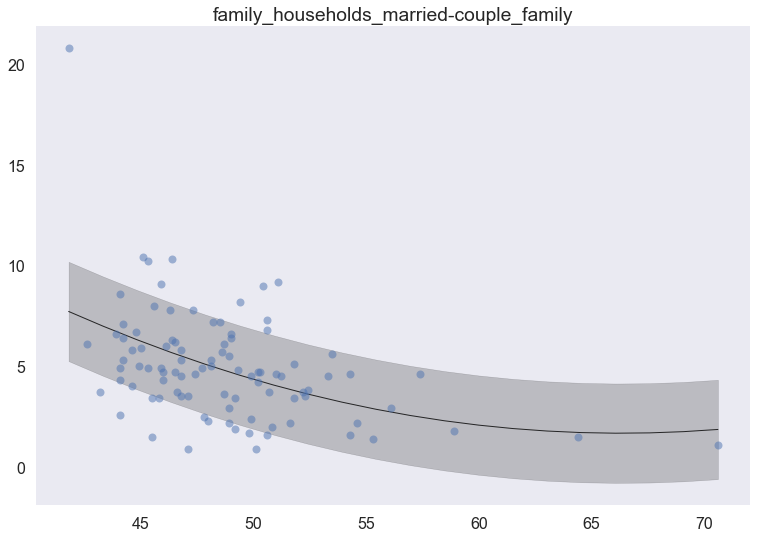

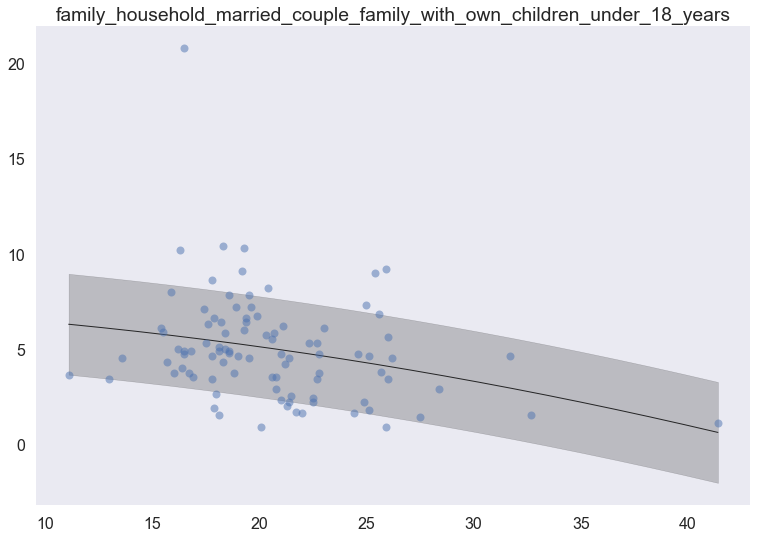

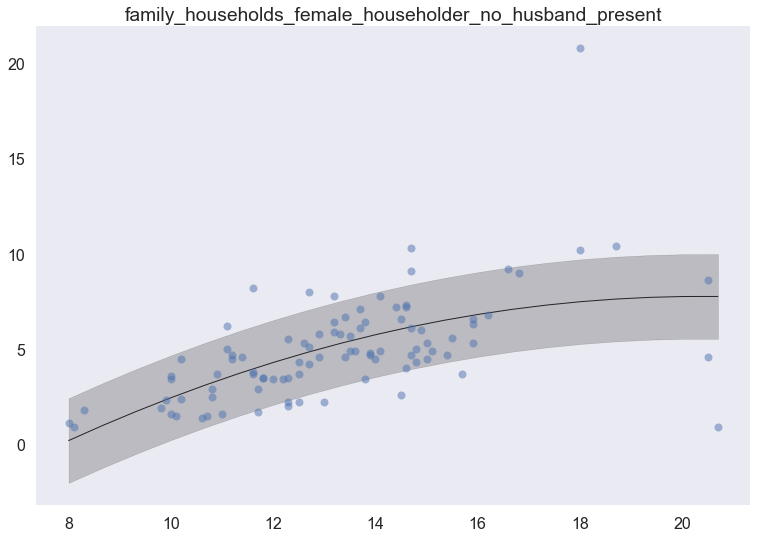

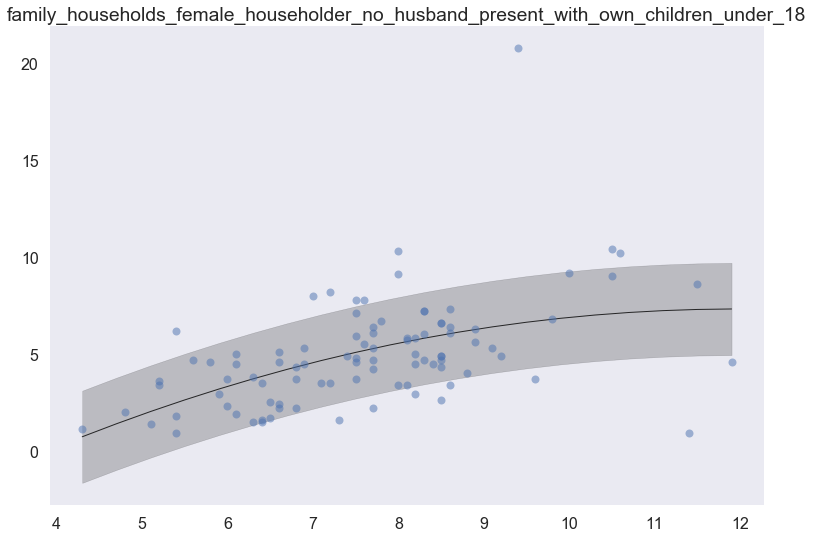

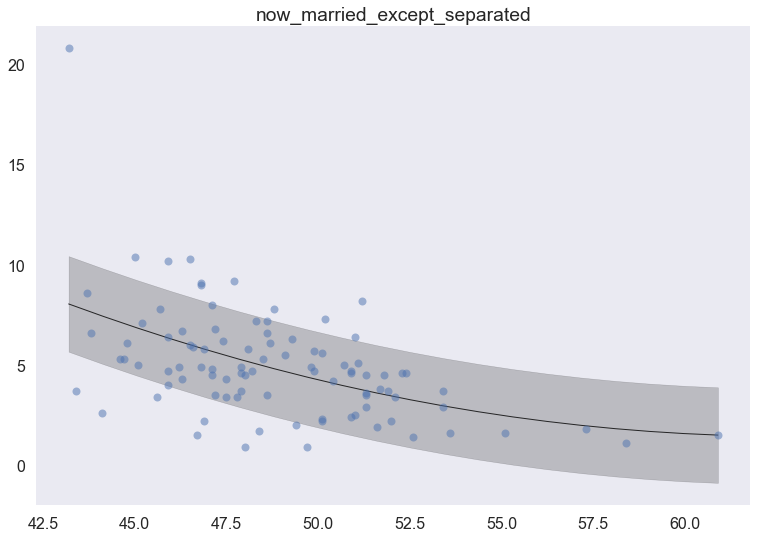

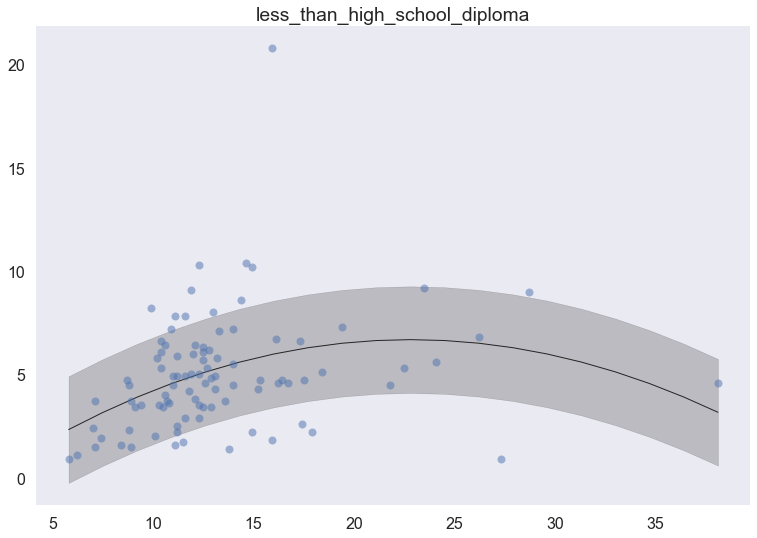

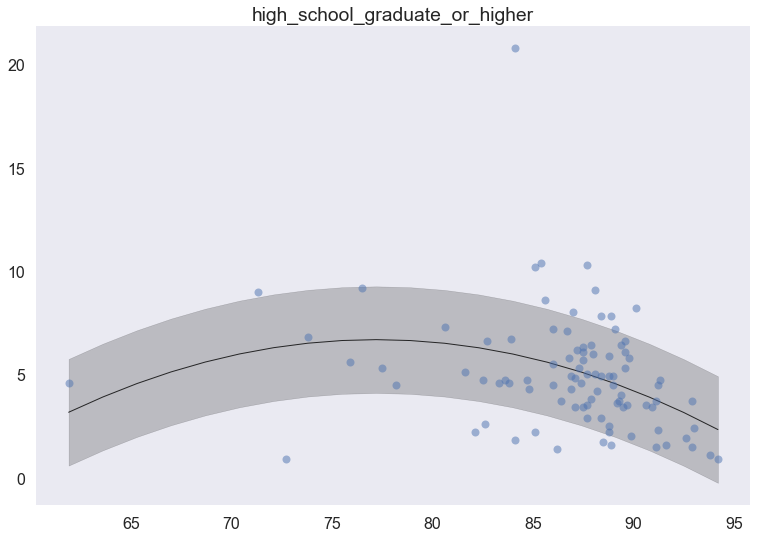

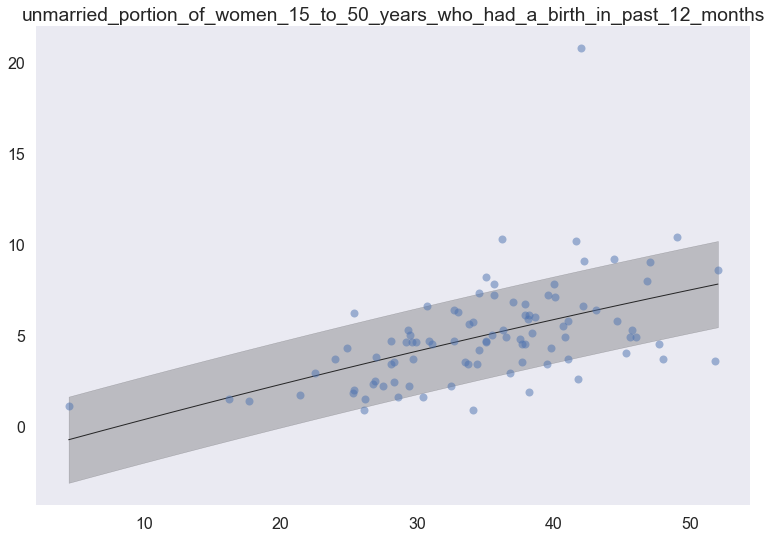

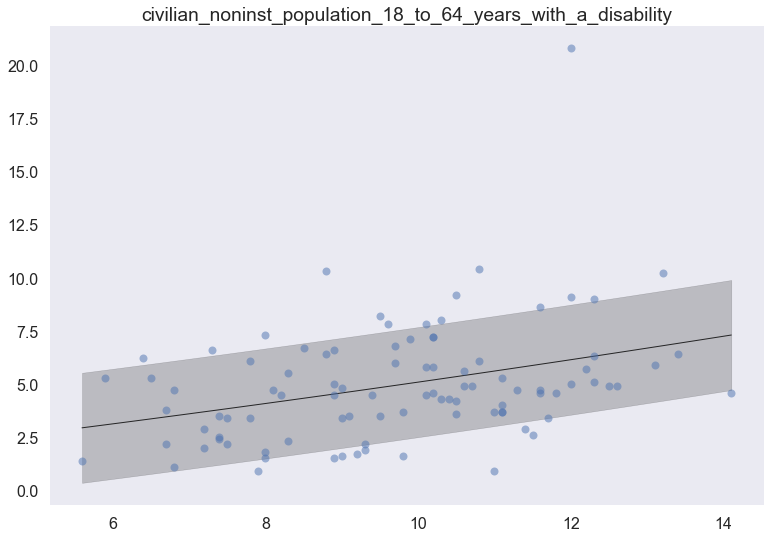

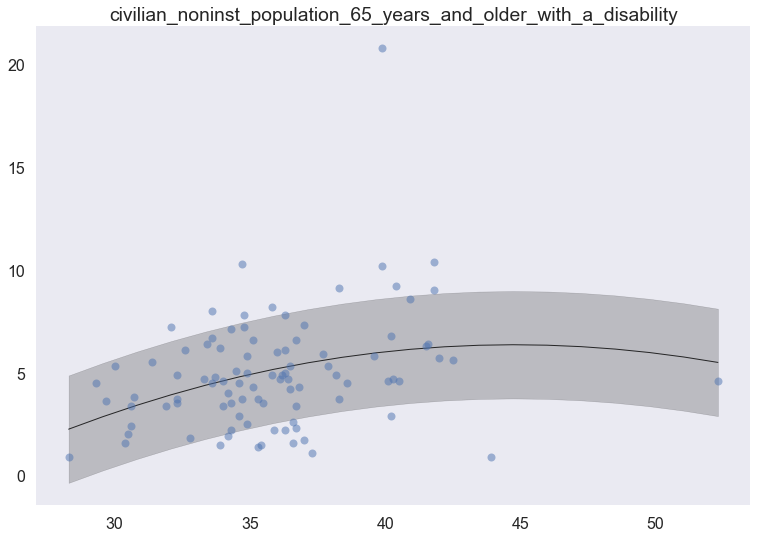

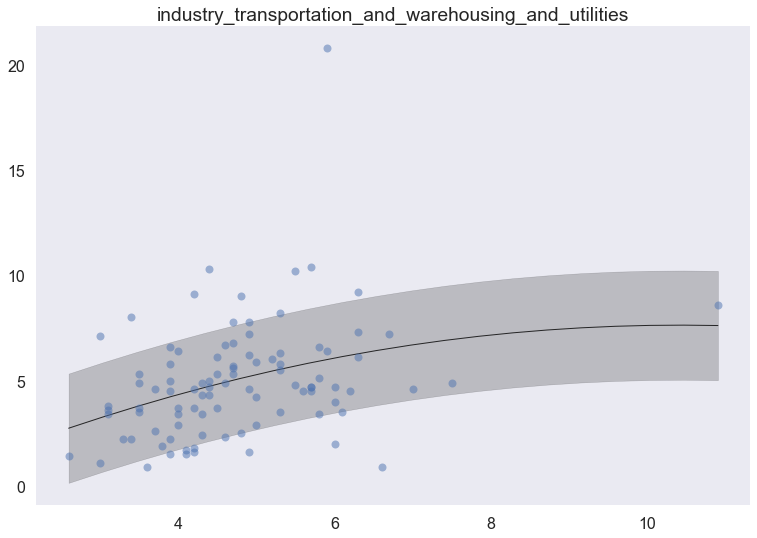

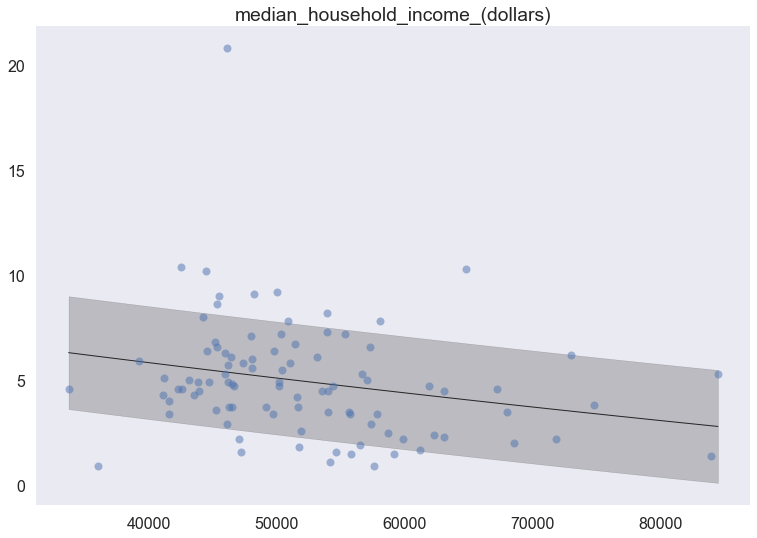

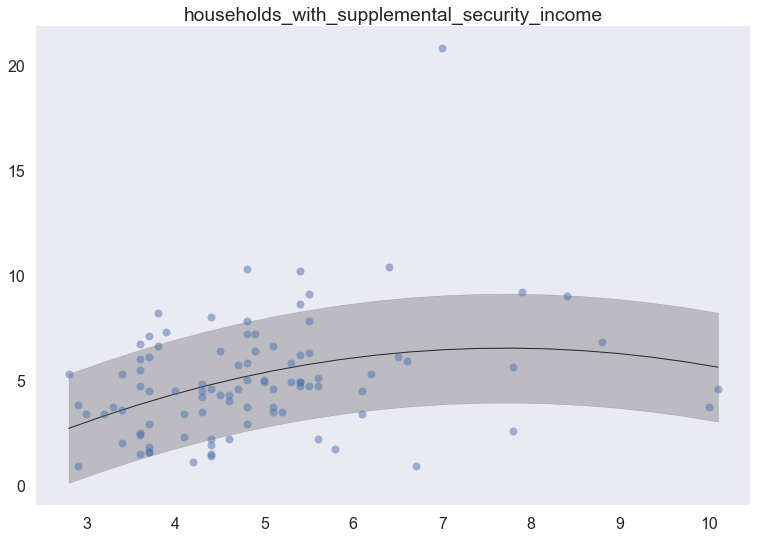

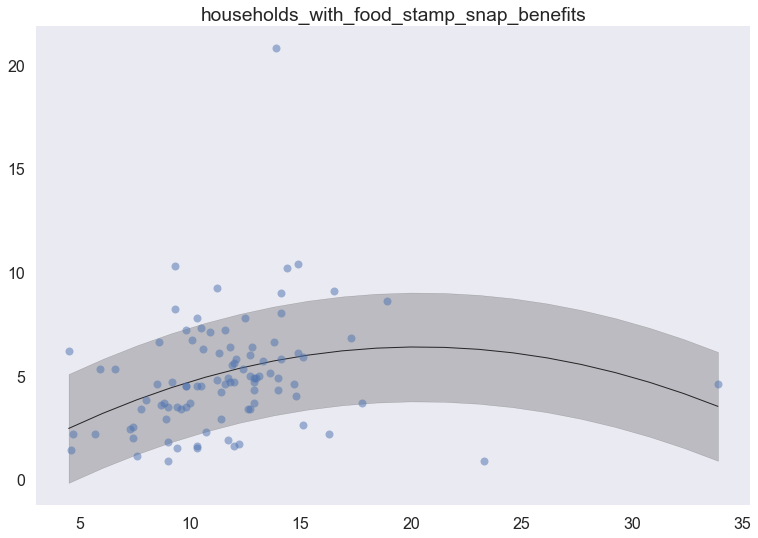

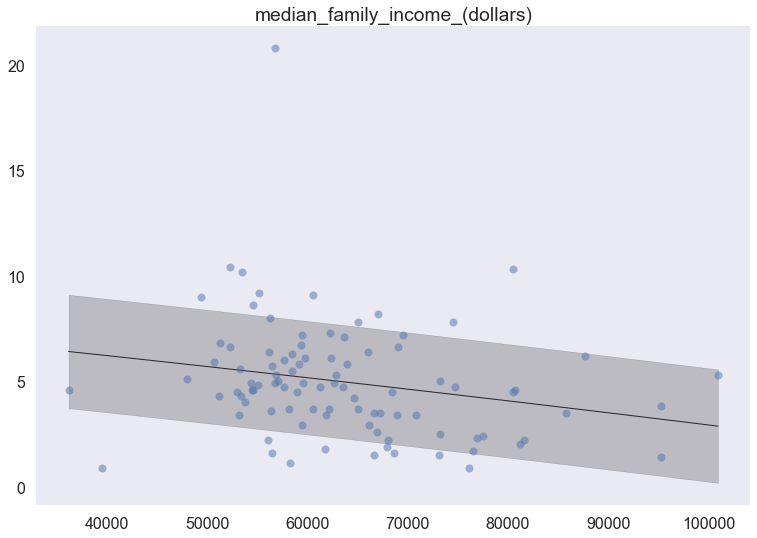

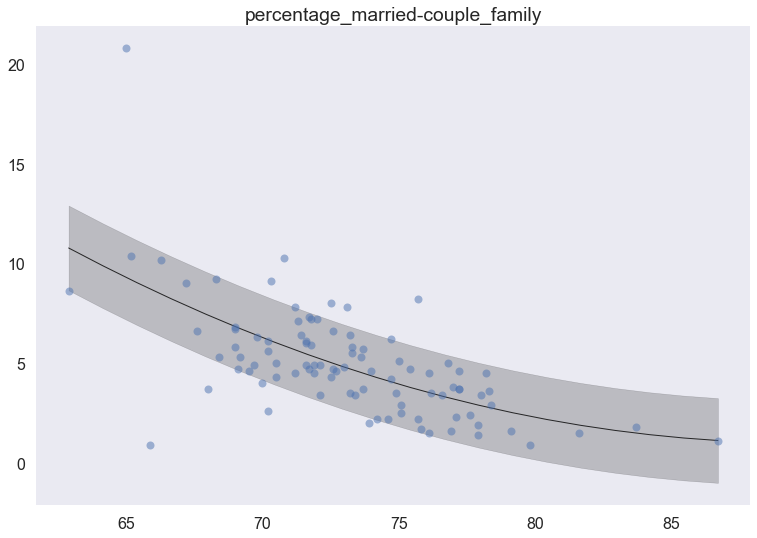

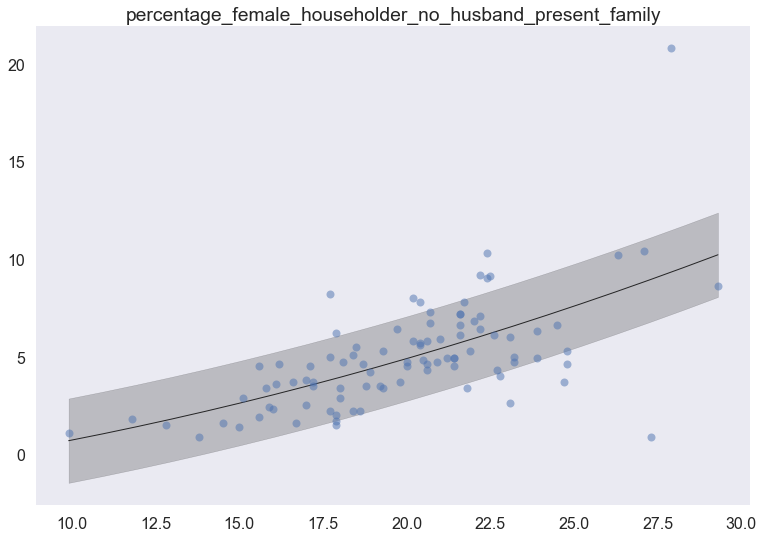

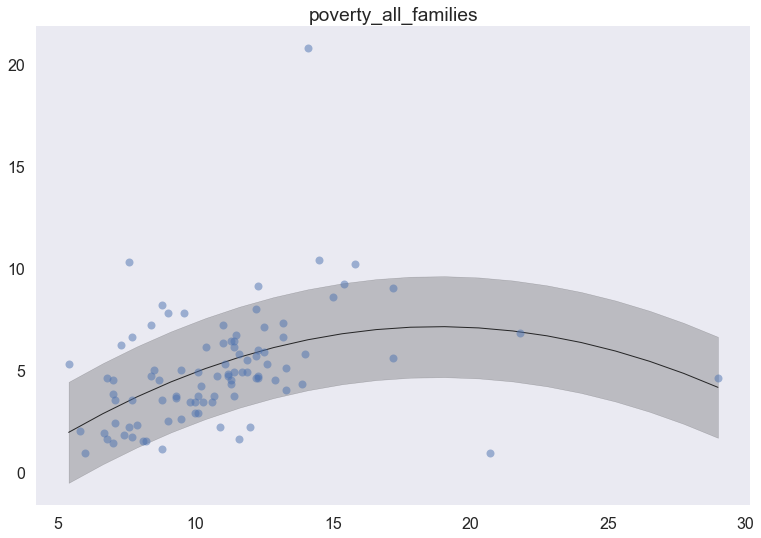

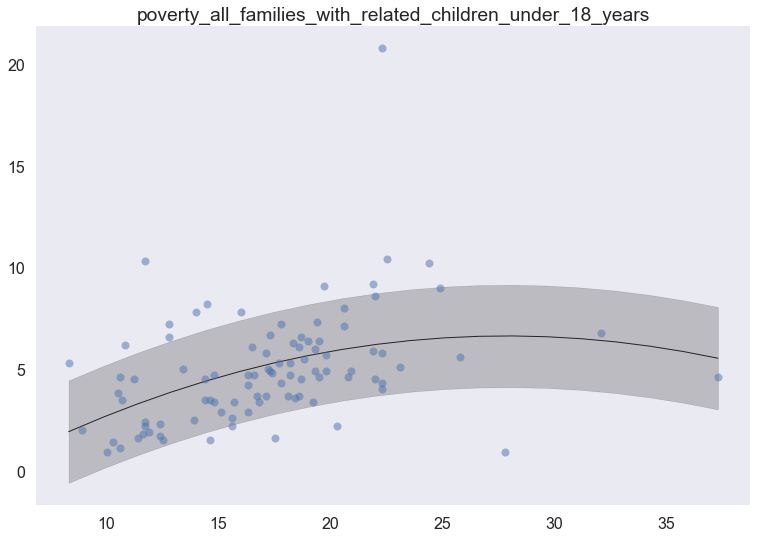

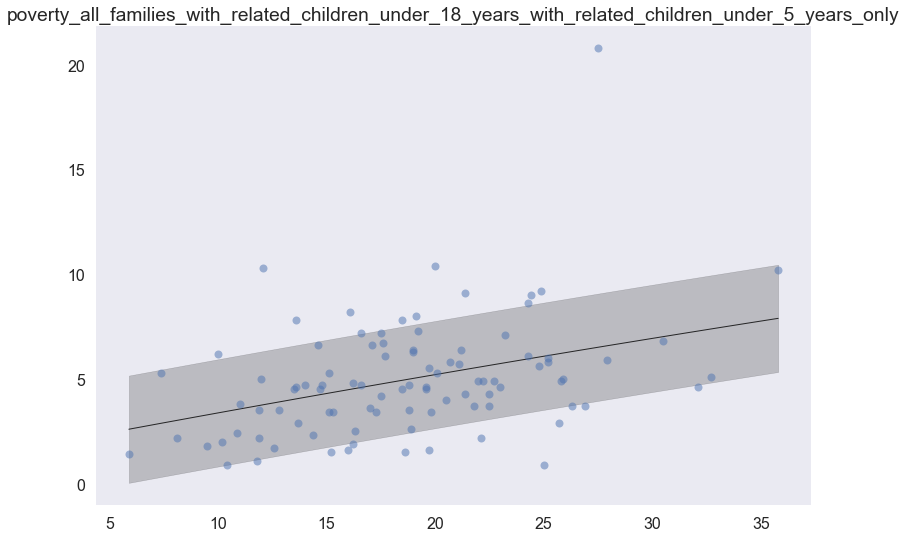

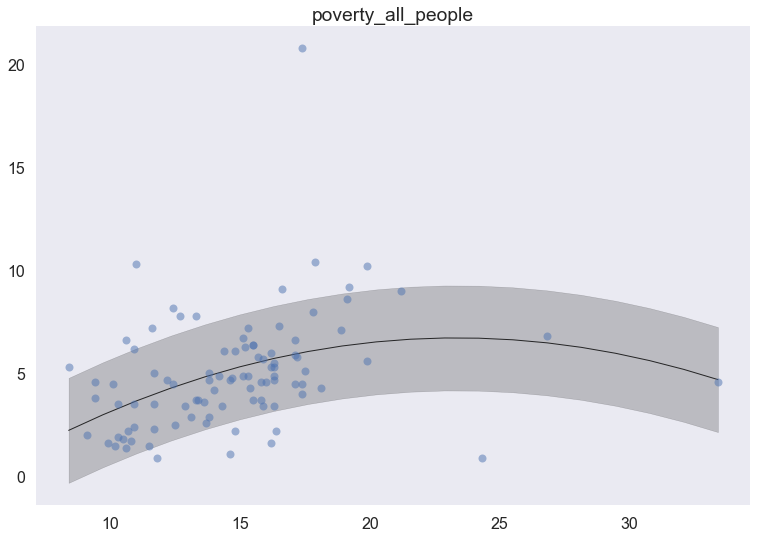

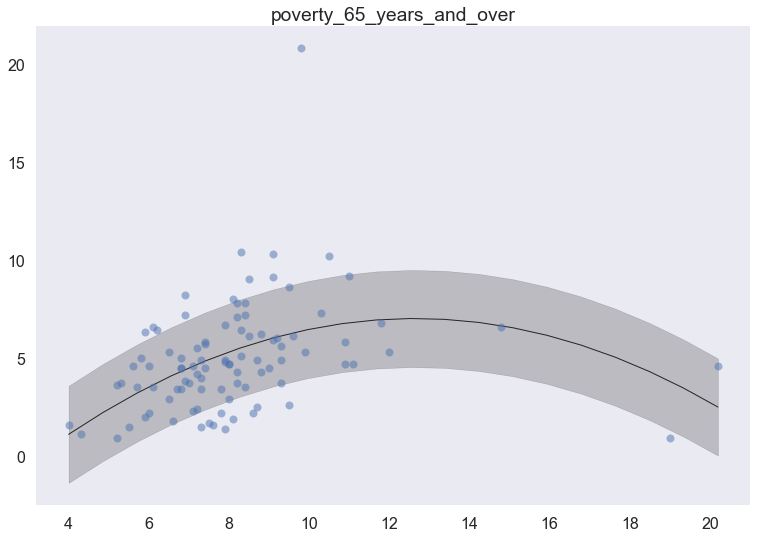

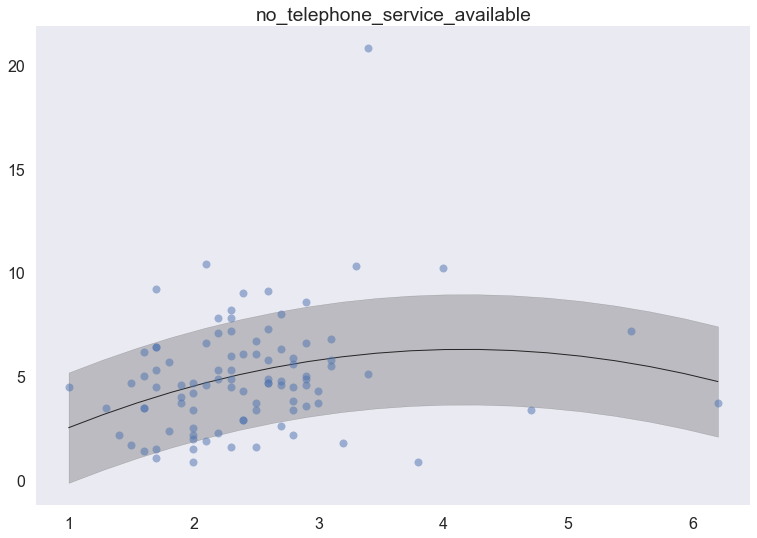

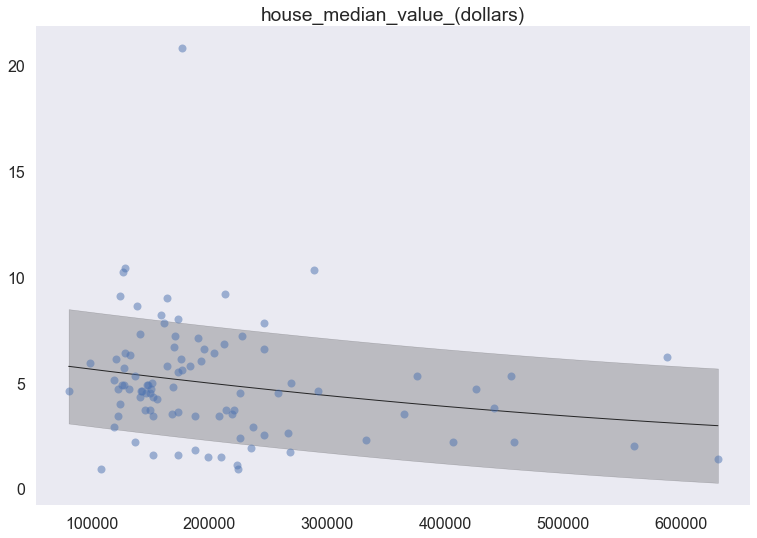

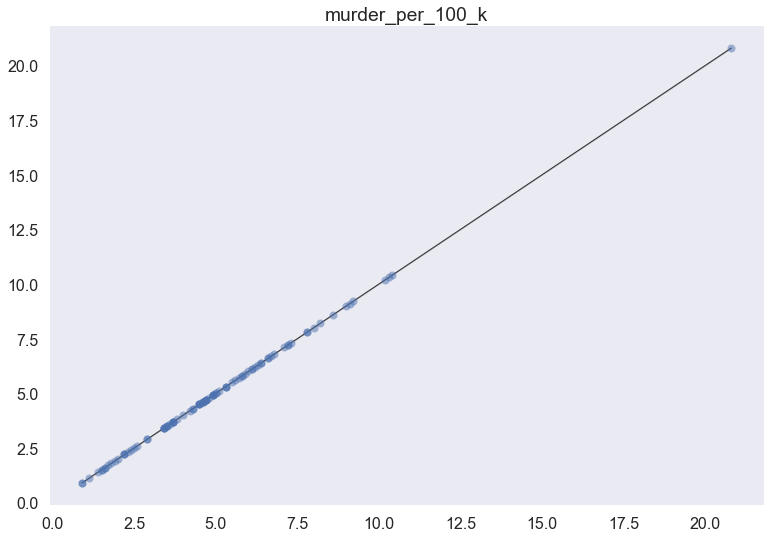

In [15]:
plot_columns(df[relevant_cols])

In [16]:
def print_runtime():
    hours = int(str(end)[0:2])-int(str(start)[0:2])
    minutes = int(str(end)[3:5])-int(str(start)[3:5])
    seconds = int(str(end)[6:8])-int(str(start)[6:8])
    print(hours, "hrs", minutes, "mins", seconds, "secs")

In [17]:
end = datetime.datetime.time(datetime.datetime.now())

In [18]:
print_runtime()

0 hrs 5 mins -13 secs
